# Análisis predictivo de series temporales

## Modelos y ejemplos básicos de series temporales

### Instalación de bibliotecas:

In [1]:
#install.packages("devtools") 
#devtools::install_github("nickpoison/astsa")
#install.packages("astsa")
library(astsa)

##Ajusto tamaño de figuras
options(repr.plot.width=8, repr.plot.height=4.5, repr.plot.res=300)

## Pequeño repaso de probabilidad

Un espacio de probabilidad es una terna $(\Omega,\mathcal{A},P)$ donde:
 * $\Omega$ es un conjunto: el *espacio muestral* que representa los resultados de experimentos.
 * $\mathcal{A}$ es una familia de subconjuntos de $\Omega$ a los cuales asignaremos probabilidad, los denominados *eventos*.
 * $P$ es una *medida de probabilidad*, es decir cumple:
 
   a. $P(\Omega) = 1$
   
   b. $P\left( \bigcup_n A_n \right) = \sum_n P(A_n)$, si los eventos $A_n\in \mathcal{A}$ son disjuntos.
   

La medida de probabilidad representa *todo nuestro conocimiento previo* del modelo sobre lo que puede pasar en los experimentos.



### Propiedades usuales

Las medidas de probabilidad cumplen todas las propiedades lógicas que uno espera:

 * $P(\emptyset) = 0$.
 * $P(A^c) = 1 - P(A)$.
 * Si $A\subset B$, $P(A)\leqslant P(B)$.
 * $P(A\cup B) = P(A) + P(B) - P(A\cap B)$

**Probabilidad condicional:**

Es cuando queremos redefinir la probabilidad sabiendo que ya ocurrió un evento antes. Esto es, si sabemos que ocurrió el evento $A$ (nueva información), ¿cúal es la chance e observar $B$ también? Se define como:

$$P(B \mid A) = \frac{P(A\cap B)}{P(A)}.$$

### Variable aleatoria

En general, uno está interesado en los *resultados numéricos* de un experimento. Eso lleva a la definición del concepto de *variable aleatoria*. Una v.a. $X$ es una función (medible) $X:\Omega\to\mathbb{R}$, que de cada experimento extrae un valor numérico.

**Ejemplos:**

 * Exp: tirar una moneda. $X=1$ si sale cara, $X=0$ si sale cruz (v.a. discreta).
 * Exp: tirar un dado. $X=$no. que sale (v.a. discreta).
 * Exp: elegir una persona al azar de una población, $X=$altura de la persona. $Y=$peso de la persona (v.a. continuas).
 * Exp: observar el mercado cambiario, $X_{t}=$valor del dólar en tiempo $t$. $t$ representa cada día (v.a. continuas, una sucesión de ellas).
 
**Observación:**

En el ejemplo de las personas, $X$ e $Y$ vinculan a la misma persona, por lo que los resultados no deberían ser "independientes".
 

### Densidad y distribución

Una v.a. $X$ queda caracterizada por su *función de distribución acumulada* $F(x)$ definida como:

$$F(x) = P(X\leqslant x) \quad \forall x\in \mathbb{R}.$$

En el caso continuo, en general es más intuitivo trabajar con la *densidad de probabilidad* $f(x)$. $f$ es la densidad de $X$ si:

$$P(X\in(a,b)) = \int_a^b f(x) dx \quad \forall a,b \in \mathbb{R}, a<b.$$

En particular:

$$F(x) = \int_{-\infty}^x f(y)dy \quad \quad f(x) = \frac{d}{dx} F(x).$$

Siempre que la distribución sea continua.

#### Ejemplo: Distirbución normal

$$f(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

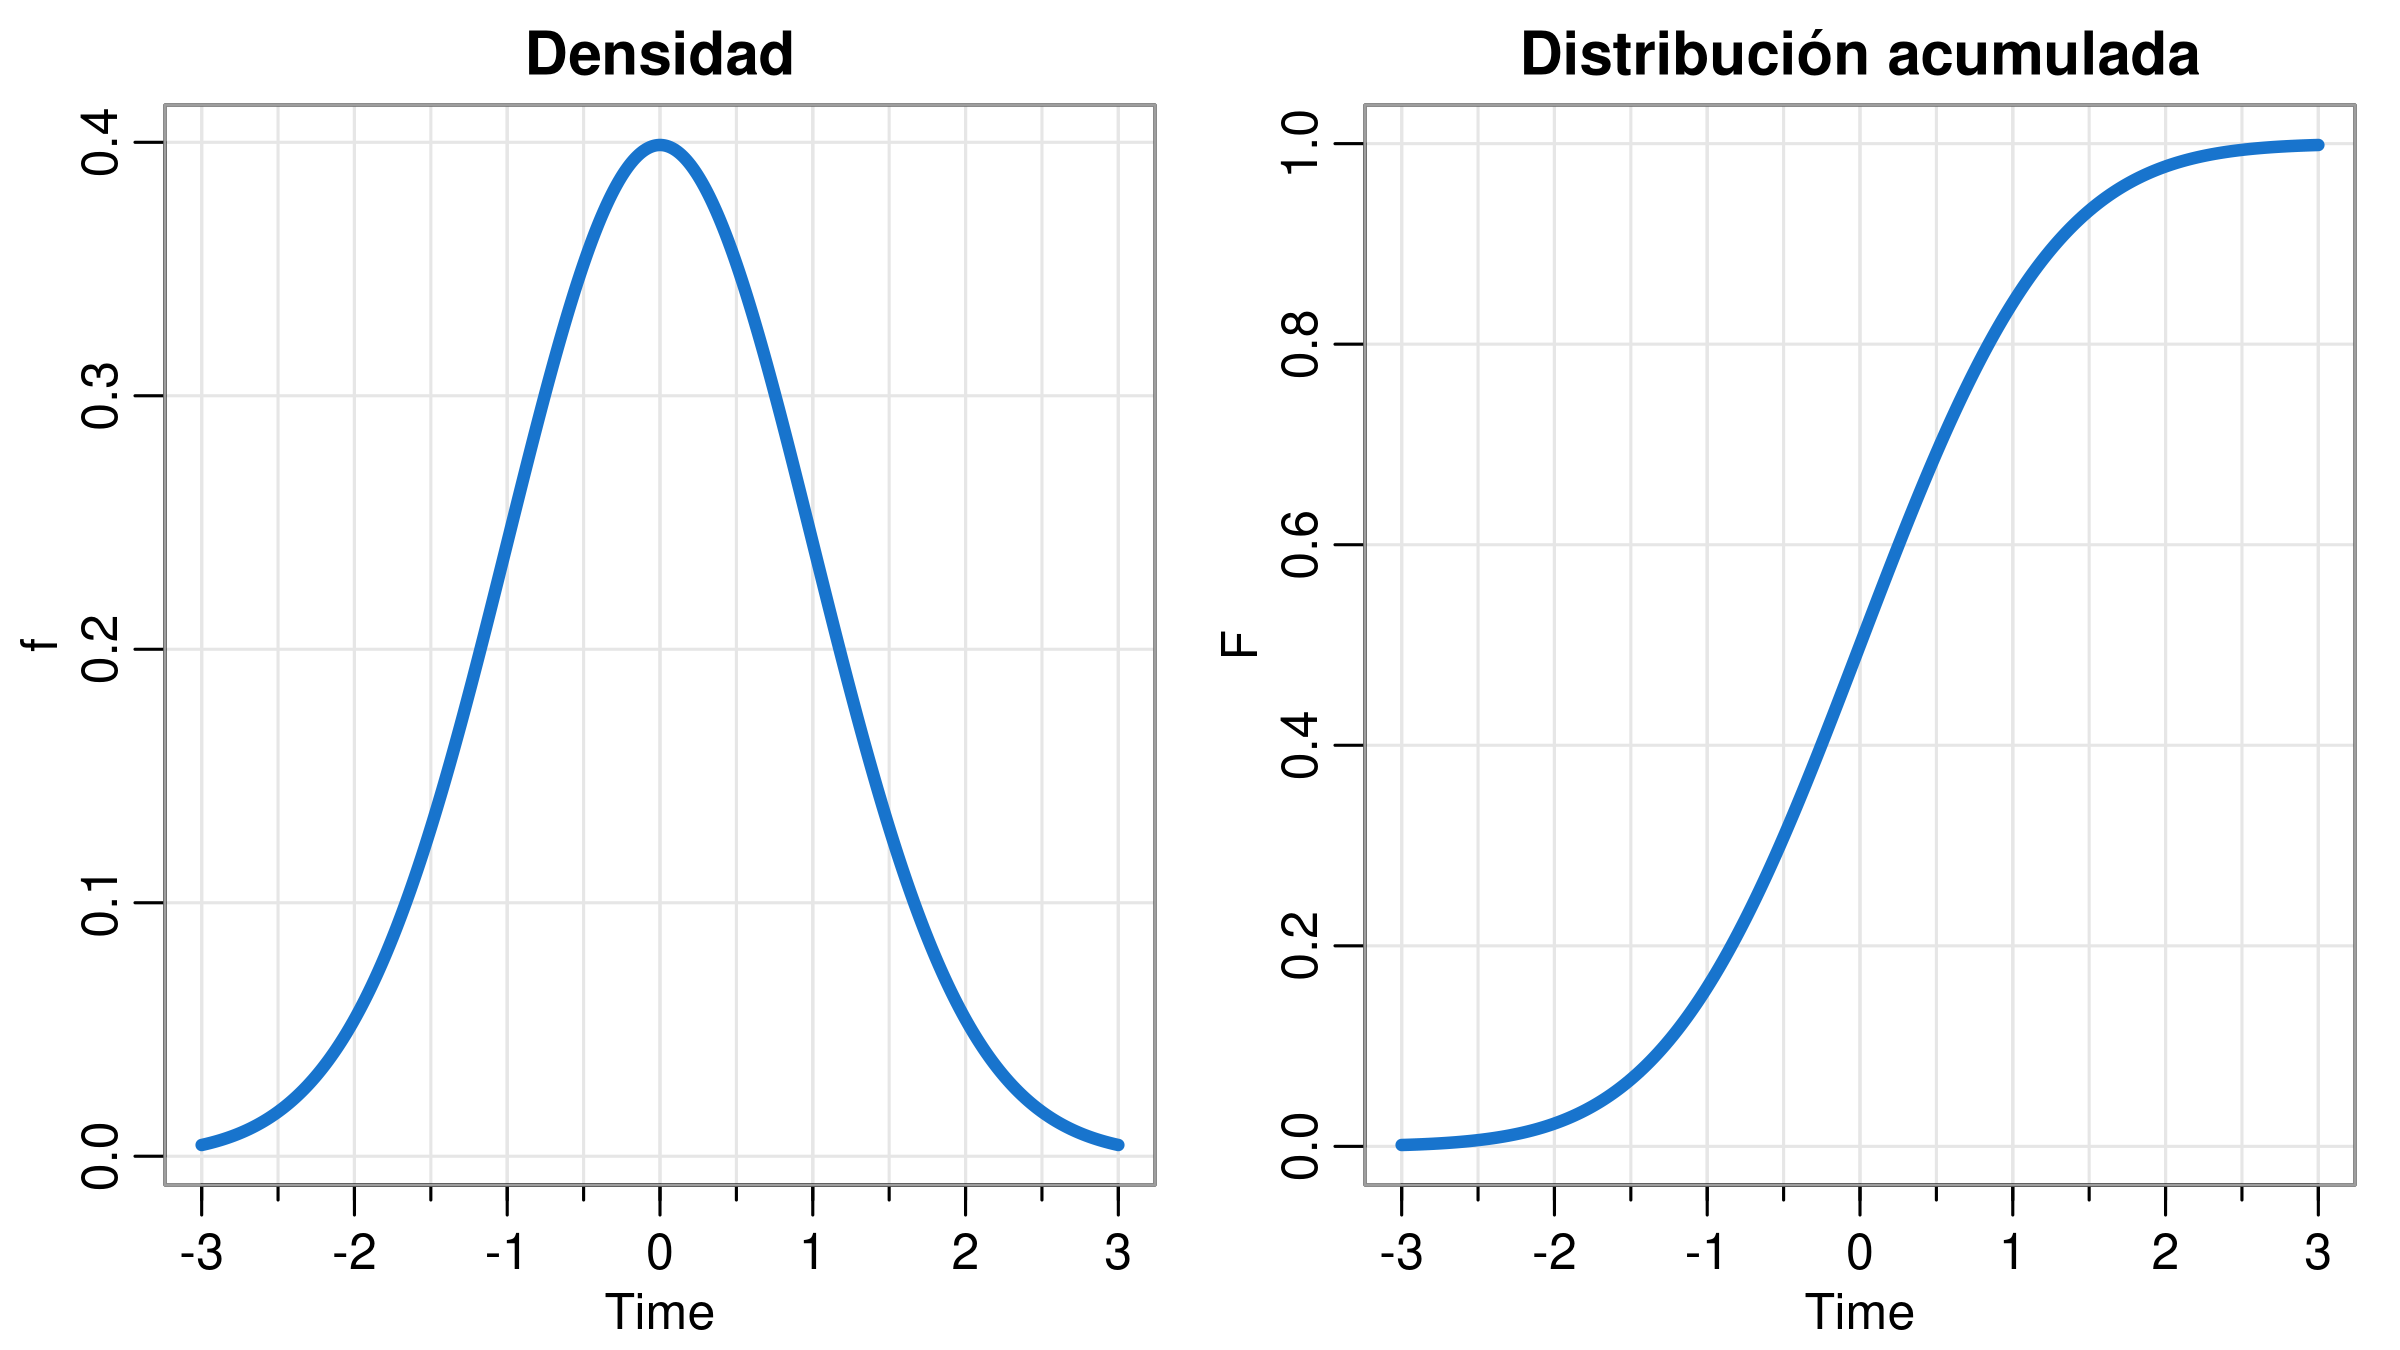

In [2]:
par(mfrow=c(1,2))
t = seq(-3, 3, length.out = 500)

f = dnorm(t, mean = 0, sd = 1, log = FALSE)
F = pnorm(t, mean = 0, sd = 1, log = FALSE)

tsplot(t,f, lwd=4, col=4, main="Densidad")
tsplot(t,F, lwd=4, col=4, main="Distribución acumulada")

### Histograma

Si uno tiene un conjunto de datos $x_1,\ldots,x_n$ que son "realizaciones" de una cierta v.a. $X$, el histograma es un estimador de la densidad de la misma.

El histograma se construye:
 
 * Partiendo el recorrido de la variable en intervalos.
 * Calculando la frecuencia de puntos observados en la muestra en cada intervalo.
 * Se realiza un gráfico de barras con el resultado.
 
Si además, normalizamos la altura de las barras para que el área total sea $1$, se vuelve un estimador de la densidad.

#### Ejemplo: Distribución normal

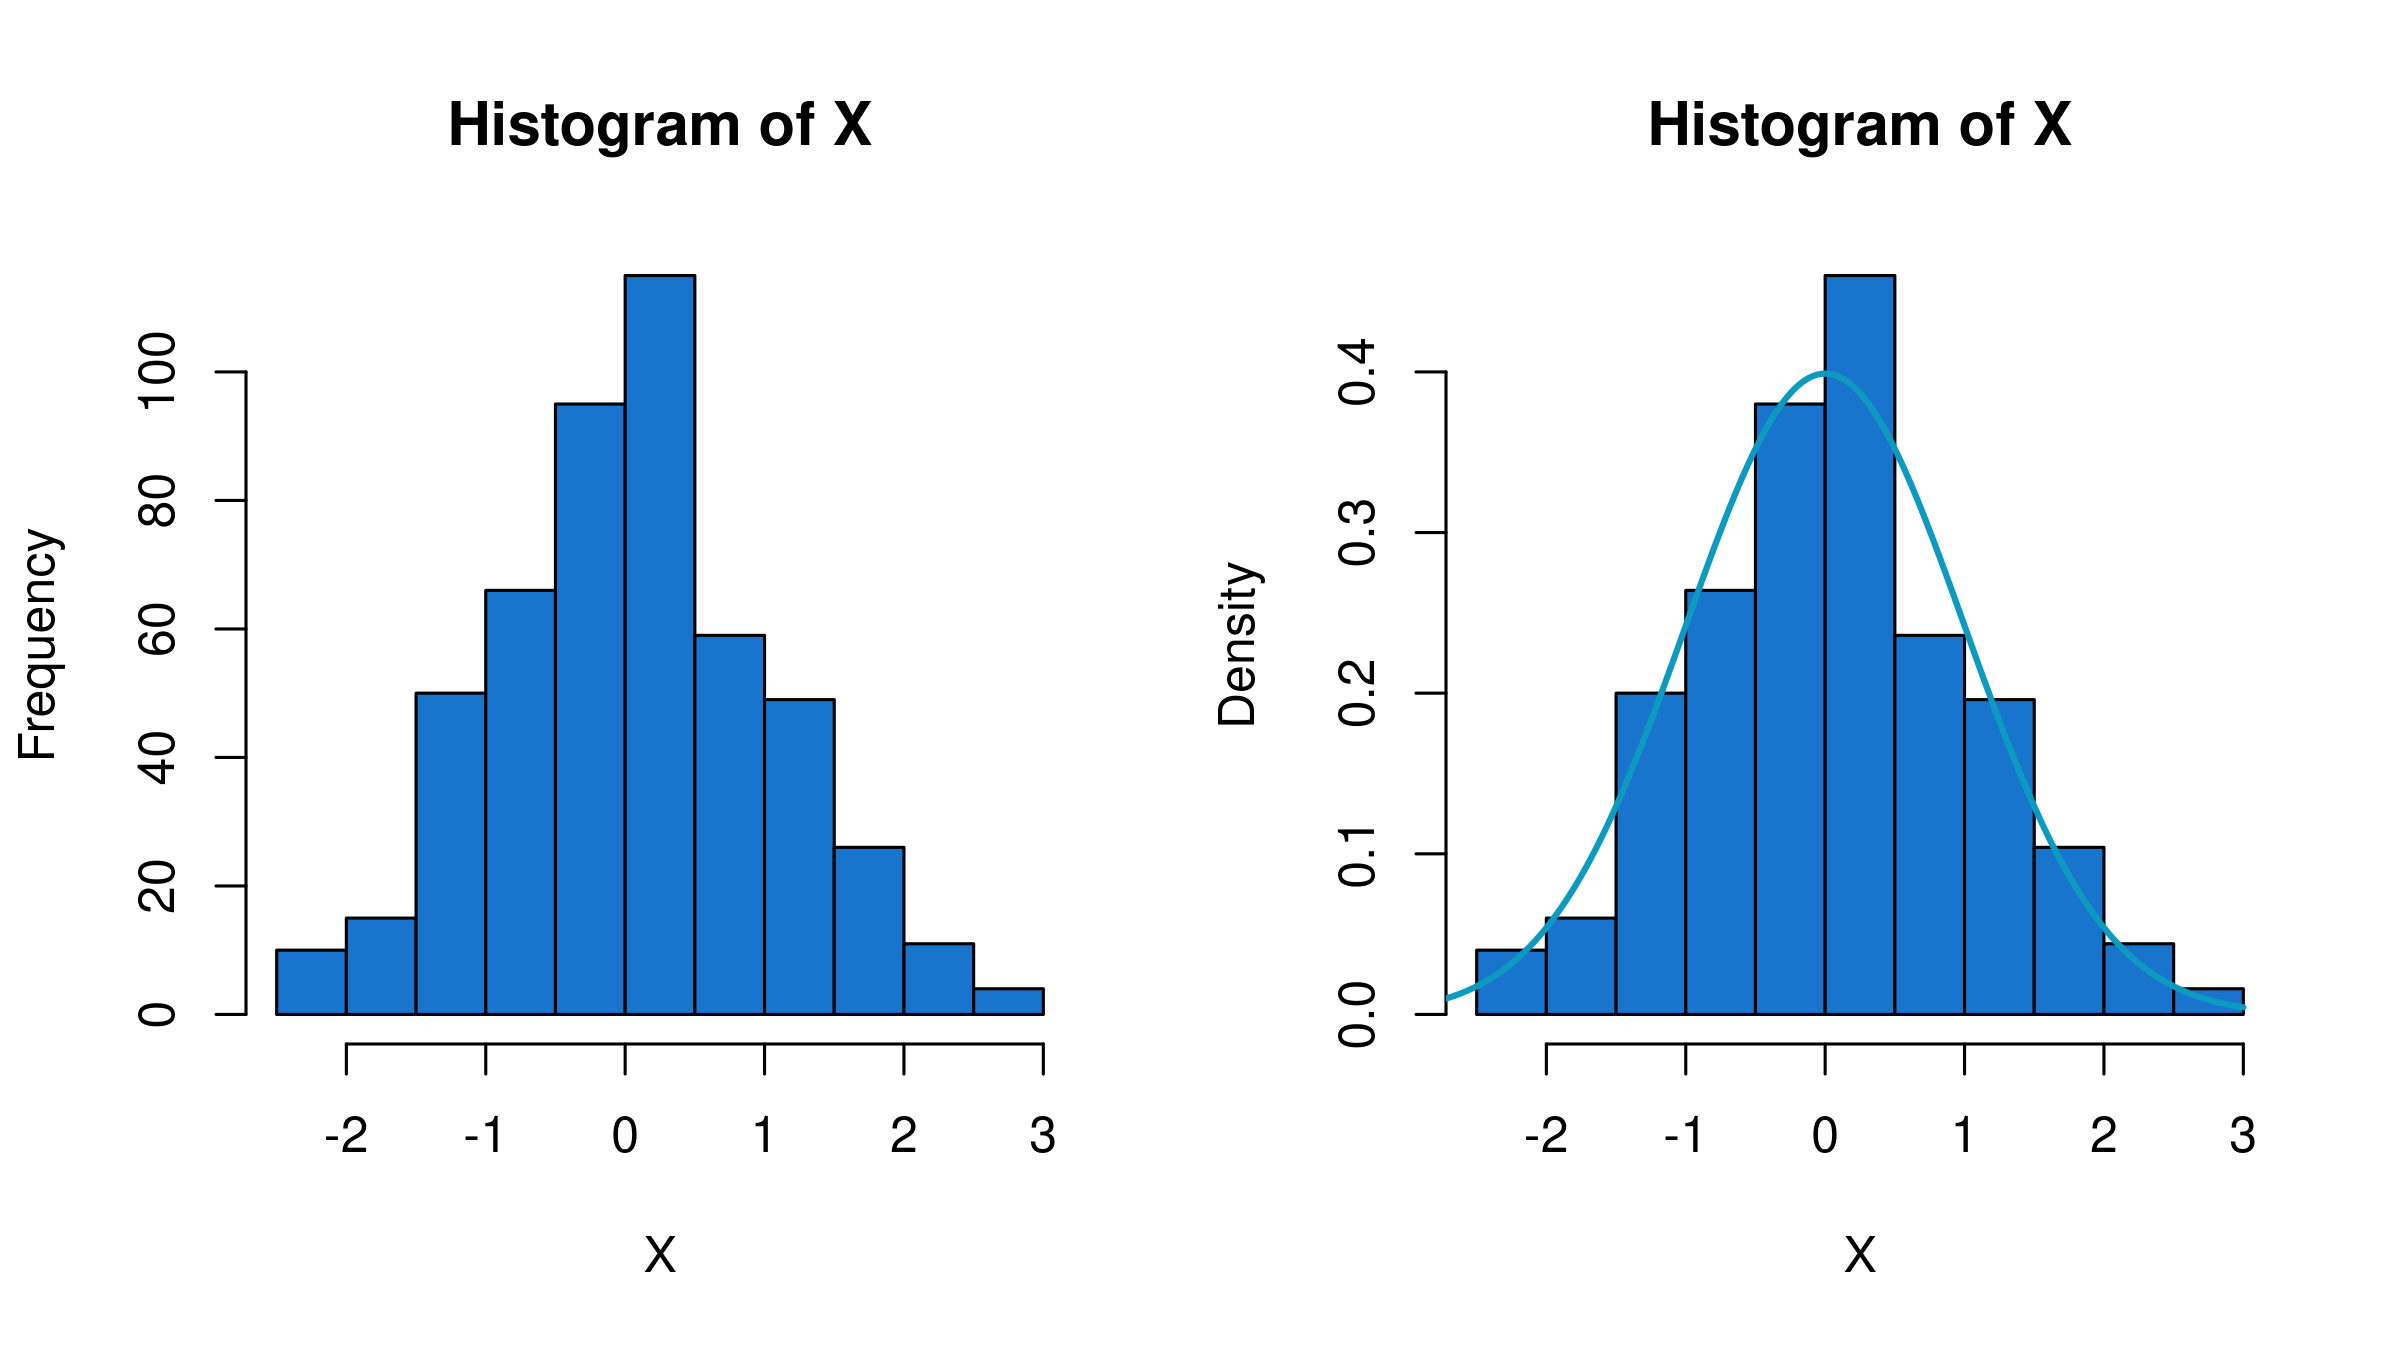

In [3]:
#Sorteo 500 realizaciones de una gaussiana estándar.
X = rnorm(500)

#grafico el histograma y el histograma normalizado con la densidad
par(mfrow=c(1,2))
hist(X,col=4)
hist(X,freq=FALSE,col=4)
lines(t,f, col=5, lwd=2)

#### Ejemplo: Distribución exponencial

$$f(x) = \lambda e^{-\lambda x}$$

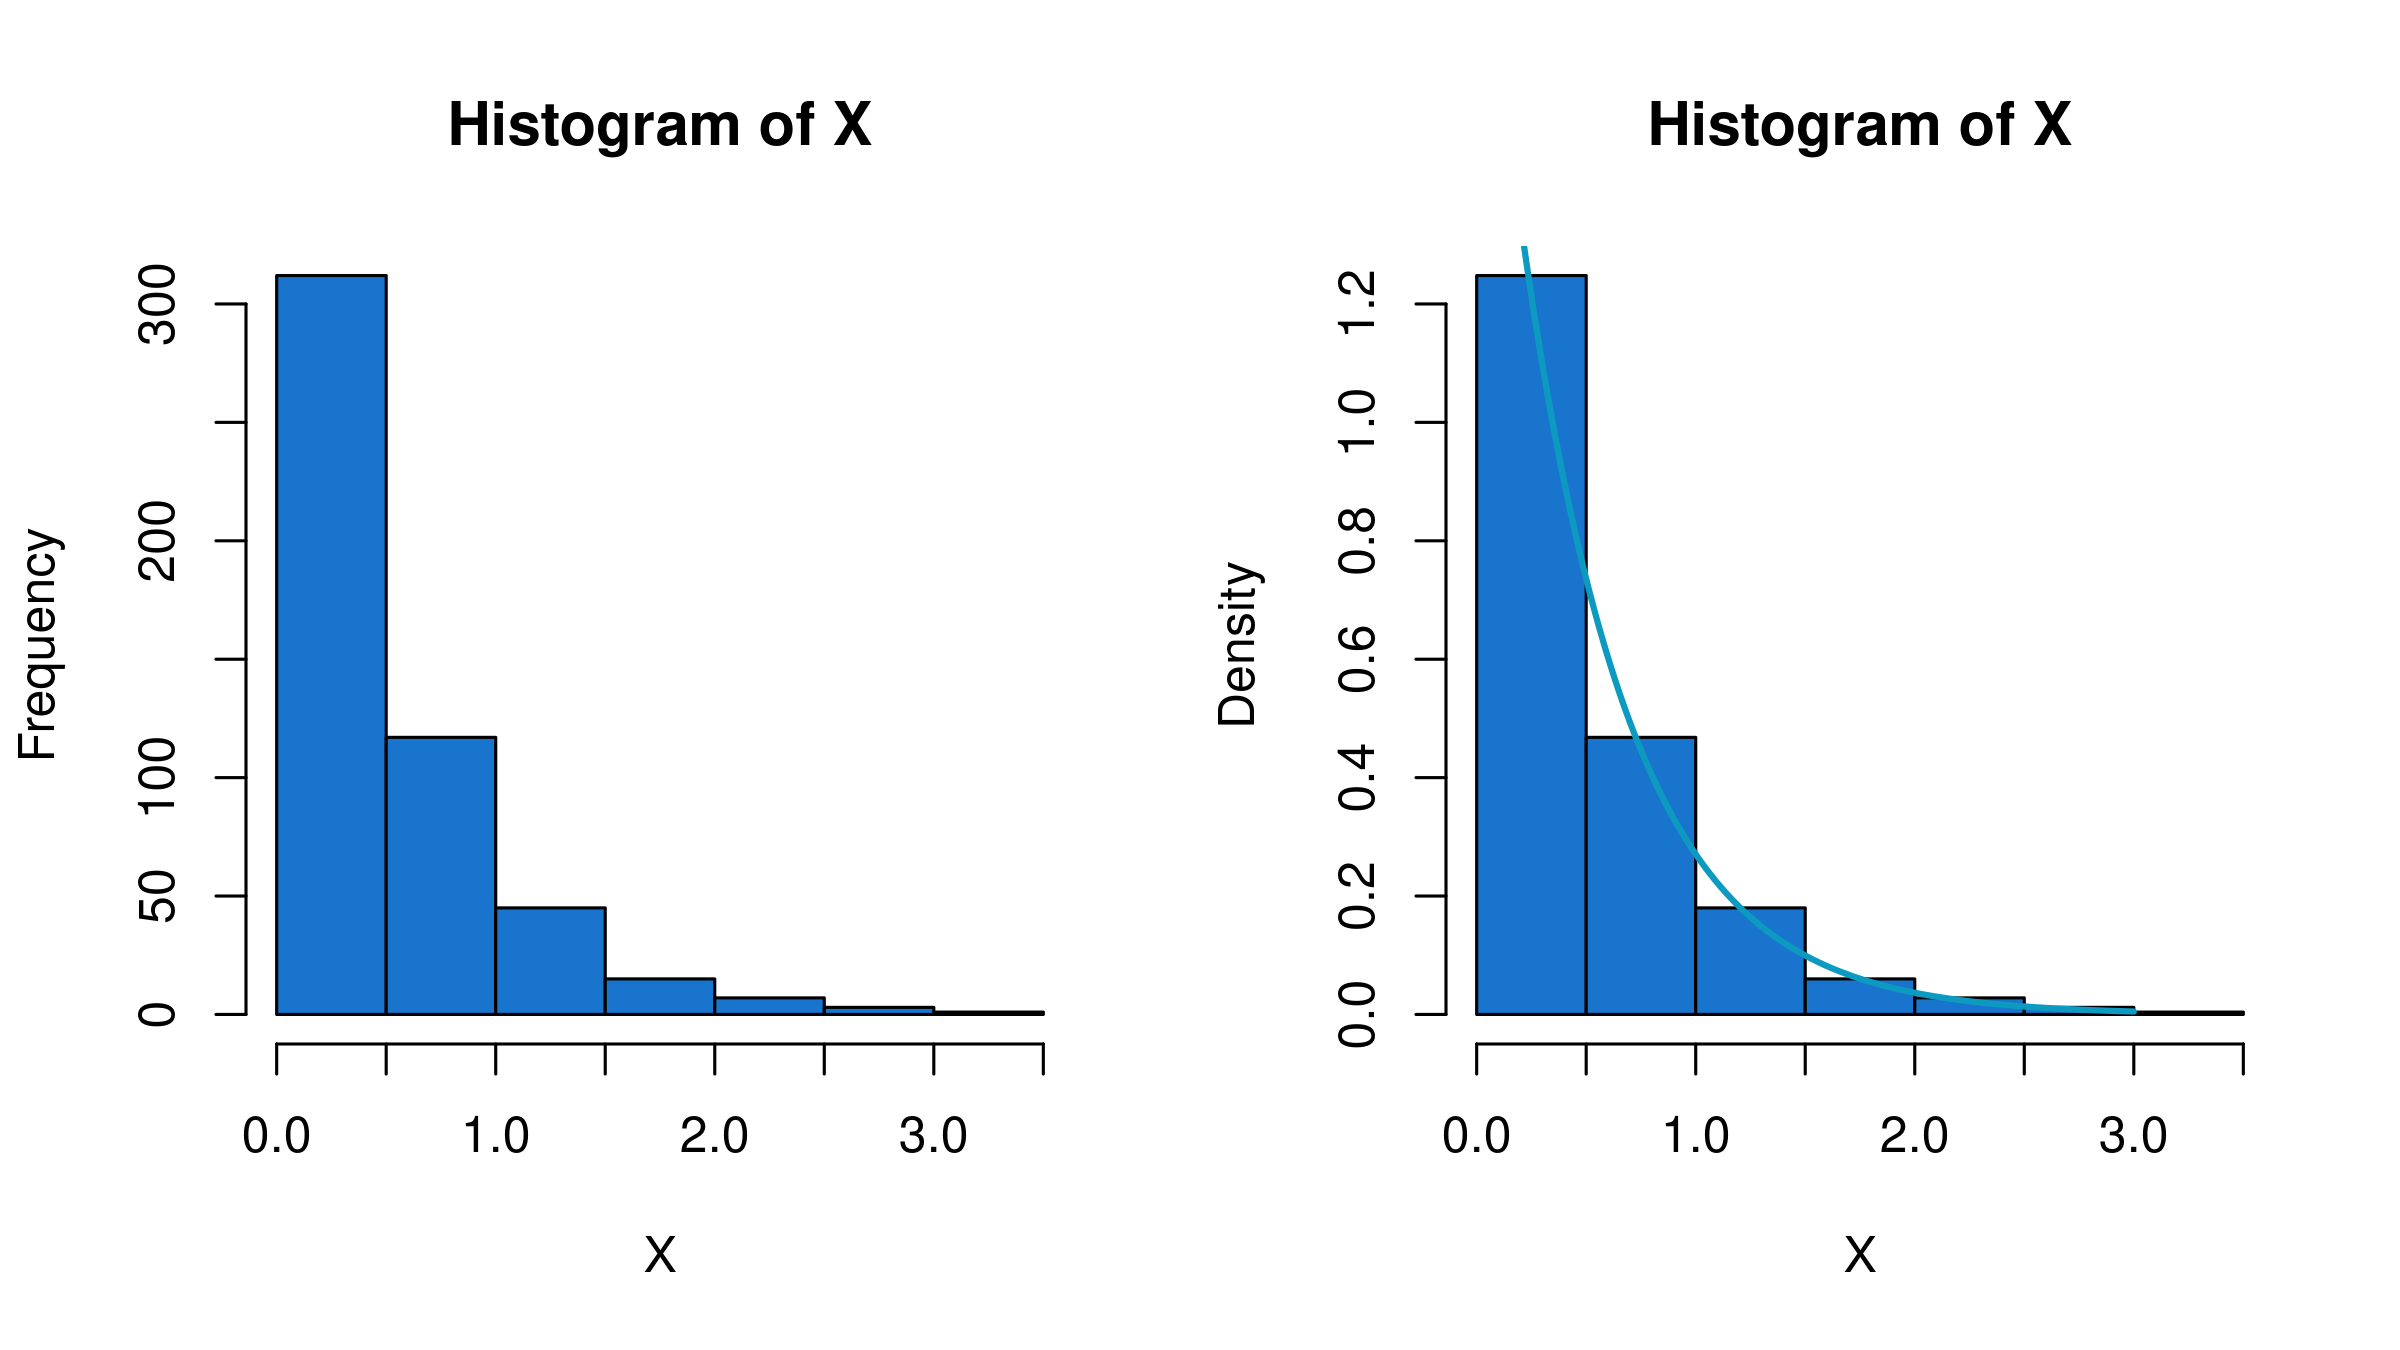

In [4]:
#Sorteo 500 realizaciones de una exponencial de parametro lambda
lambda = 2
X = rexp(500,lambda)

#grafico el histograma y el histograma normalizado con la densidad
par(mfrow=c(1,2))
hist(X,col=4)
hist(X,freq=FALSE,col=4)
lines(t,lambda*exp(-lambda*t), col=5, lwd=2)

#### Ejemplo: distribución lognormal

$$X \sim \textrm{lognormal}(\mu,\sigma^2)  \Leftrightarrow \log(X) \sim N(\mu,\sigma^2)$$

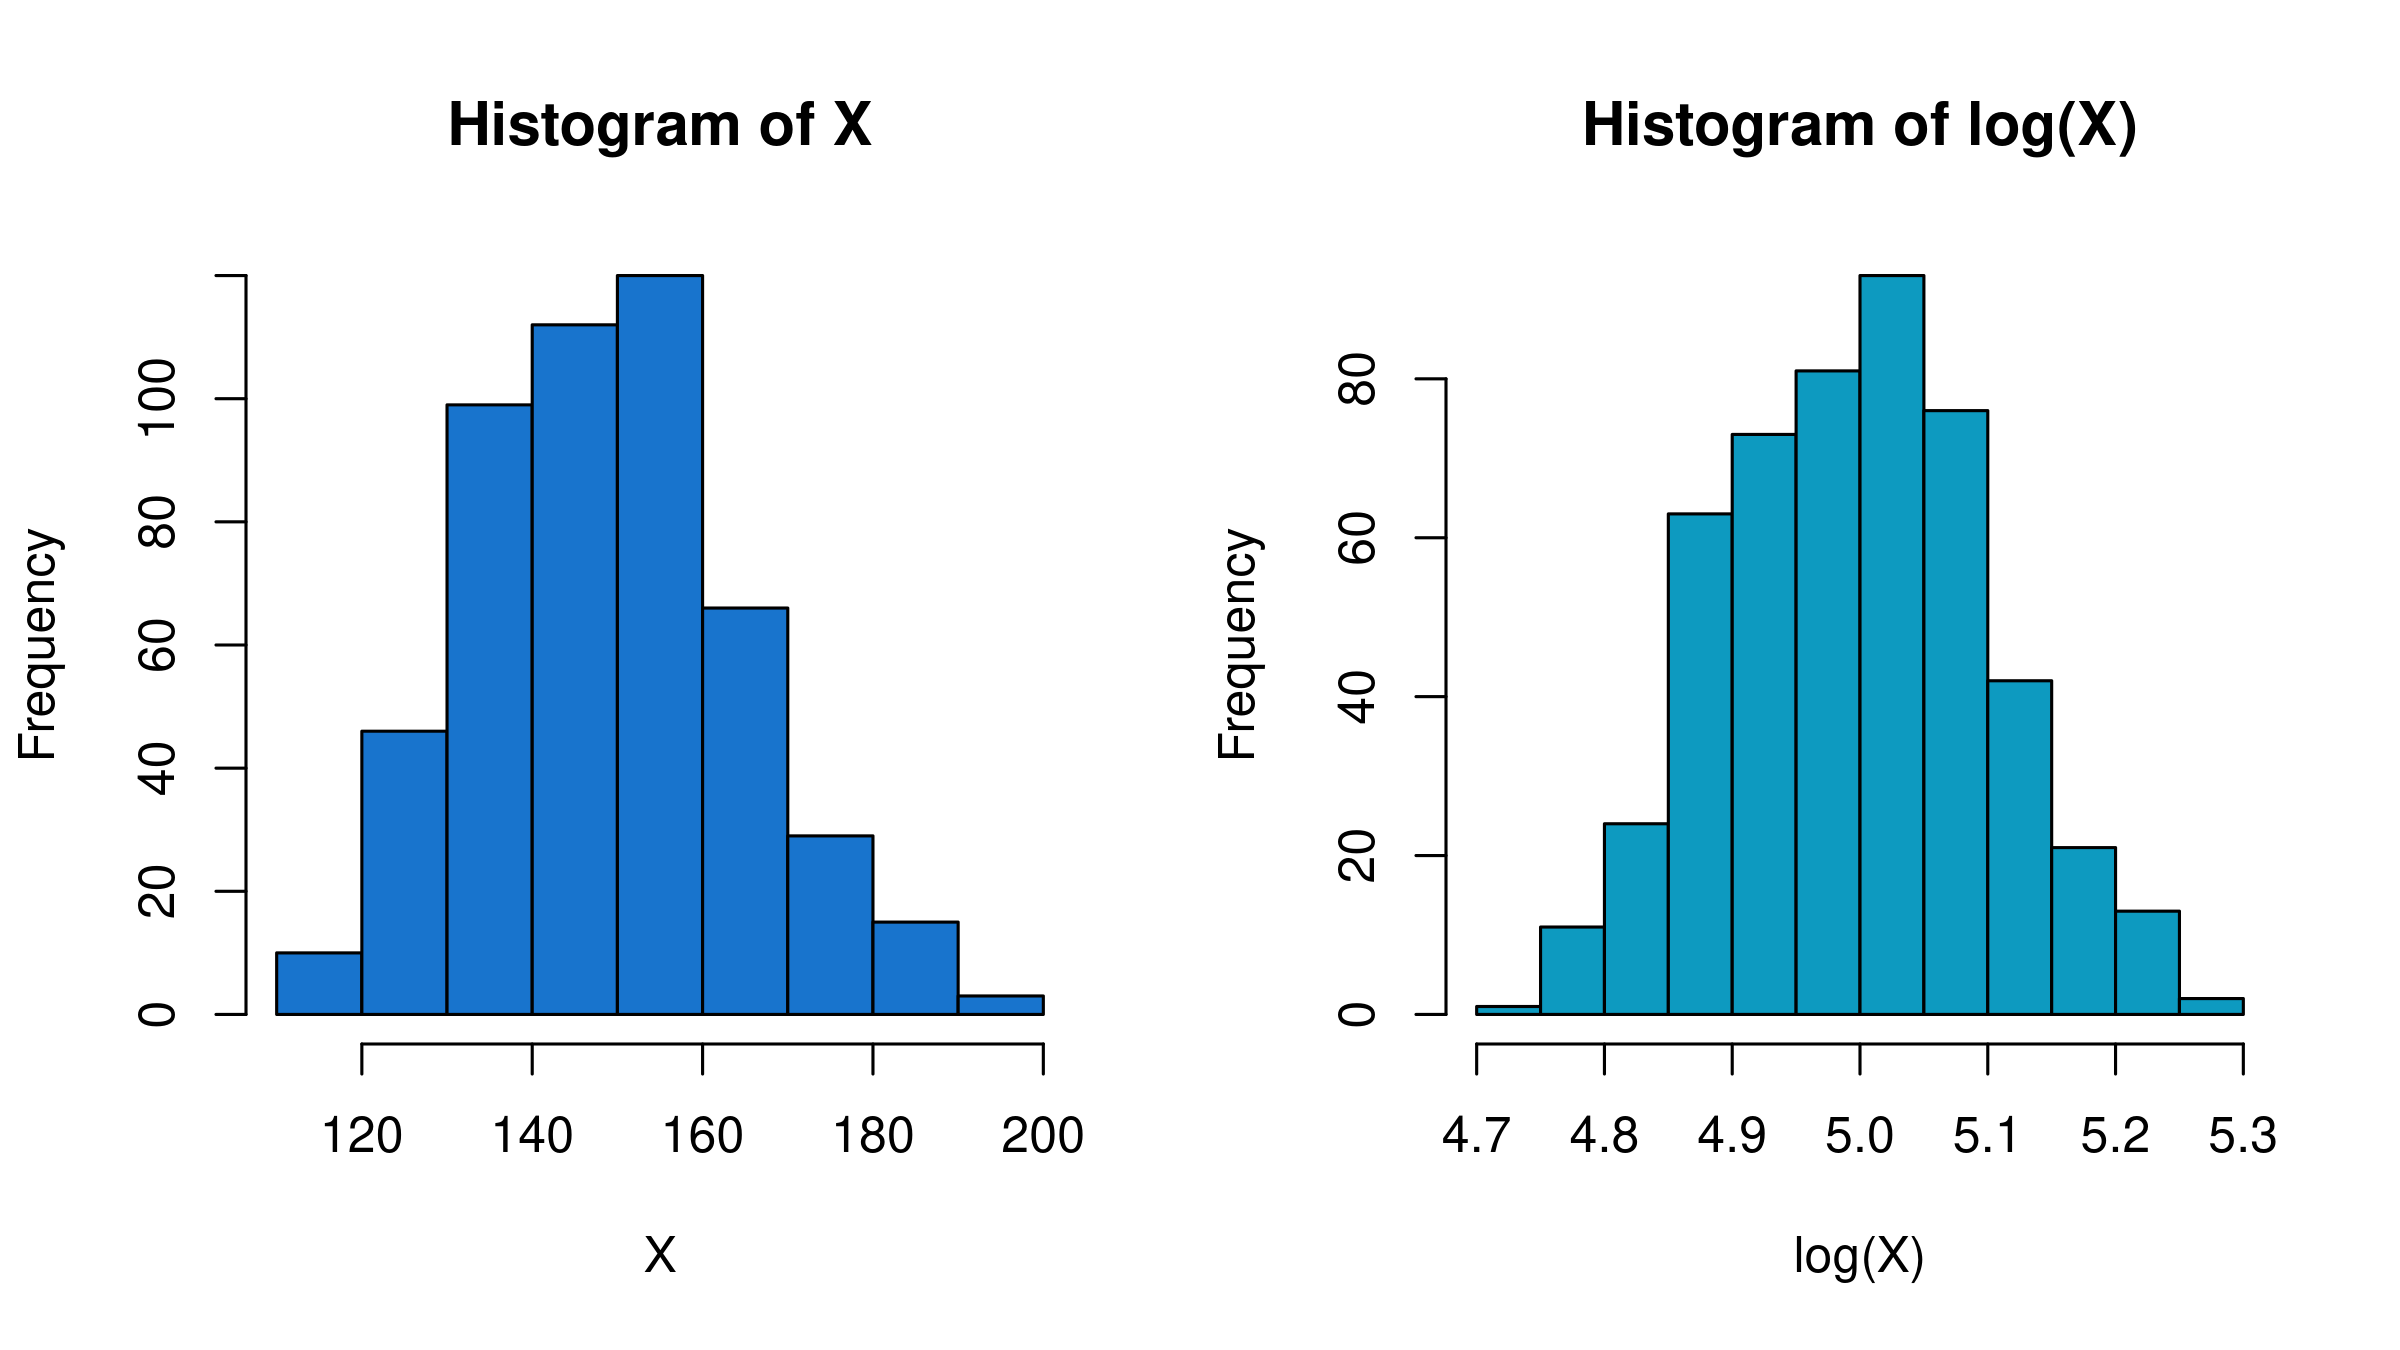

In [5]:
#Sorteo 500 realizaciones de una lognormal
X = rlnorm(500,5,0.1)

#grafico el histograma,
par(mfrow=c(1,2))
hist(X,col=4)
hist(log(X),col=5, main="Histogram of log(X)")

### Esperanza de una variable aleatoria

La *esperanza* o *media* de una variable aleatoria es una medida del "centro" o "promedio" de la misma. Se define en el caso continuo como:

$$E[X] = \int_{-\infty}^\infty x f(x) dx.$$

Más en general, para cualquier función $g:\mathbb{R}\to\mathbb{R}$, si $X$ es una v.a., entonces $Y=g(X)$ es una nueva v.a. cuya media es:

$$E[Y] = E[g(X)] =  \int_{-\infty}^\infty g(x) f(x) dx$$

**Ejemplos:**

 * Si $X\sim N(\mu,\sigma^2)$, entonces $E[X] = \mu$. 
 * Si $X\sim \exp(\lambda)$, entonces $E[X] = 1/\lambda$. 

### Relación con el promedio de datos

La *ley de grandes números* dice que si tengo una muestra de datos $x_1,\ldots,x_n$ obtenidos de manera independiente de una v.a. $X$, entonces se verifica:

$$\lim_{n\to\infty} \frac{1}{n}\sum_{i=1}^n x_i = E[X] \quad \text{con probabilidad }1.$$

Es decir, para cualquier muestra que podamos sortear en la práctica, el promedio de los datos converge a la esperanza.

**Nota:** Esta ley vale a veces para promedios de variables *dependientes* también.

#### Ejemplo

$X\sim N(10,100)$

In [6]:
X = rnorm(10000,10,10) #sorteo 10000 muestras. Atención: R recibe mu y sigma no mu y sigma^2

for (n in c(10,20,50,100,1000,5000,10000)) {
    print(paste("Para n=",n," el promedio es: ",mean(head(X,n))))
}

[1] "Para n= 10  el promedio es:  8.93023398349671"
[1] "Para n= 20  el promedio es:  8.97756437291134"
[1] "Para n= 50  el promedio es:  9.44775890624991"
[1] "Para n= 100  el promedio es:  8.75056891948323"
[1] "Para n= 1000  el promedio es:  9.9317674256151"
[1] "Para n= 5000  el promedio es:  9.85557603215058"
[1] "Para n= 10000  el promedio es:  9.90908665981202"


### Varianza de una variable aleatoria

La *varianza* es en cambio una medida de la *dispersión* de los resultados de la v.a. alrededor de su media. A mayor varianza, más "variabilidad" podemos esperar en los sorteos.

$$\mathrm{Var}(X) = E\left[ (X-E[X])^2 \right] = E[X^2] - (E[X])^2.$$

A la varianza se le denota en general por $\sigma^2$, y a su raíz, $\sigma$, se le denomina *desvío estándar*.

**Ejemplo:** Si $X\sim N(\mu,\sigma^2)$ precisamente $\sigma^2$ es la varianza de la distribución. En este caso es uno de los parámetros. En el caso gaussiano (y solo en este caso!), la mayor parte (95%) de las muestras se concentran a $\pm 2\sigma$ de la media.

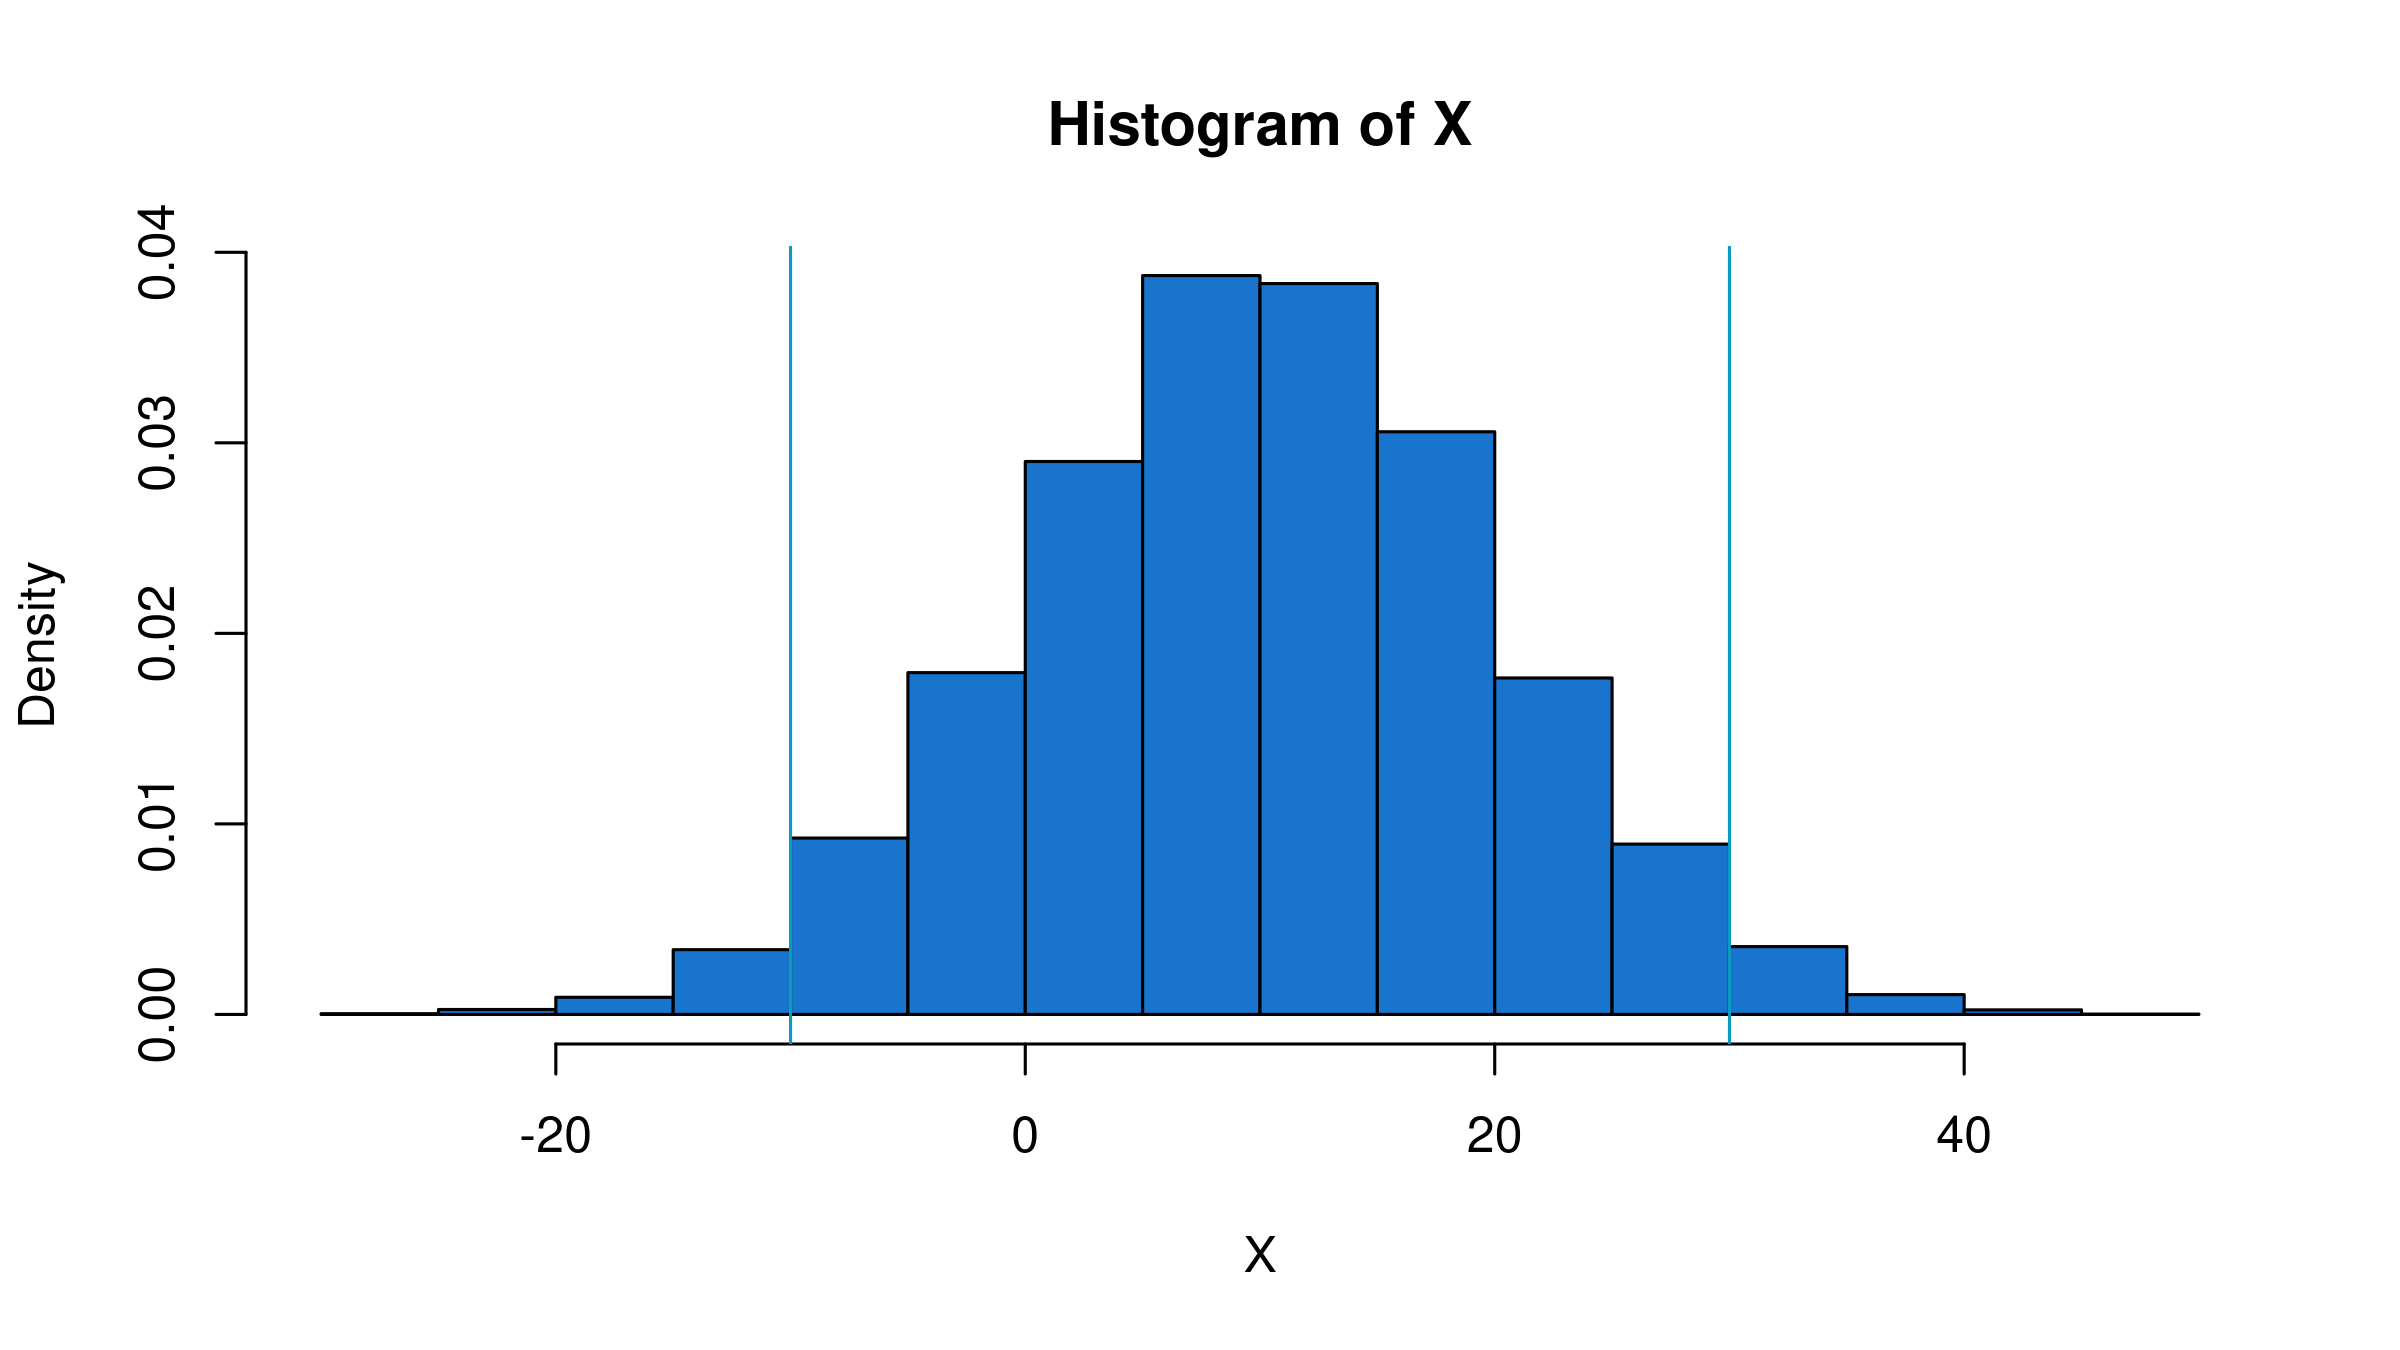

In [7]:
mu=10
sigma = 10
X = rnorm(10000,mu,sigma) #sorteo 10000 muestras. Atención: R recibe mu y sigma no mu y sigma^2

hist(X, freq=FALSE, col=4)
abline(v=mu-2*sigma, col=5)
abline(v=mu+2*sigma, col=5)

#### Estimación de la varianza

Así como el promedio converge a la esperanza, podemos usar la ley de grandes números nuevamente para estimar la varianza y el desvío estándar a partir de una muestra $x_1,\ldots,x_n$ mediante la siguiente cuenta:

$$\sigma_n^2 = \frac{1}{n} \sum_{i=1}^n (x_i-\bar{x}_n)^2, \quad \quad \sigma_n = \sqrt{\sigma_n^2}.$$

Sin embargo, el mejor estimador (insesgado) para la varianza surge de normalizar por $n-1$ y es lo que generalmente se implementa en software:

$$s_n^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i-\bar{x}_n)^2, \quad \quad s_n = \sqrt{s_n^2}.$$


In [8]:
mu=10
sigma = 10
X = rnorm(10000,mu,sigma) #sorteo 10000 muestras. Atención: R recibe mu y sigma no mu y sigma^2

print(paste("Varianza estimada s_n^2: ", var(X)))
print(paste("Desvío estimado s_n: ", sd(X)))

[1] "Varianza estimada s_n^2:  100.671444454541"
[1] "Desvío estimado s_n:  10.0335160564251"


## Definición de serie temporal:

Una *serie temporal* es una sucesión de variables aleatorias o *proceso estocástico* $x_0,x_1,x_2,\ldots$. La variable aleatoria $x_t$ denota el valor del proceso al tiempo $t$.

* Al proceso estocástico o serie temporal se lo denota por $\{x_t\}$.

* Típicamente (y para todo este curso) se consideran indexados por $t$ entero ($\ldots, -2, -1, 0, 1, 2, \ldots$) o $t$ entero positivo.

* A los valores particulares que toma una serie temporal cuando la observamos se le denomina *realización* del proceso, y lo denotaremos por $x_t$, abusando un poco de la notación.

### Análisis y predicción en series temporales

 * En general, una serie de datos que obtenemos $x_t$ podemos pensarla como la *realización* de algún proceso estocástico subyacente, el cuál desconocemos.
 
 * Podemos entonces formular un **modelo** para la serie. Por ejemplo, autorregresivo (AR), autorregresivo-media móvil (ARMA), modelos en espacio de estados, etc. etc.
 
 * En base a los datos buscamos ajustar los parámetros de dicho modelo.
 
 * Usando la estructura del modelo tratamos luego de extrapolar a futuro el comportamiento.

### Algunas observaciones básicas:

* Normalmente __graficar__ la evolución de una realización nos da pistas de cómo analizarla.

* A veces las graficaremos como puntos, otras veces como líneas continuas, sobre todo cuando sean la realización de algún proceso continuo subyacente. (por ejemplo, sismógrafo, sonido en la sección anterior). 

* En general series continuas de todos modos se *muestrean* a intervalos discretos, y al analizarlas en un computadora esto es forzosamente así.

* __Observación:__ Elegir el intervalo de muestreo es un arte en sí mismo para capturar la dinámica de la serie.

### Ejemplo 1: Ruido blanco

**Definición:** El caso más sencillo de serie temporal es un conjunto de variables aleatorias con la misma distribución y no correlacionadas. Si ${w_t}$ es una serie temporal en la cual las variables tienen media $E[w_t]=0$, varianza $Var(w_t) = \sigma_w^2 >0$ y la covarianza de $w_t$ y $w_s$ es $0$ se le denomina *ruido blanco*.  

**Definición:** Si además las variables son independientes y con la misma distribución (iid), se le denomina ruido blanco independiente.

**Definición:** En el caso que además la distribución de $w_t$ para cada $t$ sea Normal $N(0,\sigma_w^2)$ le llamamos *ruido blanco gaussiano*

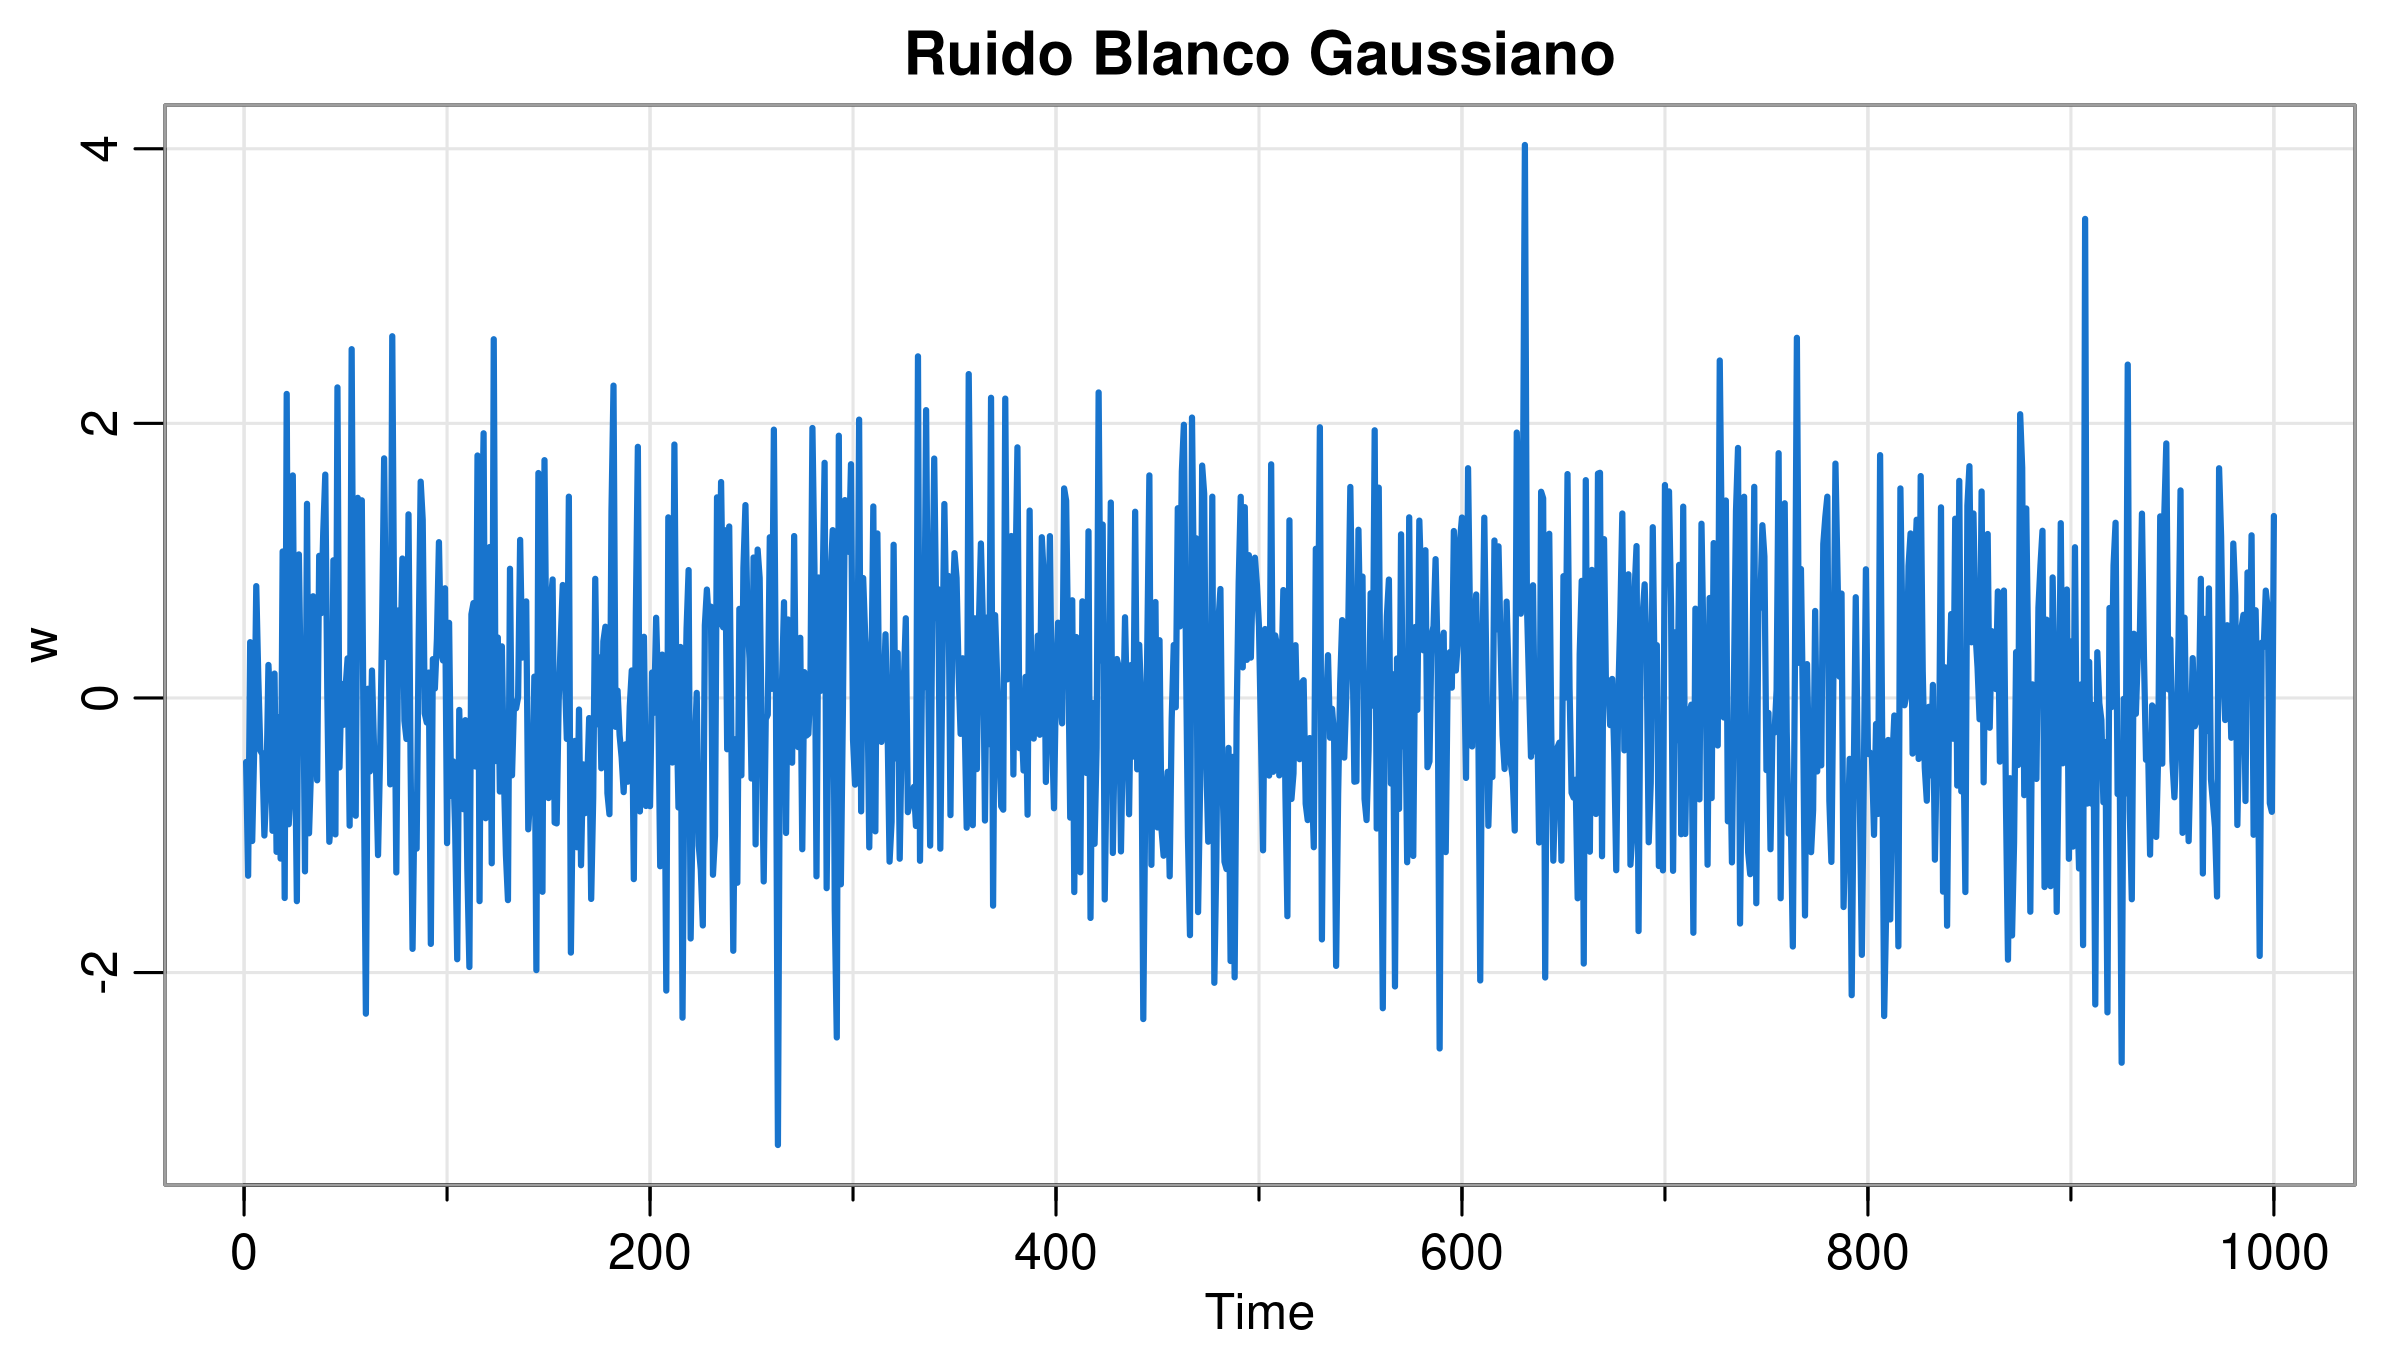

In [9]:
w = rnorm(1000,0,1)  # 1000 N(0,1) variates
tsplot(w, main="Ruido Blanco Gaussiano", lwd=2, col=4)

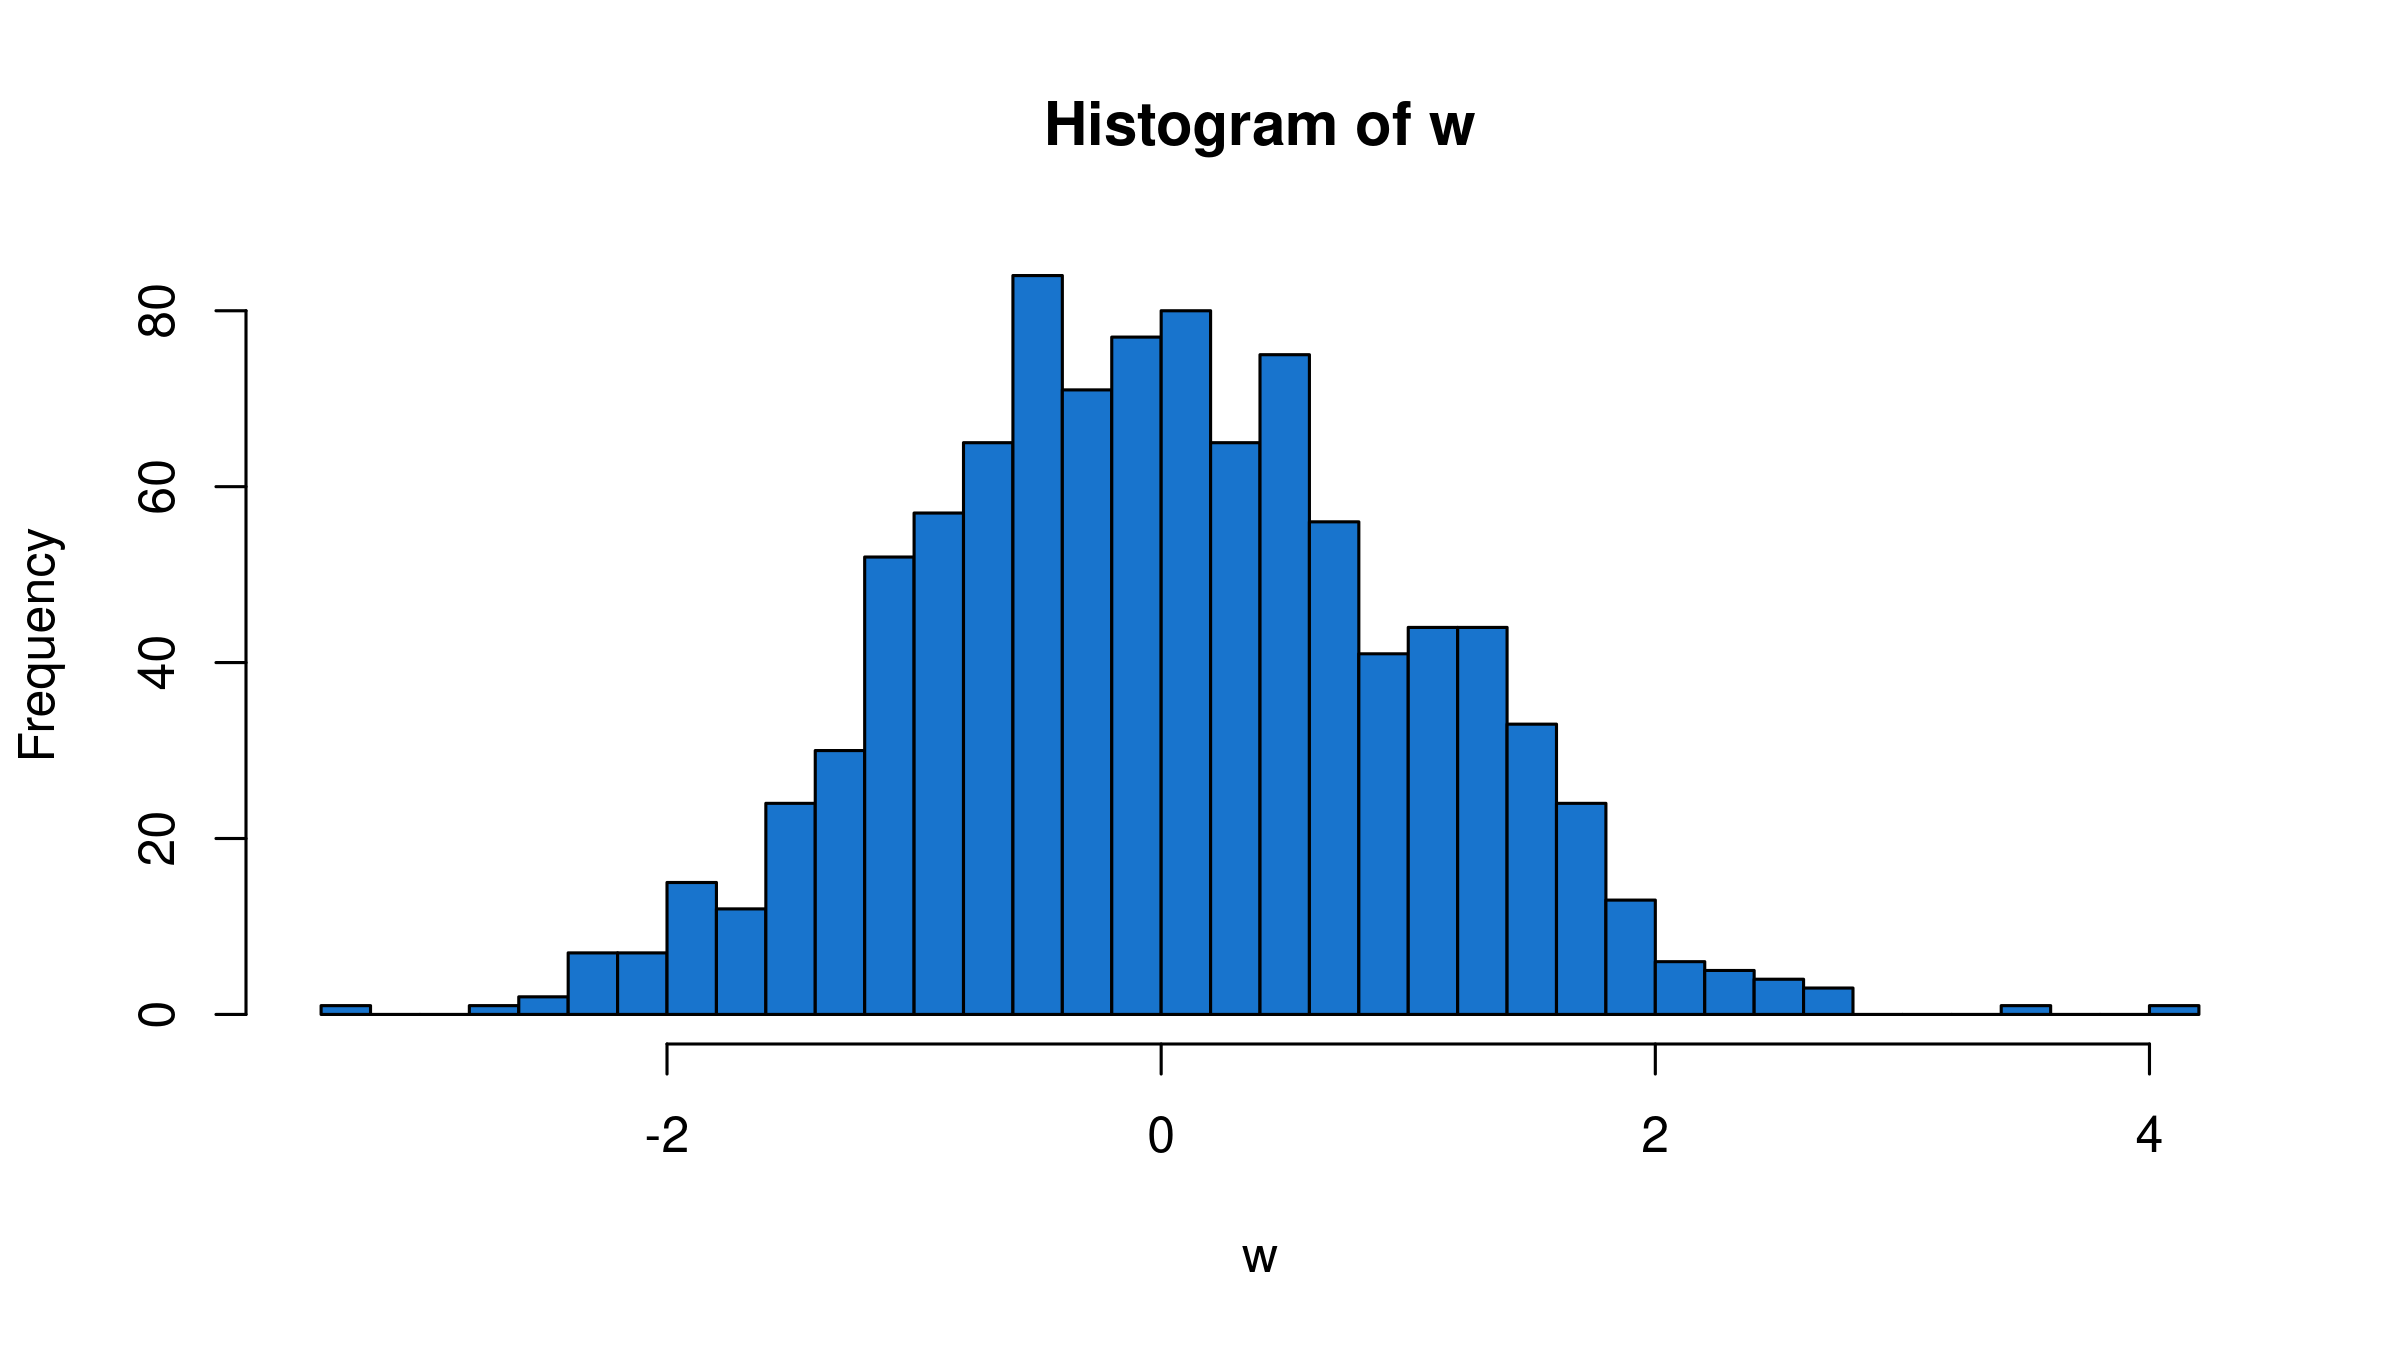

In [10]:
hist(w,30,col=4)

### Observación:

Como $\mathrm{Var}(a X) = a^2 \mathrm{Var}(x)$, si tenemos ruido blanco de varianza $1$ y lo multiplicamos por $\sigma$, obtendremos ruido blanco de varianza $\sigma^2$:

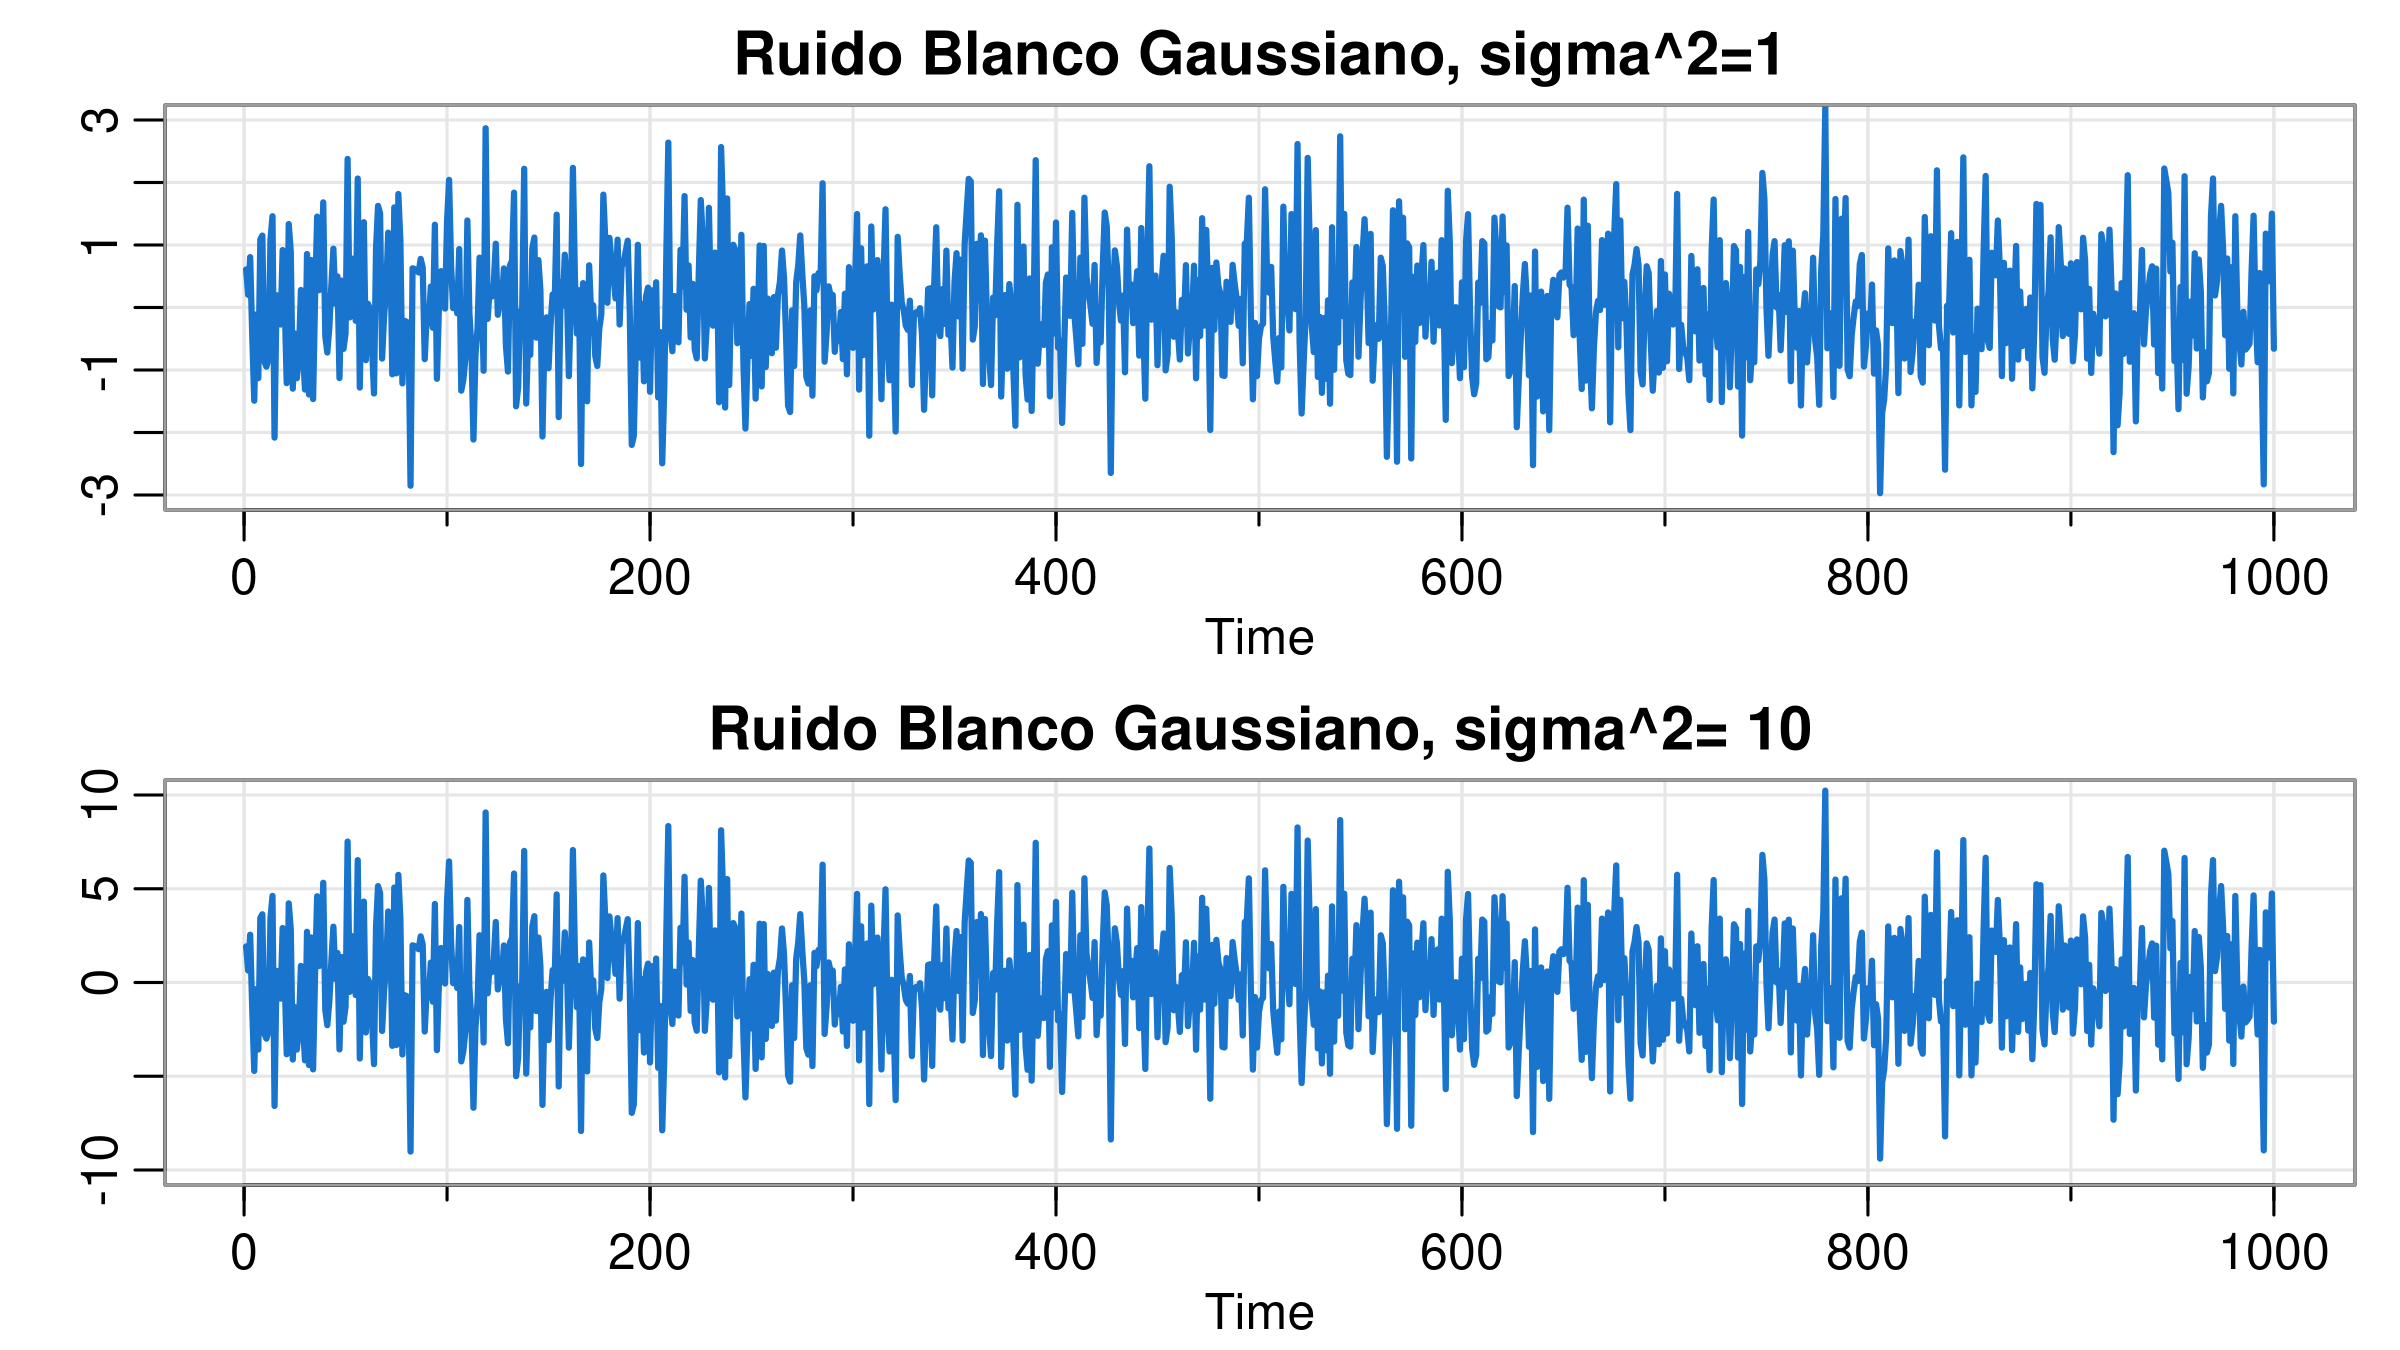

In [11]:
w = rnorm(1000,0,1)  # 1000 N(0,1) variates
sigma2 = 10

par(mfrow=c(2,1))
tsplot(w, main="Ruido Blanco Gaussiano, sigma^2=1", lwd=2, col=4, ylab="", ylim=c(-3,3))
tsplot(sqrt(sigma2)*w, main=paste("Ruido Blanco Gaussiano, sigma^2=",sigma2), lwd=2, col=4, ylab="", ylim=c(-10,10))

### Ejemplo 2: Media móvil


Considere un proceso de ruido blanco (gaussiano) $w_t$ al que se le aplica la siguiente transformación:

$$ x_t = \frac{1}{3}(w_{t-2} + w_{t-1} + w_{t})$$

Es decir, el valor de $x_t$ es un promedio de los últimos $3$ valores de un ruido blanco. ¿Qué ocurre?

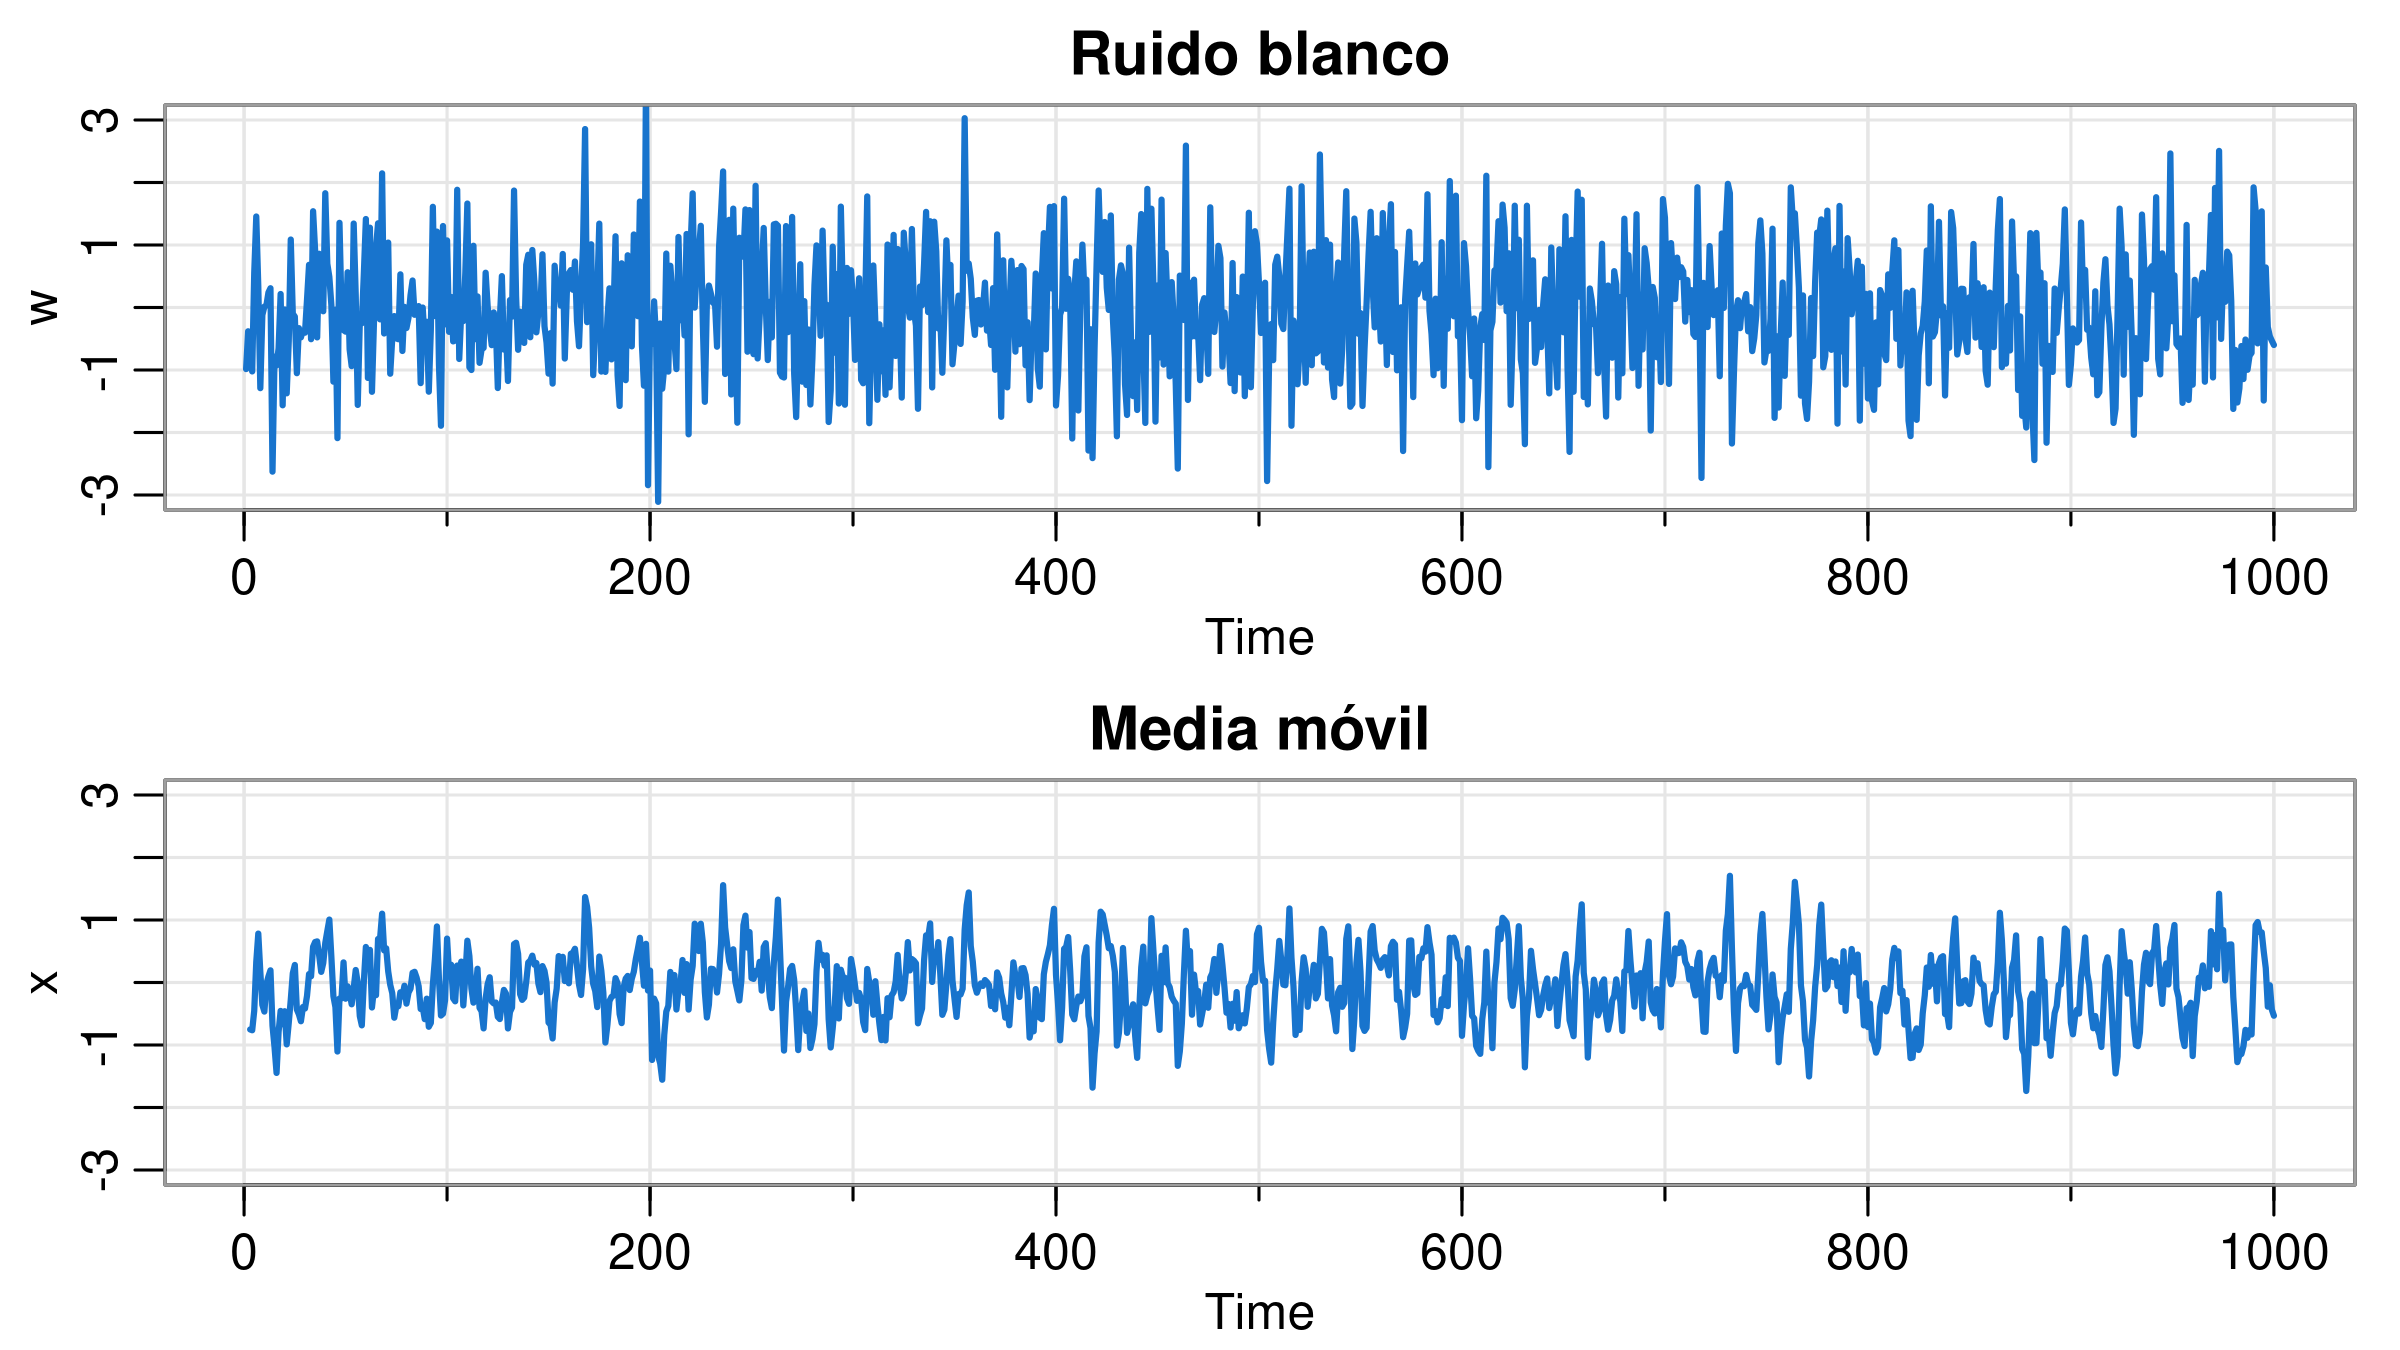

In [12]:
w = rnorm(1000,0,1)  # 1000 N(0,1) variates
x = filter(w, sides=1, rep(1/3,3))  # moving average
par(mfrow=c(2,1))
tsplot(w, ylim=c(-3,3), main="Ruido blanco", col=4, lwd=2)
tsplot(x, ylim=c(-3,3), main="Media móvil", col=4,lwd=2)

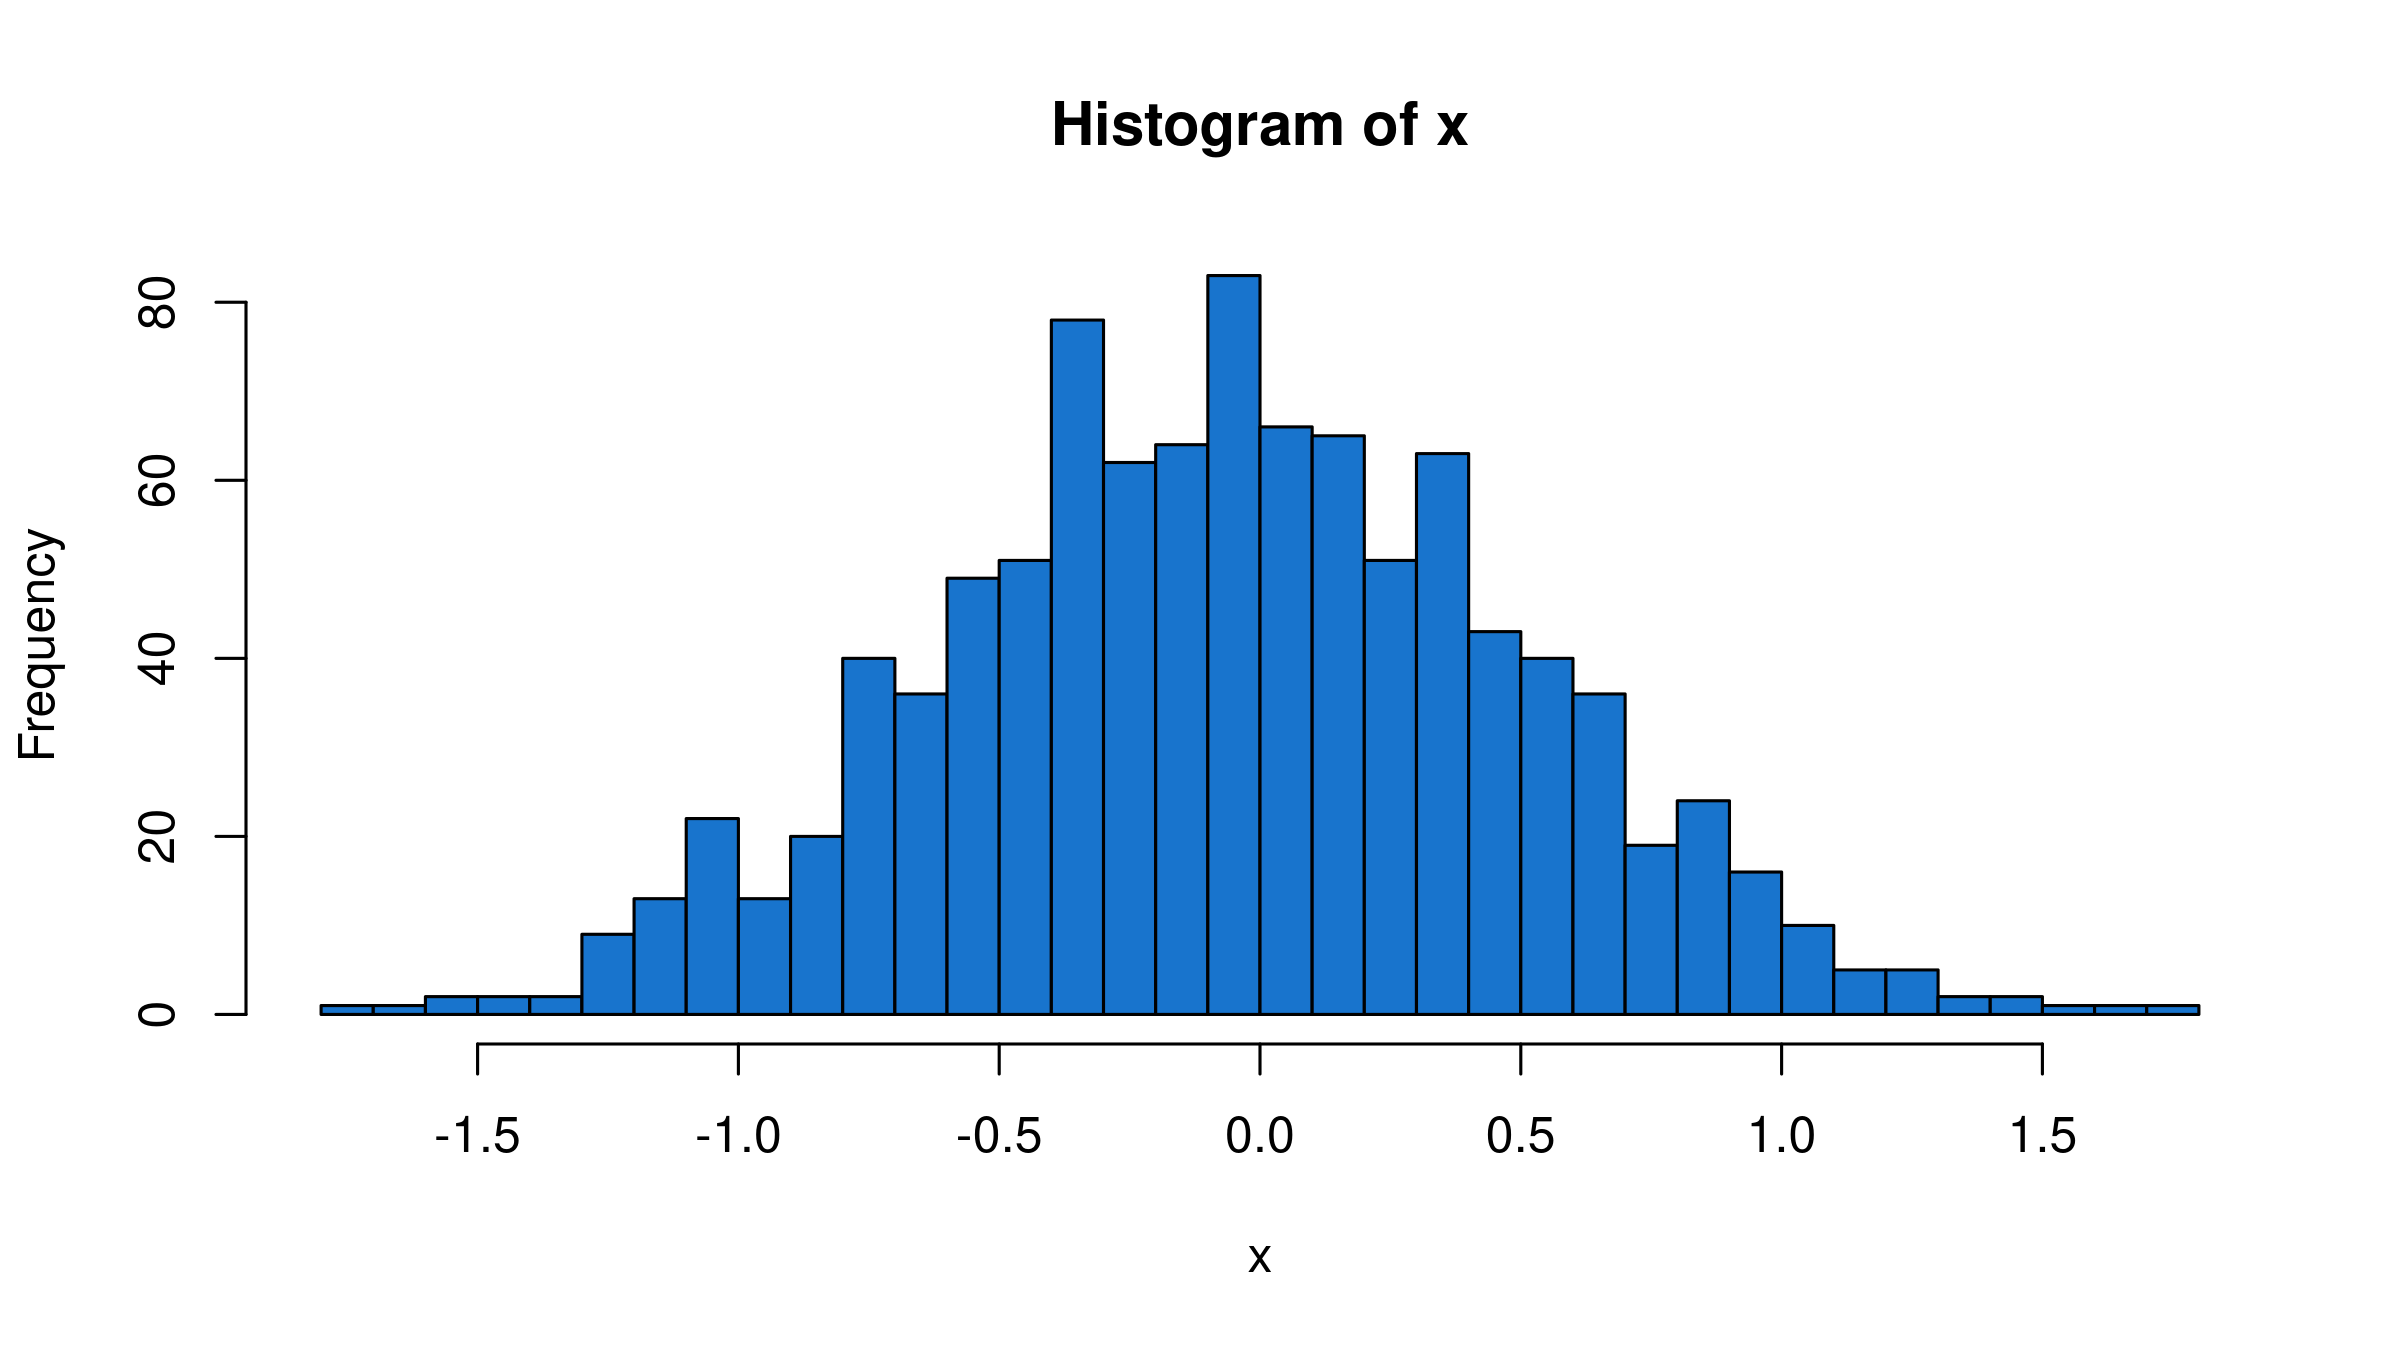

In [13]:
hist(x,30,col=4)

### Observaciones:

* El proceso $x_t$ es más *suave* que el ruido blanco, y tiene menos variabilidad.

* El promediado elimina las oscilaciones más rápidas, y comienzan a realzarse las lentas.

* Al proceso de tomar ruido blanco (o cualquier señal) y aplicarle una transformación lineal como la anterior se le llama *media móvil* o *filtrado*. De ahí el comando `filter` que se utiliza.

### Media móvil con coeficientes arbitrarios

Lo anterior se puede realizar con coeficientes cualesquiera, cambiando así la estructura del proceso.

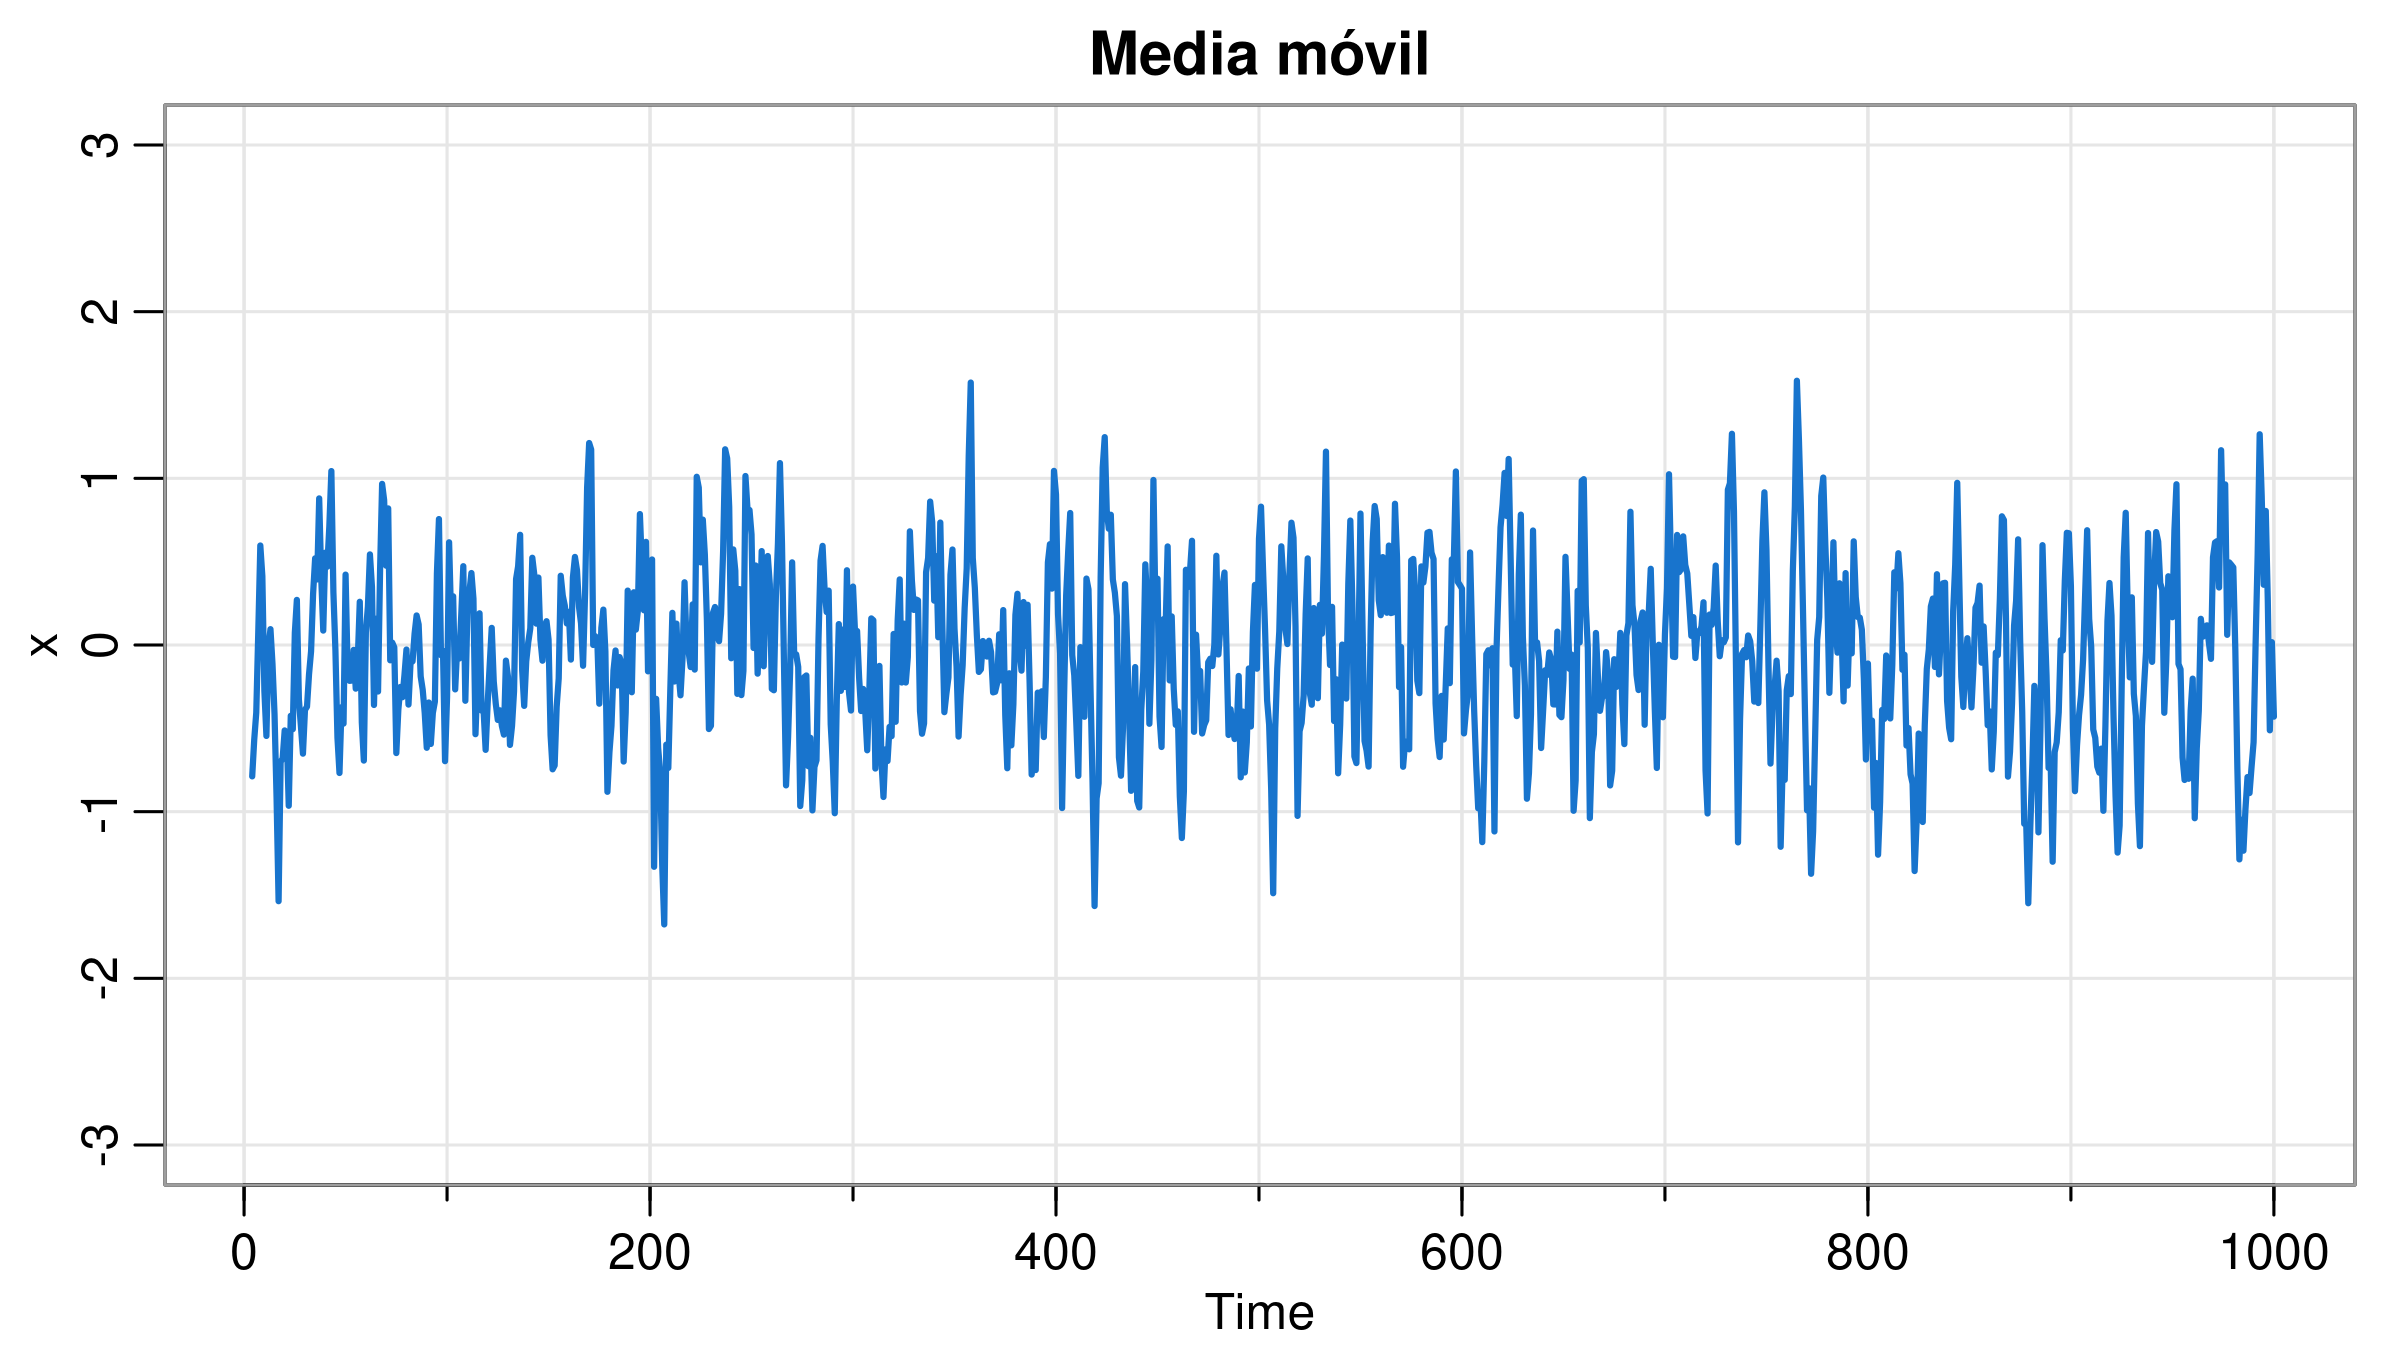

In [14]:
x = filter(w, sides=1, c(0.1,0.2,0.3,0.4))  # moving average
tsplot(x, ylim=c(-3,3), main="Media móvil", col=4,lwd=2)

### Ejemplo 3: Autorregresiones

Consideremos una serie $x_t$ donde el valor actual *depende explícitamente* de los valores anteriores ponderados, más un término de ruido o *innovación* independiente que ocurre en tiempo $t$.

Más explícitamente, $x_t$ se genera por ejemplo mediante la siguiente ecuación:

$$x_t = 0.9 x_{t-1} + w_t$$

A este proceso se le denomina *autorregresivo* de orden $1$.

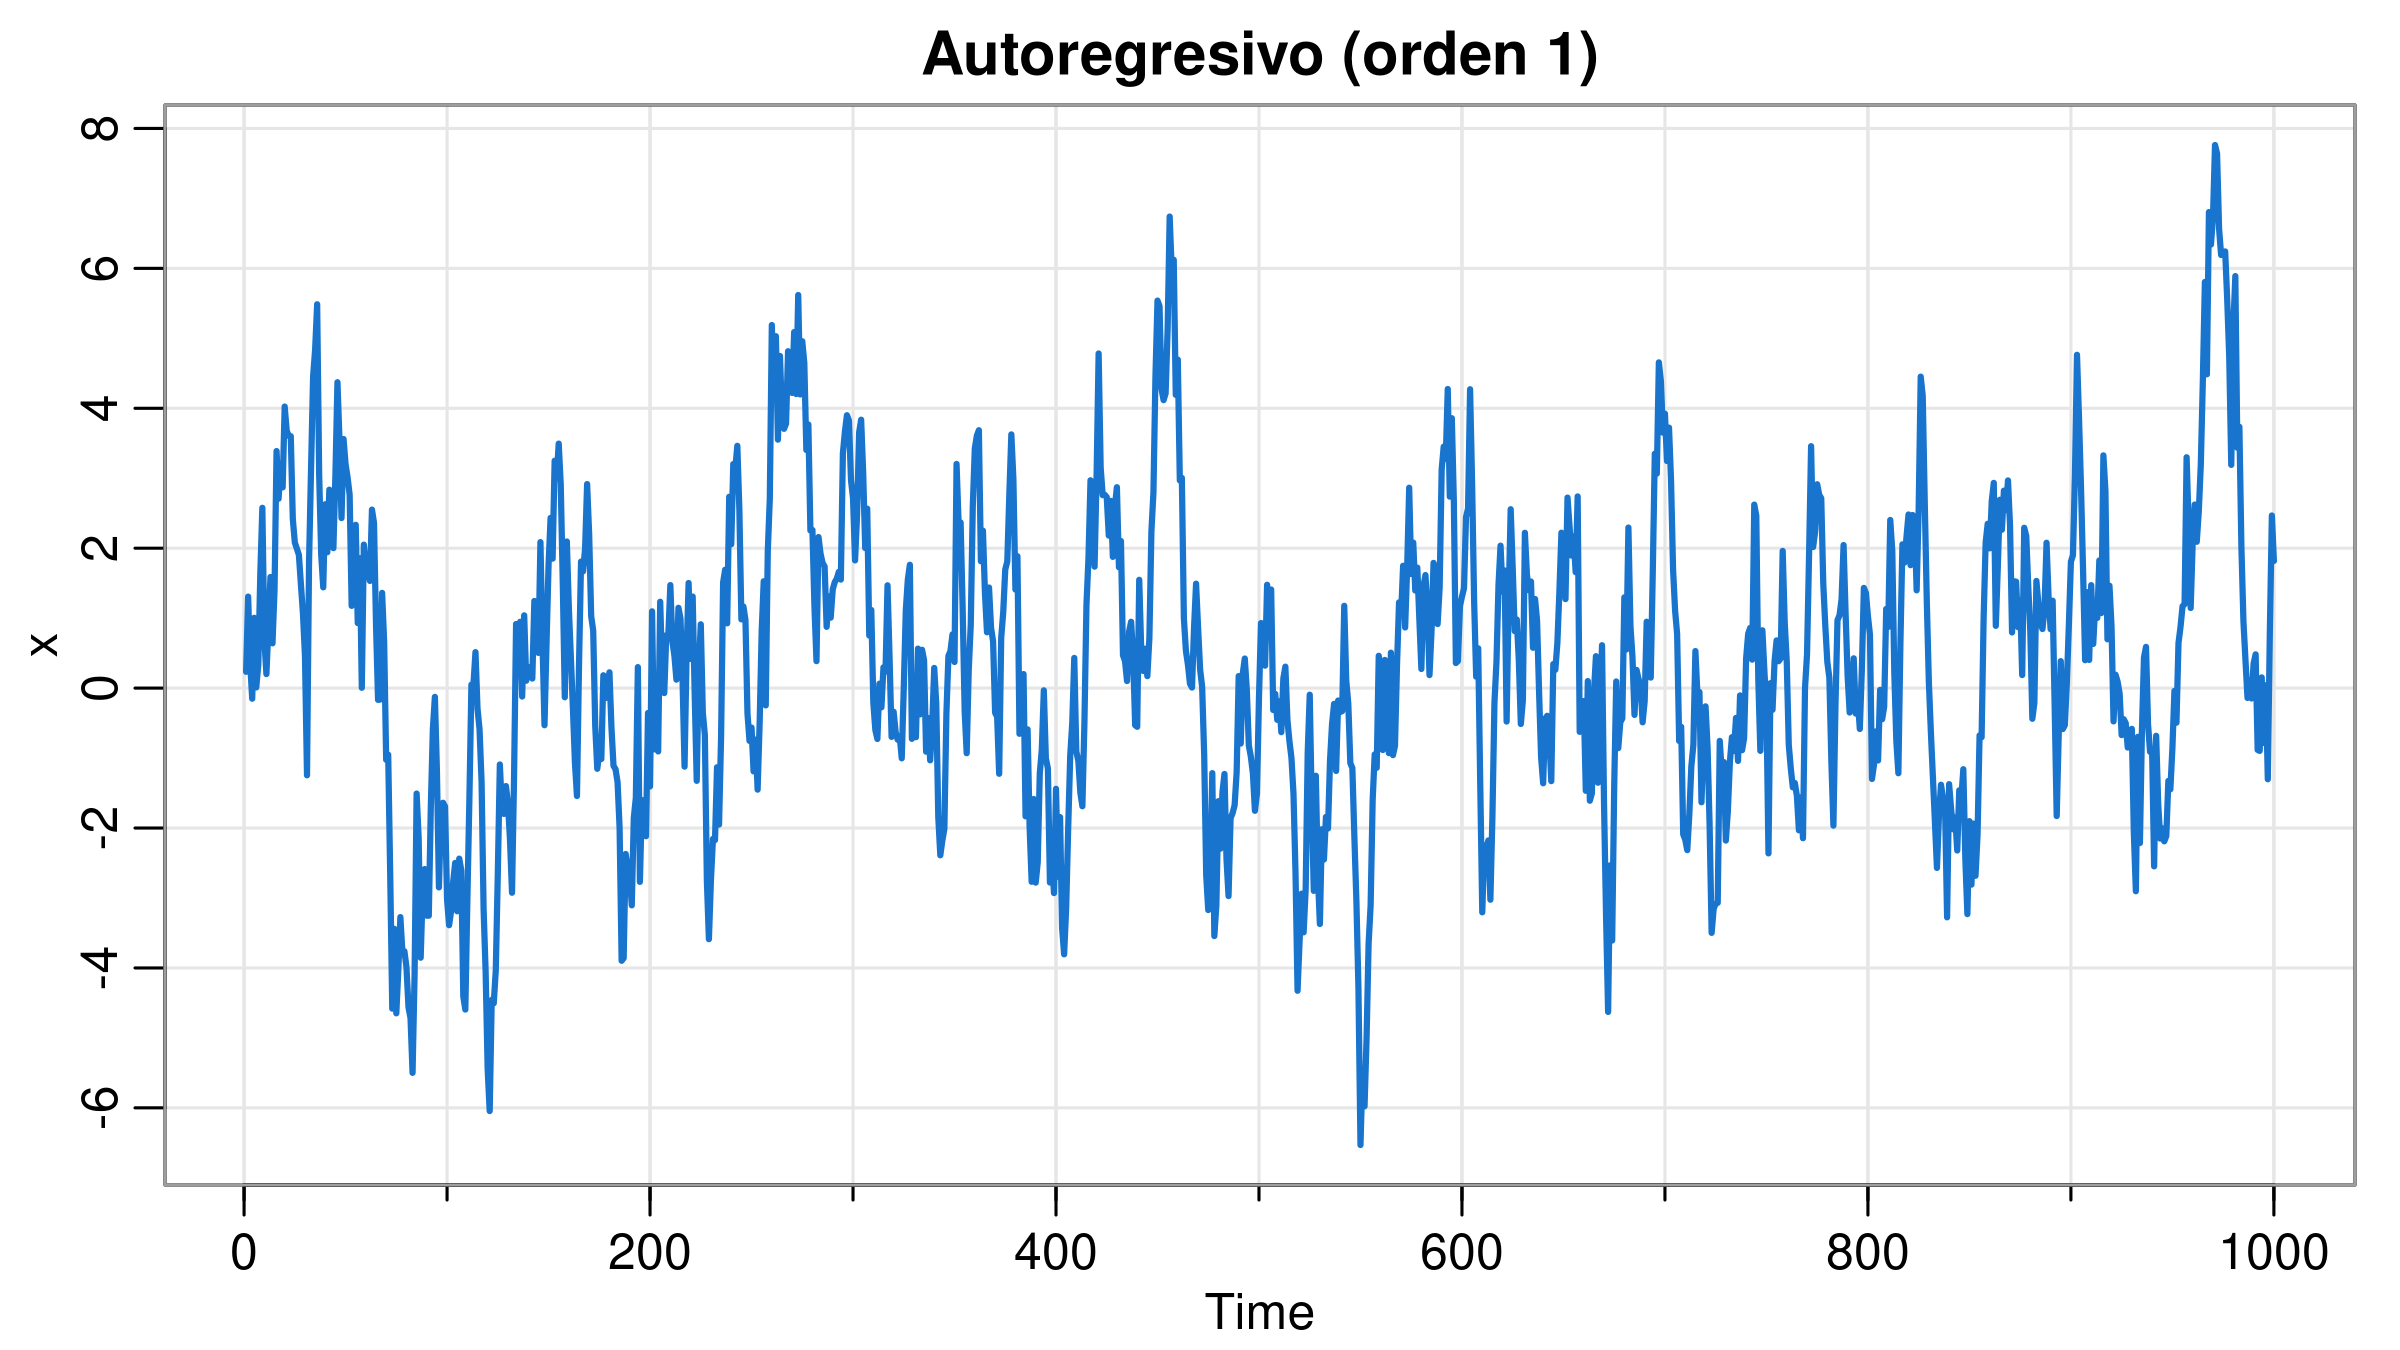

In [15]:
w = rnorm(1000,0,1)
x = filter(w, filter=c(.9), method="recursive") #recursivo aplica el filtro sobre los propios valores.
tsplot(x, main="Autoregresivo (orden 1)", lwd=2, col=4)

### Observaciones:

* El proceso $x_t$ presenta *inercia*, producto de la dependencia con los anteriores.

* Observemos que tenemos que definir las condiciones iniciales para la serie ($x_0$ y $x_{-1}$).

* También puede generarse usando el comando `filter` y el método `recursive`.

### Autorregresiones en general

El procedimiento anterior permite generar procesos sumamente ricos en su estructura. A mode de ejemplo, consideremos una serie $x_t$ que se genera a partir de ruido blanco $w_t$ mediante la siguiente ecuación:

$$ x_t = x_{t-1} - 0.9 x_{t-2} + w_t.$$

Este es un ejemplo de proceso *autorregresivo* de orden $2$.

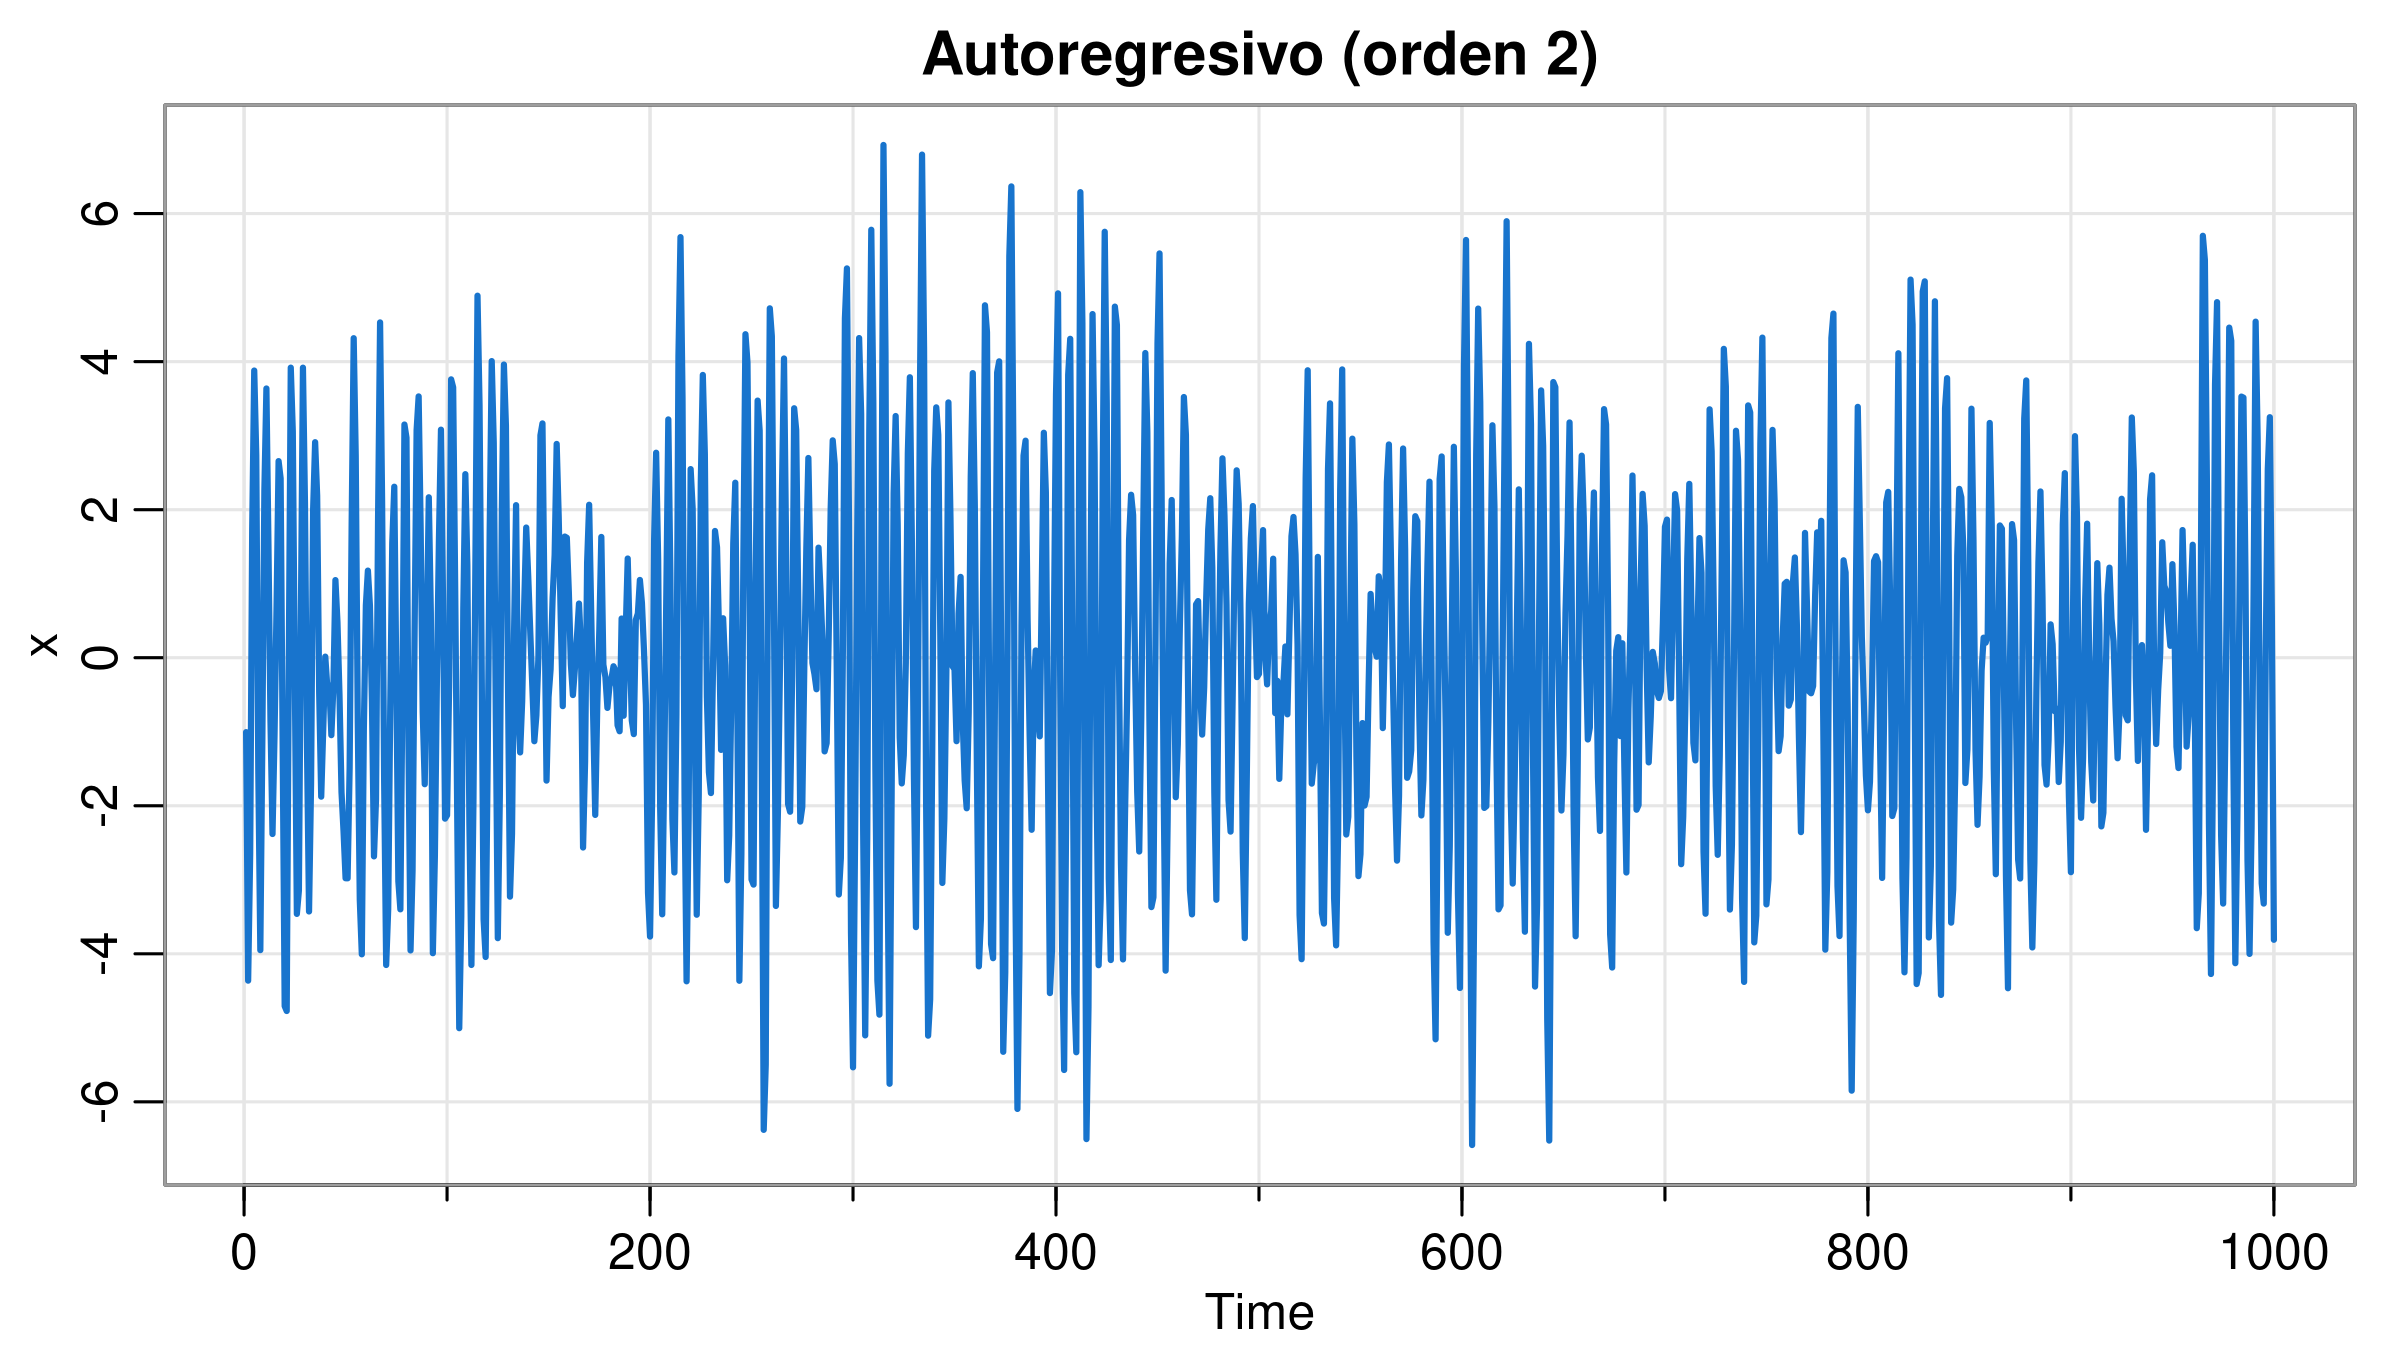

In [16]:
w = rnorm(1000,0,1)
x = filter(w, filter=c(1,-.9), method="recursive")
tsplot(x, main="Autoregresivo (orden 2)", lwd=2, col=4)

### Observaciones:

* En este caso, el proceso $x_t$ presenta *oscilaciones*, producto de la estructura de dependencia con los valores anteriores.

* Pruebe cambiar los coeficientes para ver los posibles comportamientos.

### Ejemplo 4: Paseo al azar con deriva.

Consideremos una señal $x_t$ que se genera a partir de ruido blanco $w_t$ mediante la siguiente ecuación:

$$ x_t = \delta + x_{t-1} + w_t.$$

Es un paseo al azar con deriva: $\delta$ es la magnitud de la deriva. Observemos que el proceso va acumulando los ruidos anteriores. 

$$ x_t = \delta + x_{t-1} + w_t = \delta + (\delta + x_{t-2}+w_{t-1}) + w_t = 2\delta + w_{t-1} + w_t$$

y así sucesivamente.

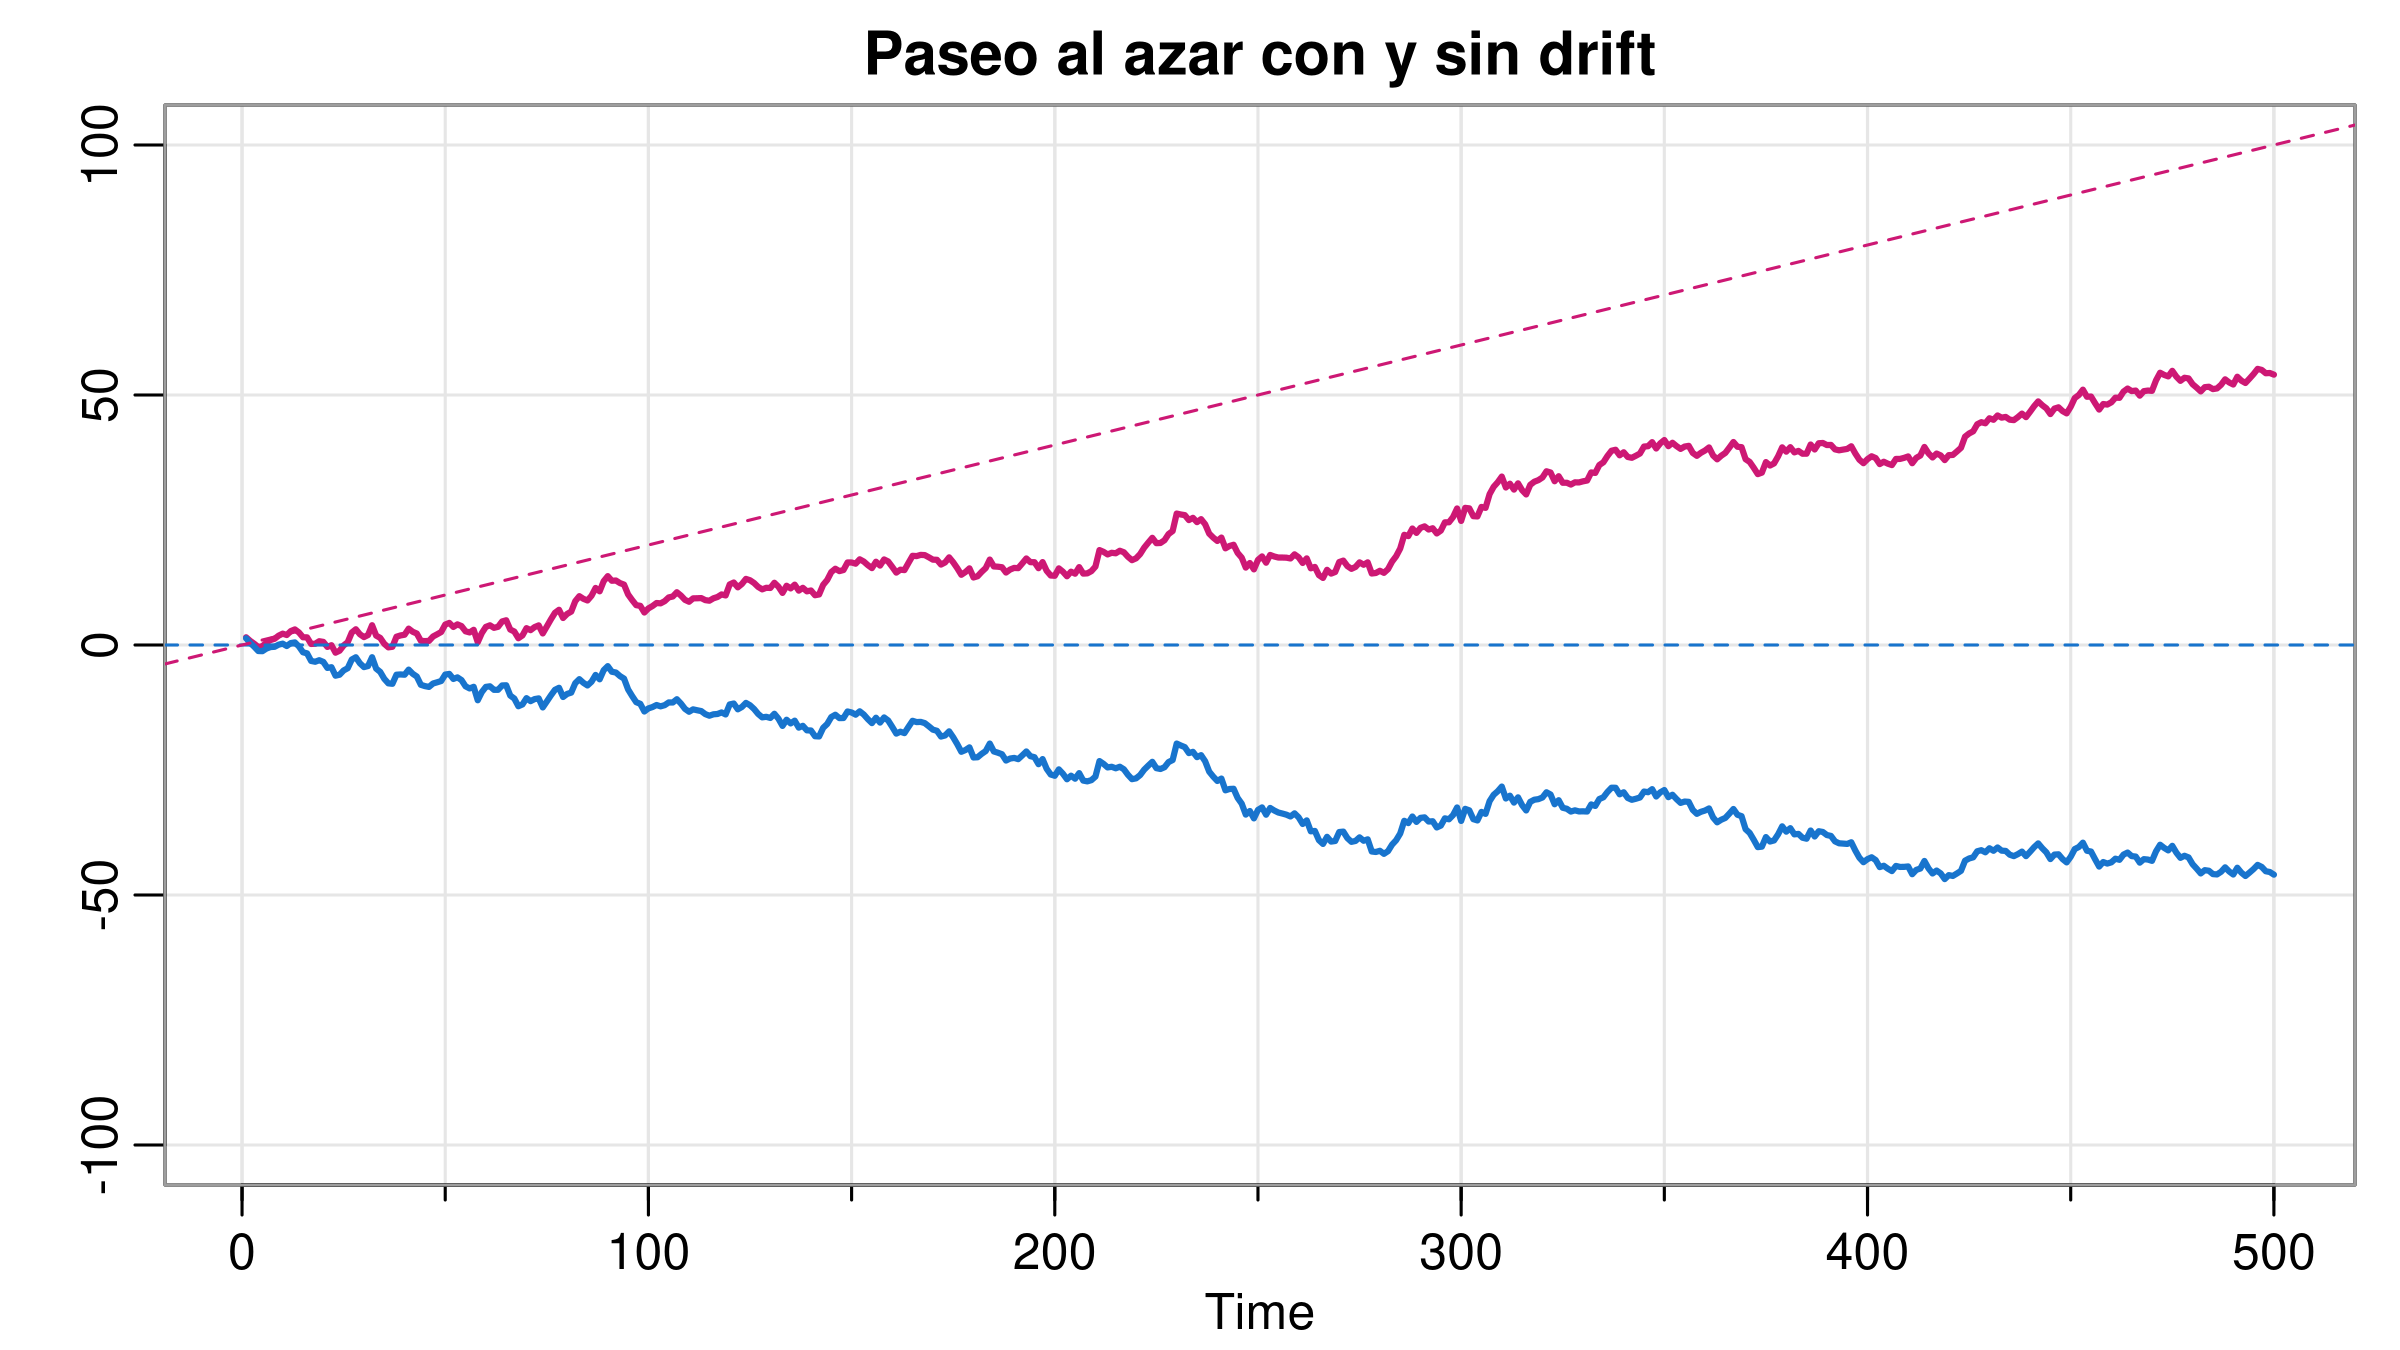

In [17]:
w = rnorm(500,0,1)  #Genero la serie w
x = cumsum(w)   #Al acumular w obtengo x para delta=0

delta = 0.2
wd = w + delta  #Ahora sumo delta en cada paso
xd = cumsum(wd) #y acumulo

tsplot(xd, ylim=c(-100,100), main="Paseo al azar con y sin drift", ylab='', lwd=2, col=6)
lines(x, lwd=2, col=4) 
abline(h=0, col=4, lty=2)
abline(a=0, b=delta, lty=2, col=6)

### Observaciones:

El proceso no es estacionario!

 * Si la deriva es distinta de 0, esto es obvio. El valor medio de la señal va creciendo (o decreciendo) indefinidamente.
 
 * Si la deriva es 0, de todos modos la varianza va aumentando a medida que acumulamos más y más instancias del ruido.
 
 * Para ver esto último, simulemos varias realizaciones del proceso.
 

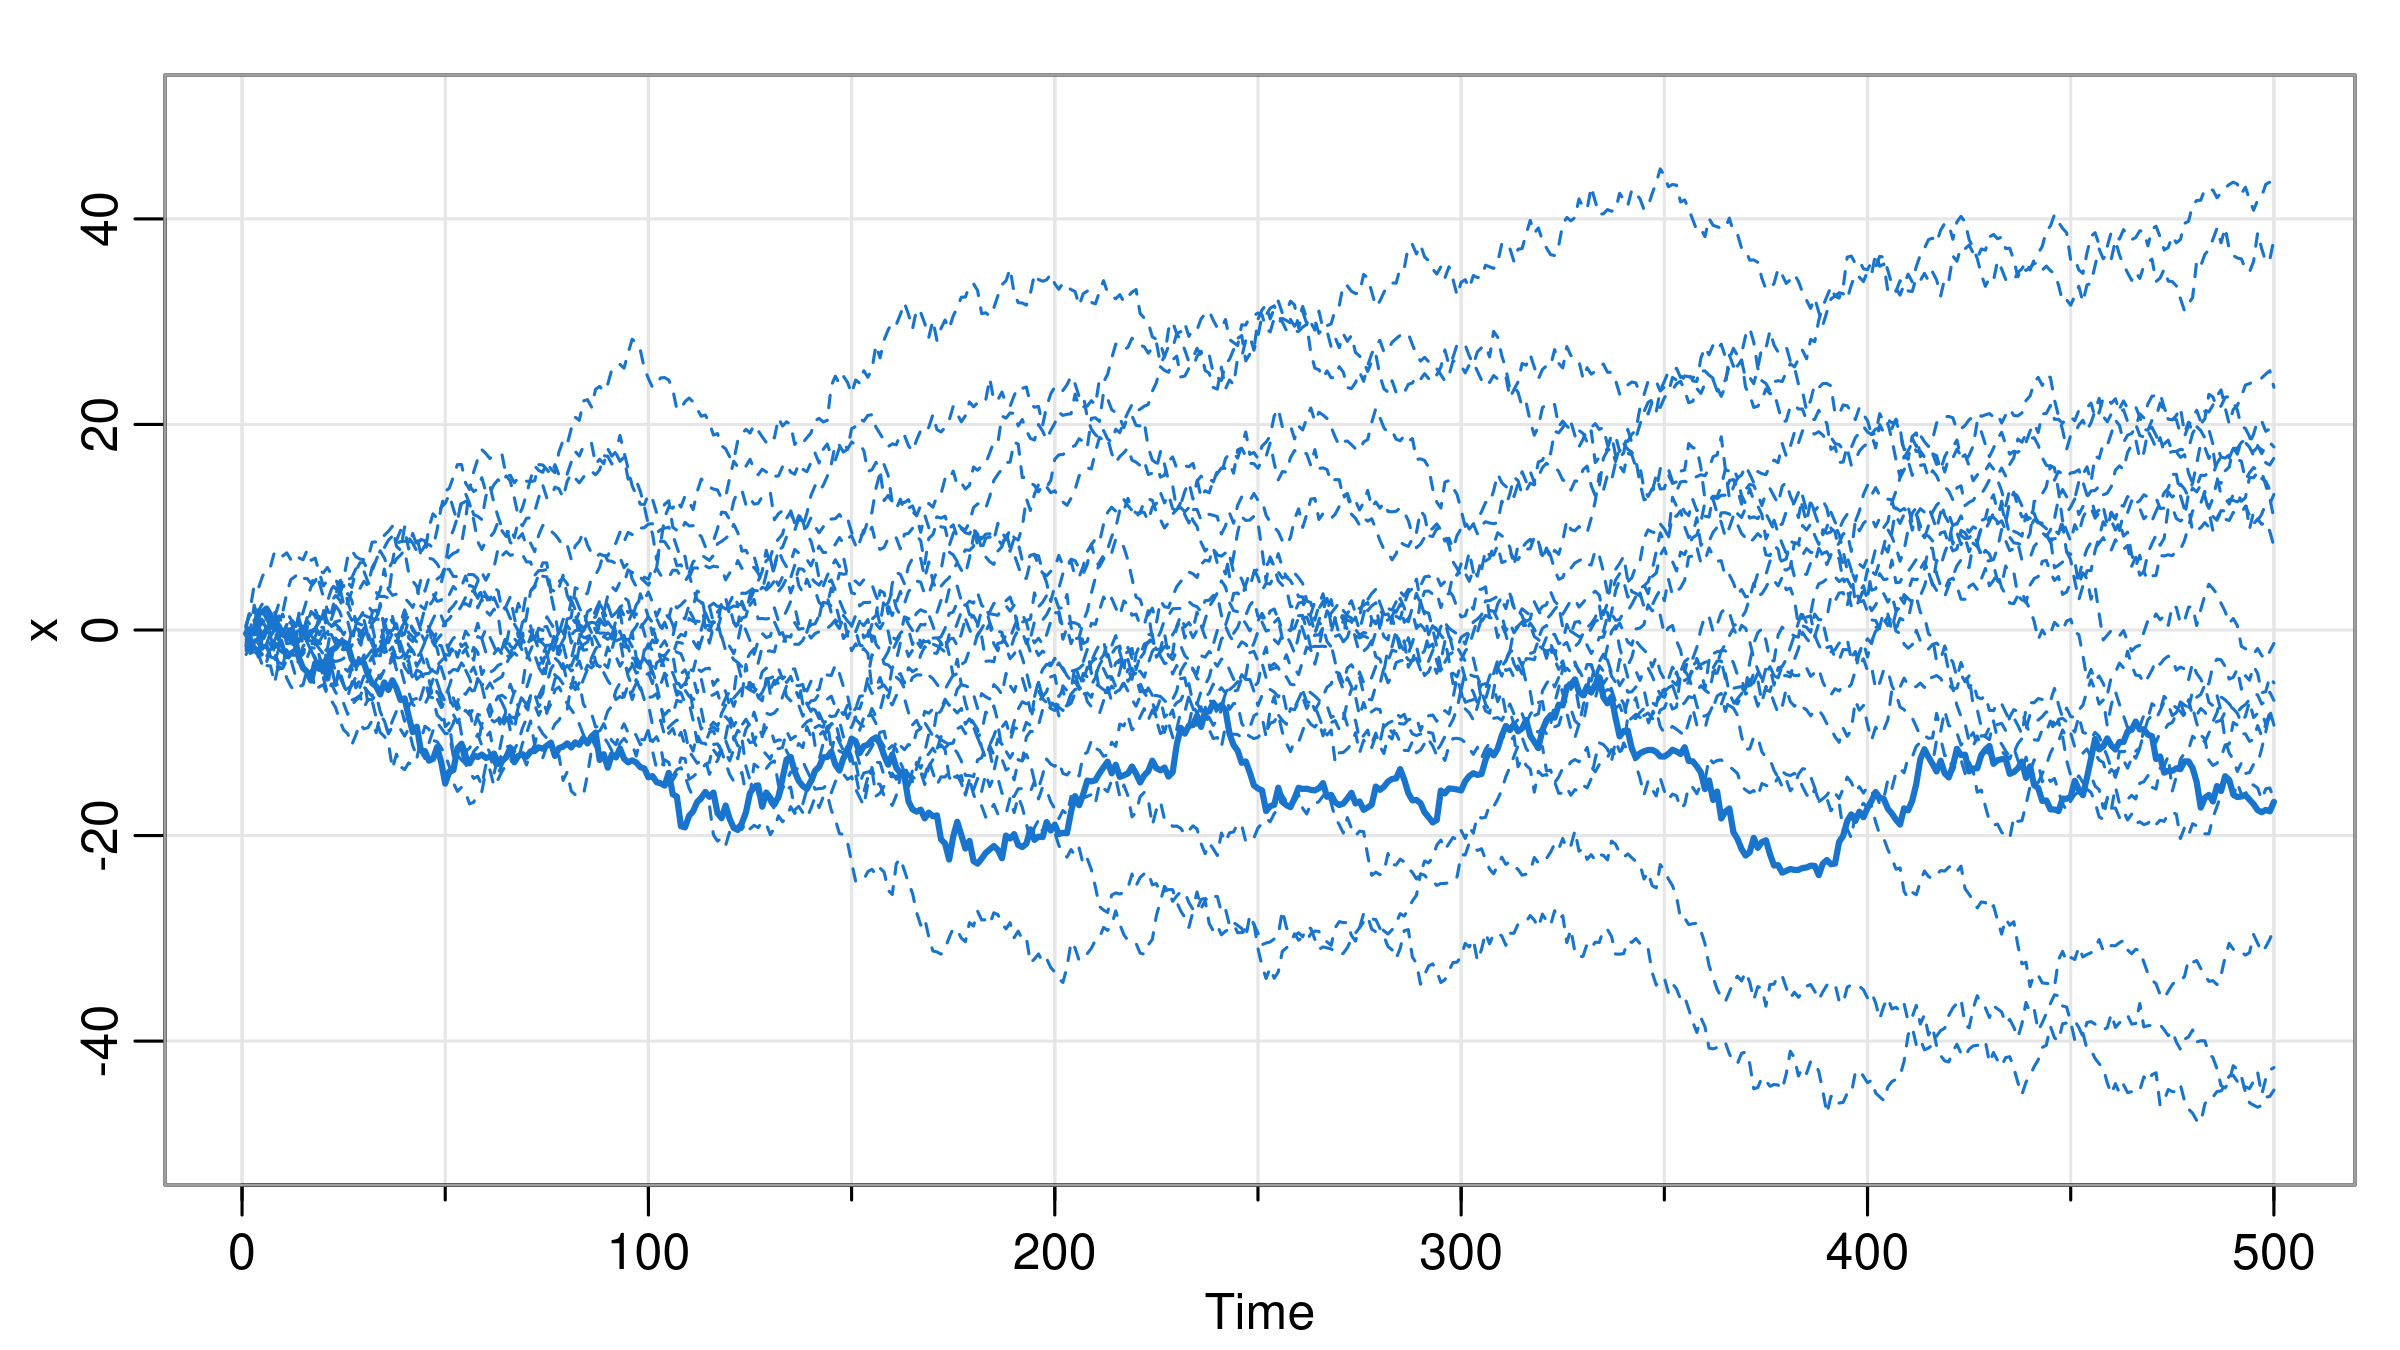

In [18]:
w = rnorm(500,0,1)
x = cumsum(w)

tsplot(x,lwd=2,col=4, ylim=c(-50,50))

for (i in 1:20) {
    w = rnorm(500,0,1)
    x = cumsum(w)
    lines(x,lty=2,col=4)
}

### Incrementos de un paseo al azar

Si consideramos los *incrementos* del proceso, estos sí son estacionarios:

$$y_t = x_t - x_{t-1} = \delta + x_{t-1} + w_t - x_{t-1} = \delta + w_t$$

Es decir, si aplicamos la transformación $x_t \mapsto y_t = x_t - x_{t-1} = \nabla x_t$, obtenemos ruido blanco (más una media $\delta$ que marca la tendencia).

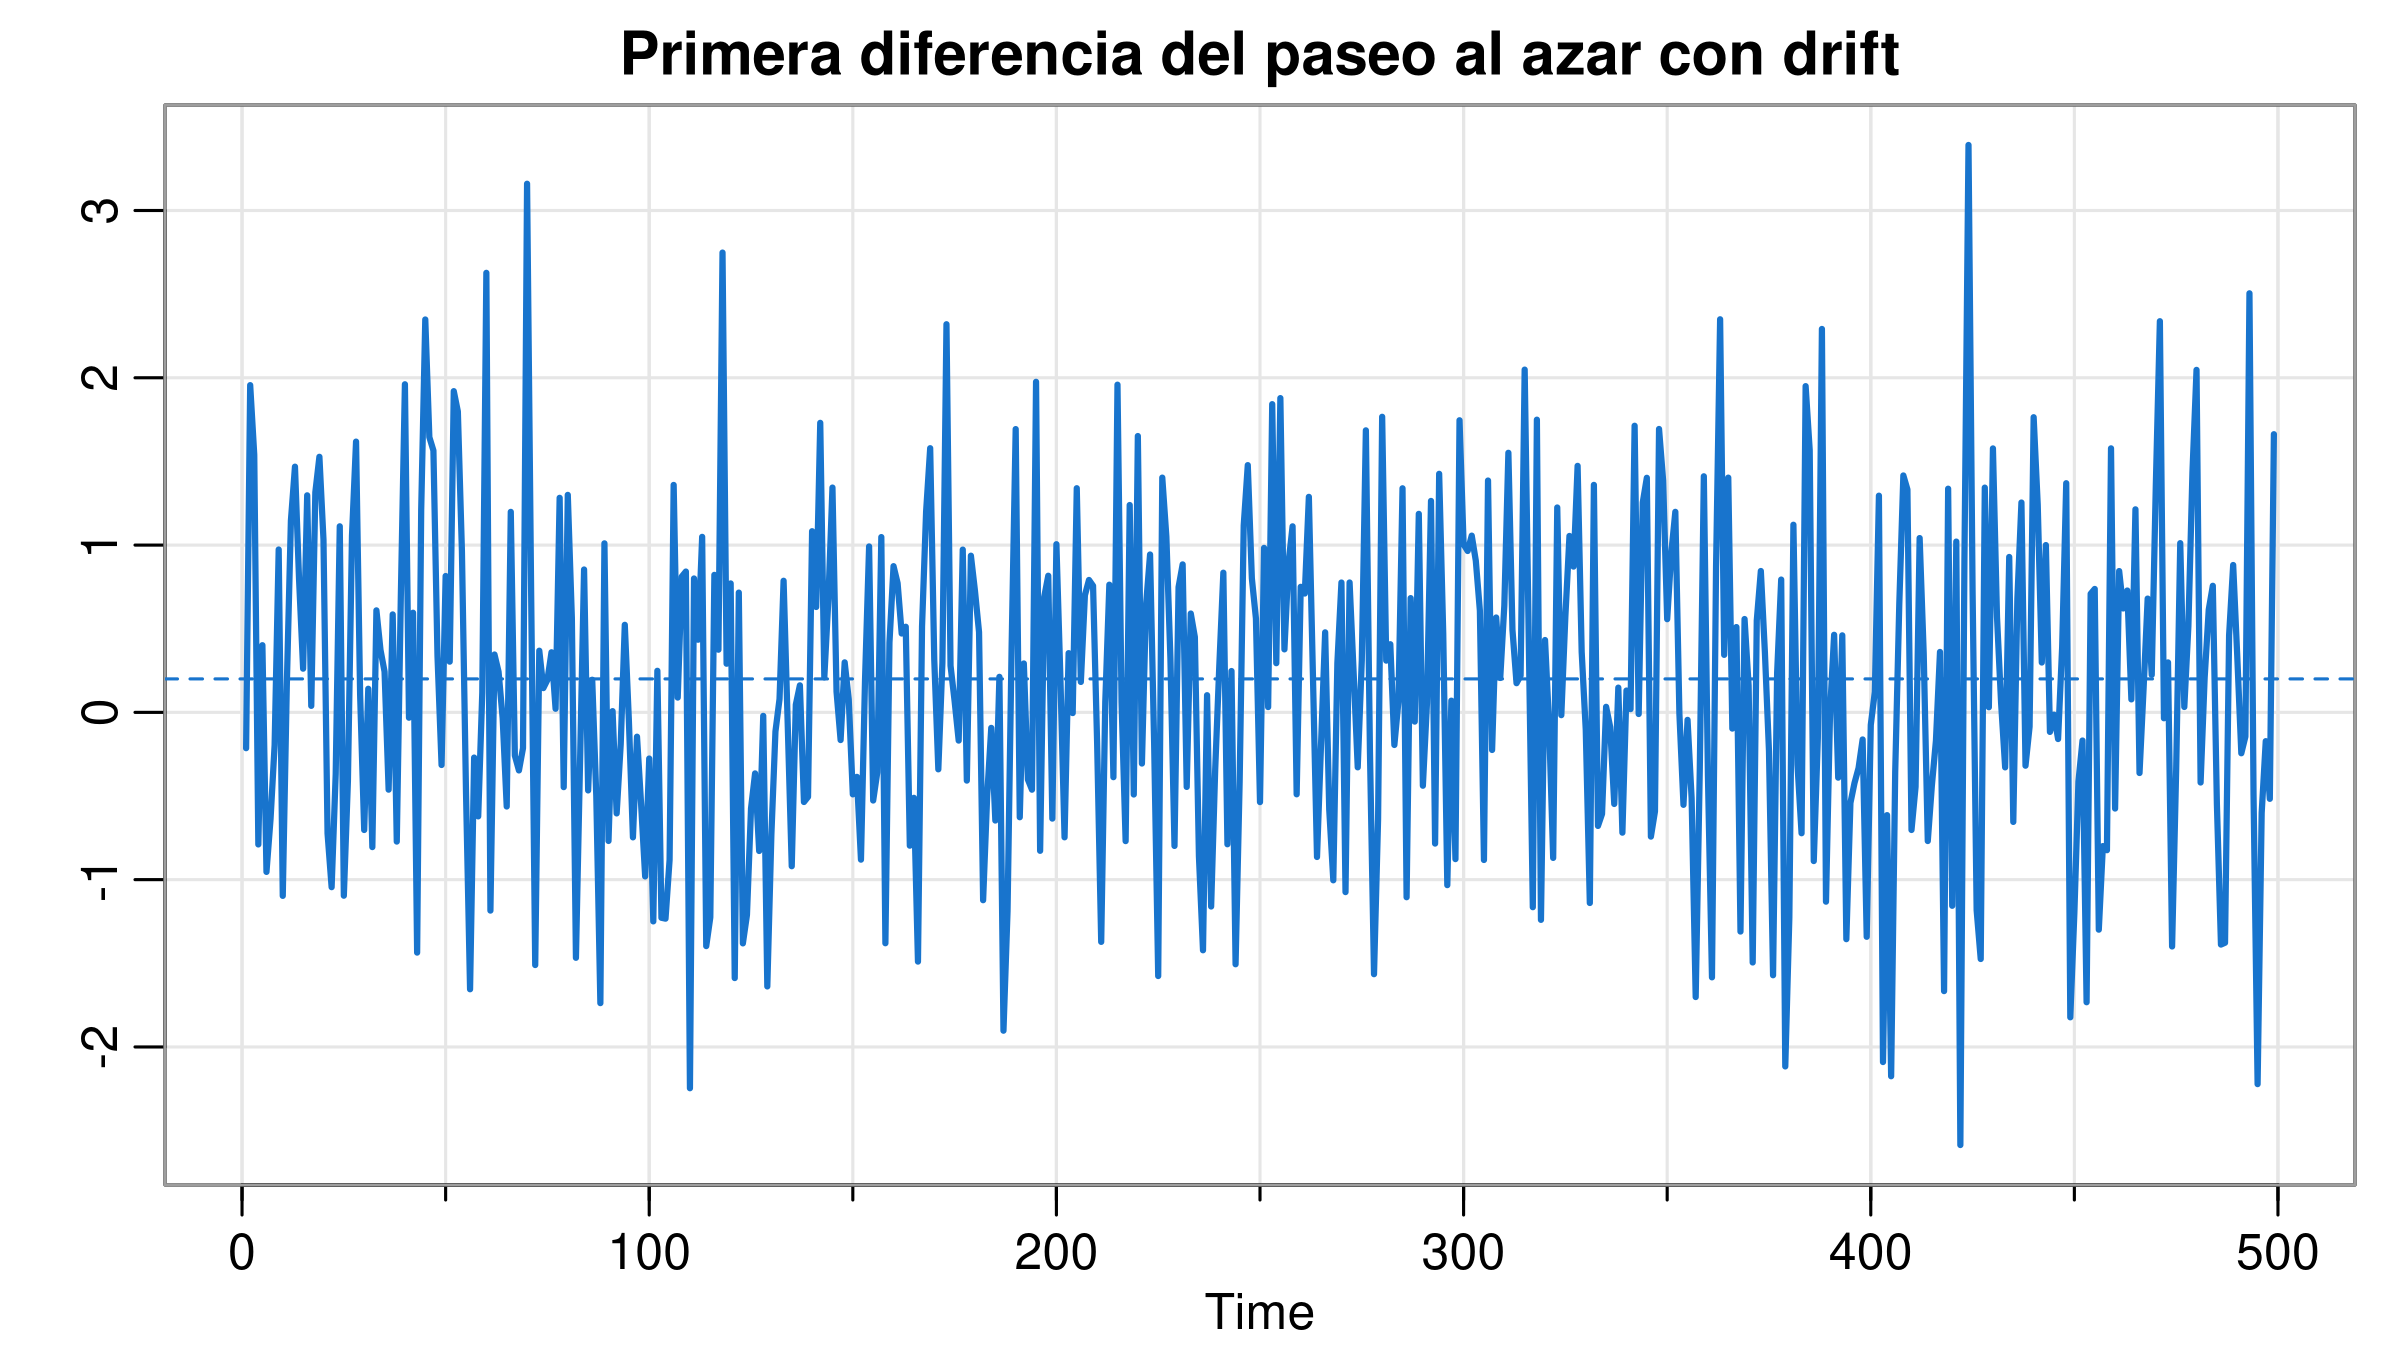

In [19]:
w = rnorm(500,0,1)  #Genero la serie w
x = cumsum(delta + w)   #Al acumular delta+w obtengo x
y = diff(x)  #el comando diff aplica la transformación

tsplot(y, main="Primera diferencia del paseo al azar con drift", ylab='', lwd=2, col=4)
abline(h=delta, col=4, lty=2)

### Ejemplo 5: Señal y ruido

Se tiene la señal:

$$ x_t = s_t + w_t$$

Siendo $s_t$ la siguiente:

$$s_t = 2\cos\left(2\pi\frac{t+15}{50}\right).$$

Aquí:

 * El $2$ multiplicando representa la *amplitud* de la señal.
 * El $1/50$ dentro del coseno es la *frecuencia*. En este caso, lleva 50 unidades de tiempo completar un ciclo.
 * El $15$ indica la *fase*, es decir, dónde se encuentran los picos. Como $\cos(2\pi n) = 1$, esta señal tendría un pico en $t=-15$ ($\cos(0)$) y luego cada $50$ unidades, por lo que el primer pico visible está en $t=35$ ($\cos(2\pi)$).

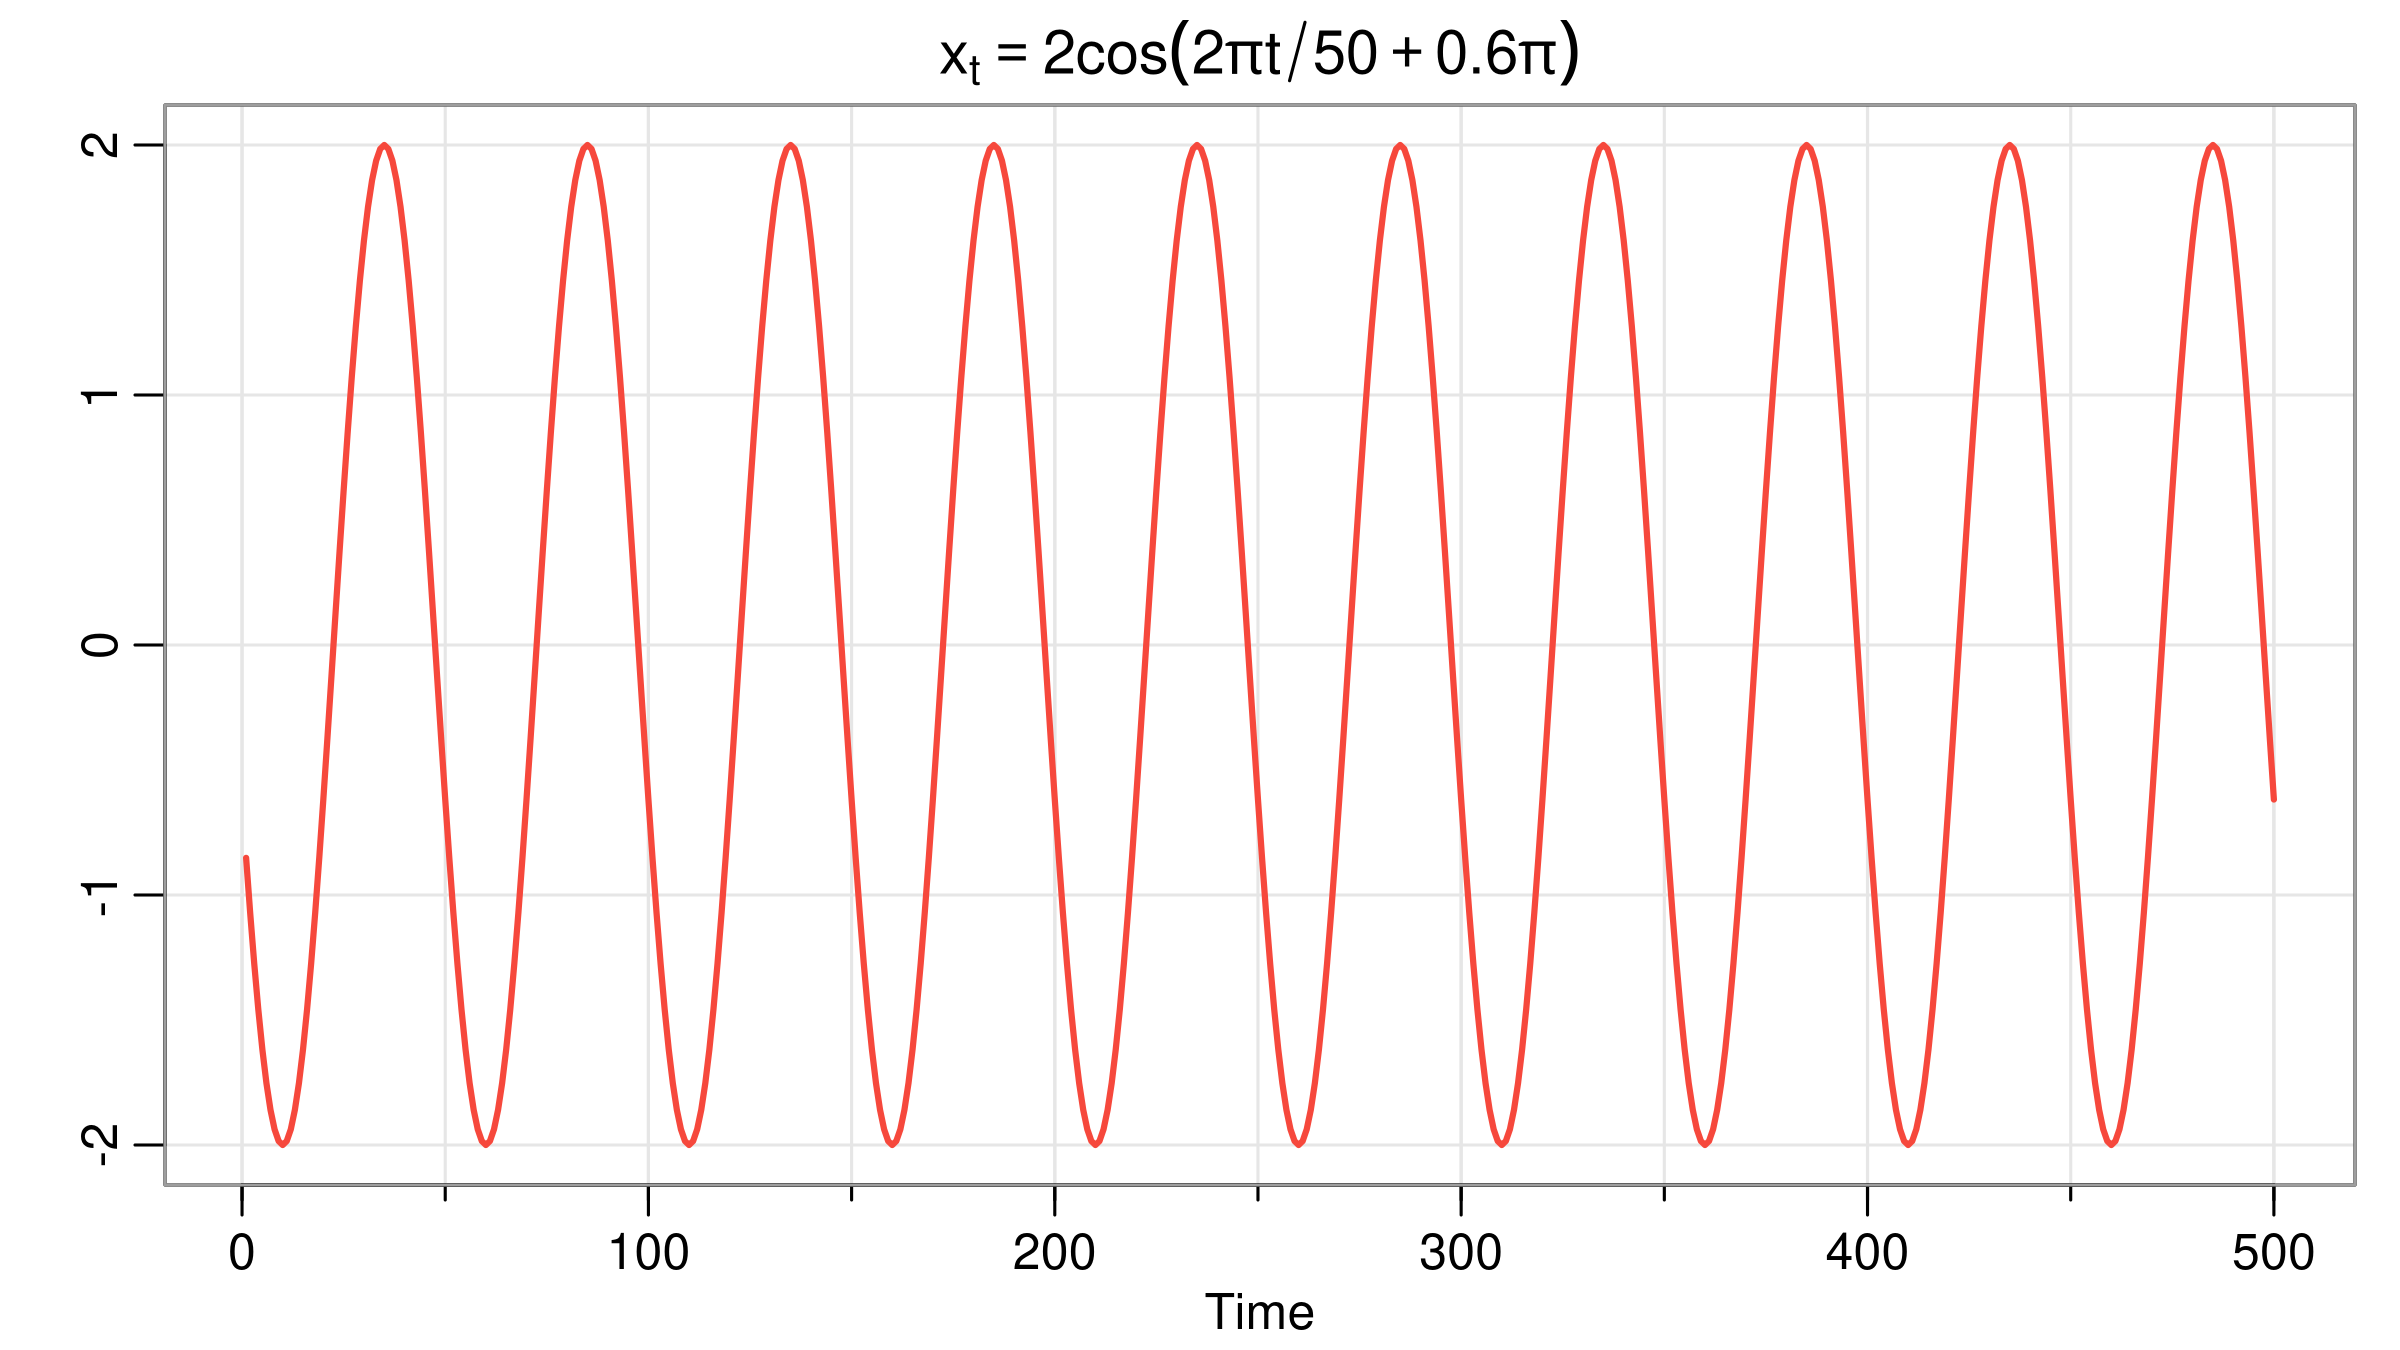

In [20]:
t = (1:500)
s = 2*cos(2*pi*(t+15)/50)
tsplot(s, ylab="", main = expression(x[t]==2*cos(2*pi*t/50+.6*pi)), lwd=2, col=2)

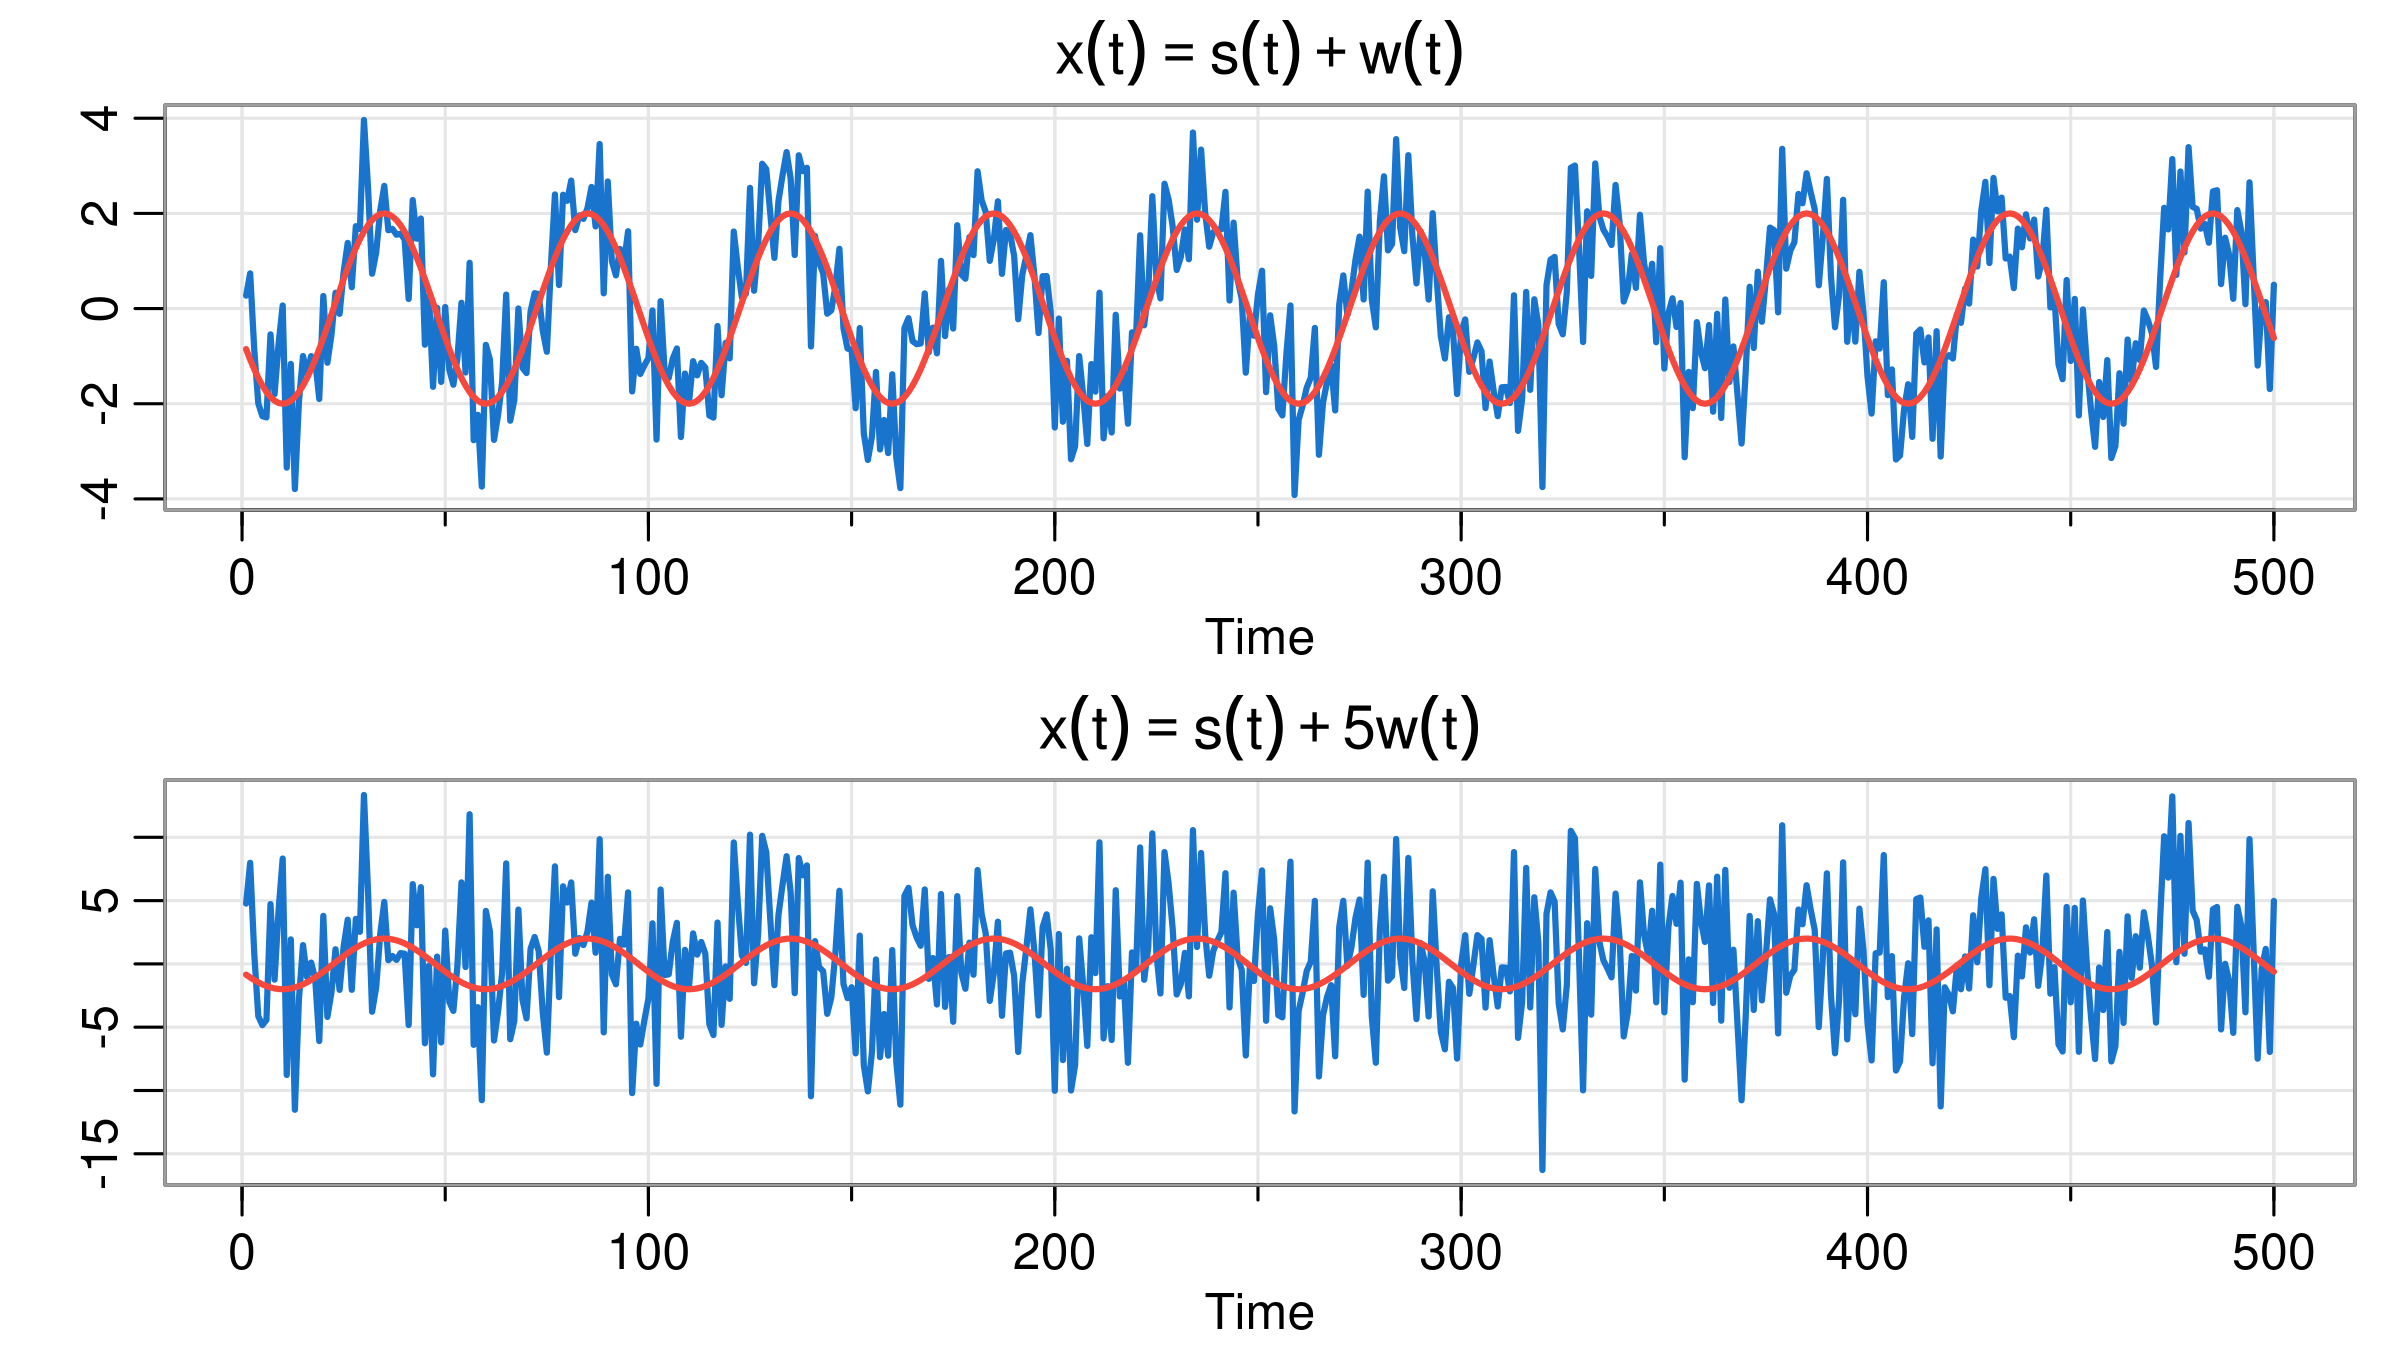

In [21]:
w = rnorm(500,0,1) ## genero ruido blanco

par(mfrow=c(2,1), mar=c(3,2,2,1), cex.main=1.5)   # help(par) for info

#sumamos ruido blanco de varianza 1
tsplot(s + w, ylab="", main = expression(x(t)==s(t)+w(t)), lwd=2, col=4)
lines(s, ylab="", lwd=2, col=2)

tsplot(s + 5*w, ylab="", main = expression(x(t)==s(t)+5*w(t)), lwd=2, col=4)
lines(s, ylab="", lwd=2, col=2)

### Observaciones

En este caso, la varianza del ruido determina cuánto podemos recuperar de la señal original. Se habla de "relación señal a ruido". Cuanto más potente el ruido, menos podemos recuperar o identificar la señal original.

### Ejemplo 6: proceso geométrico

Supongamos que tenemos una magnitud que crece *porcentualmente*. Por ejemplo, en economía, muchas magnitudes crecen un cierto porcentaje de su valor anterior:

$$s_t = (1+\theta)s_{t-1}$$

Por ejemplo, si $\theta=0.05$, crece un $5\%$ por unidad de tiempo.

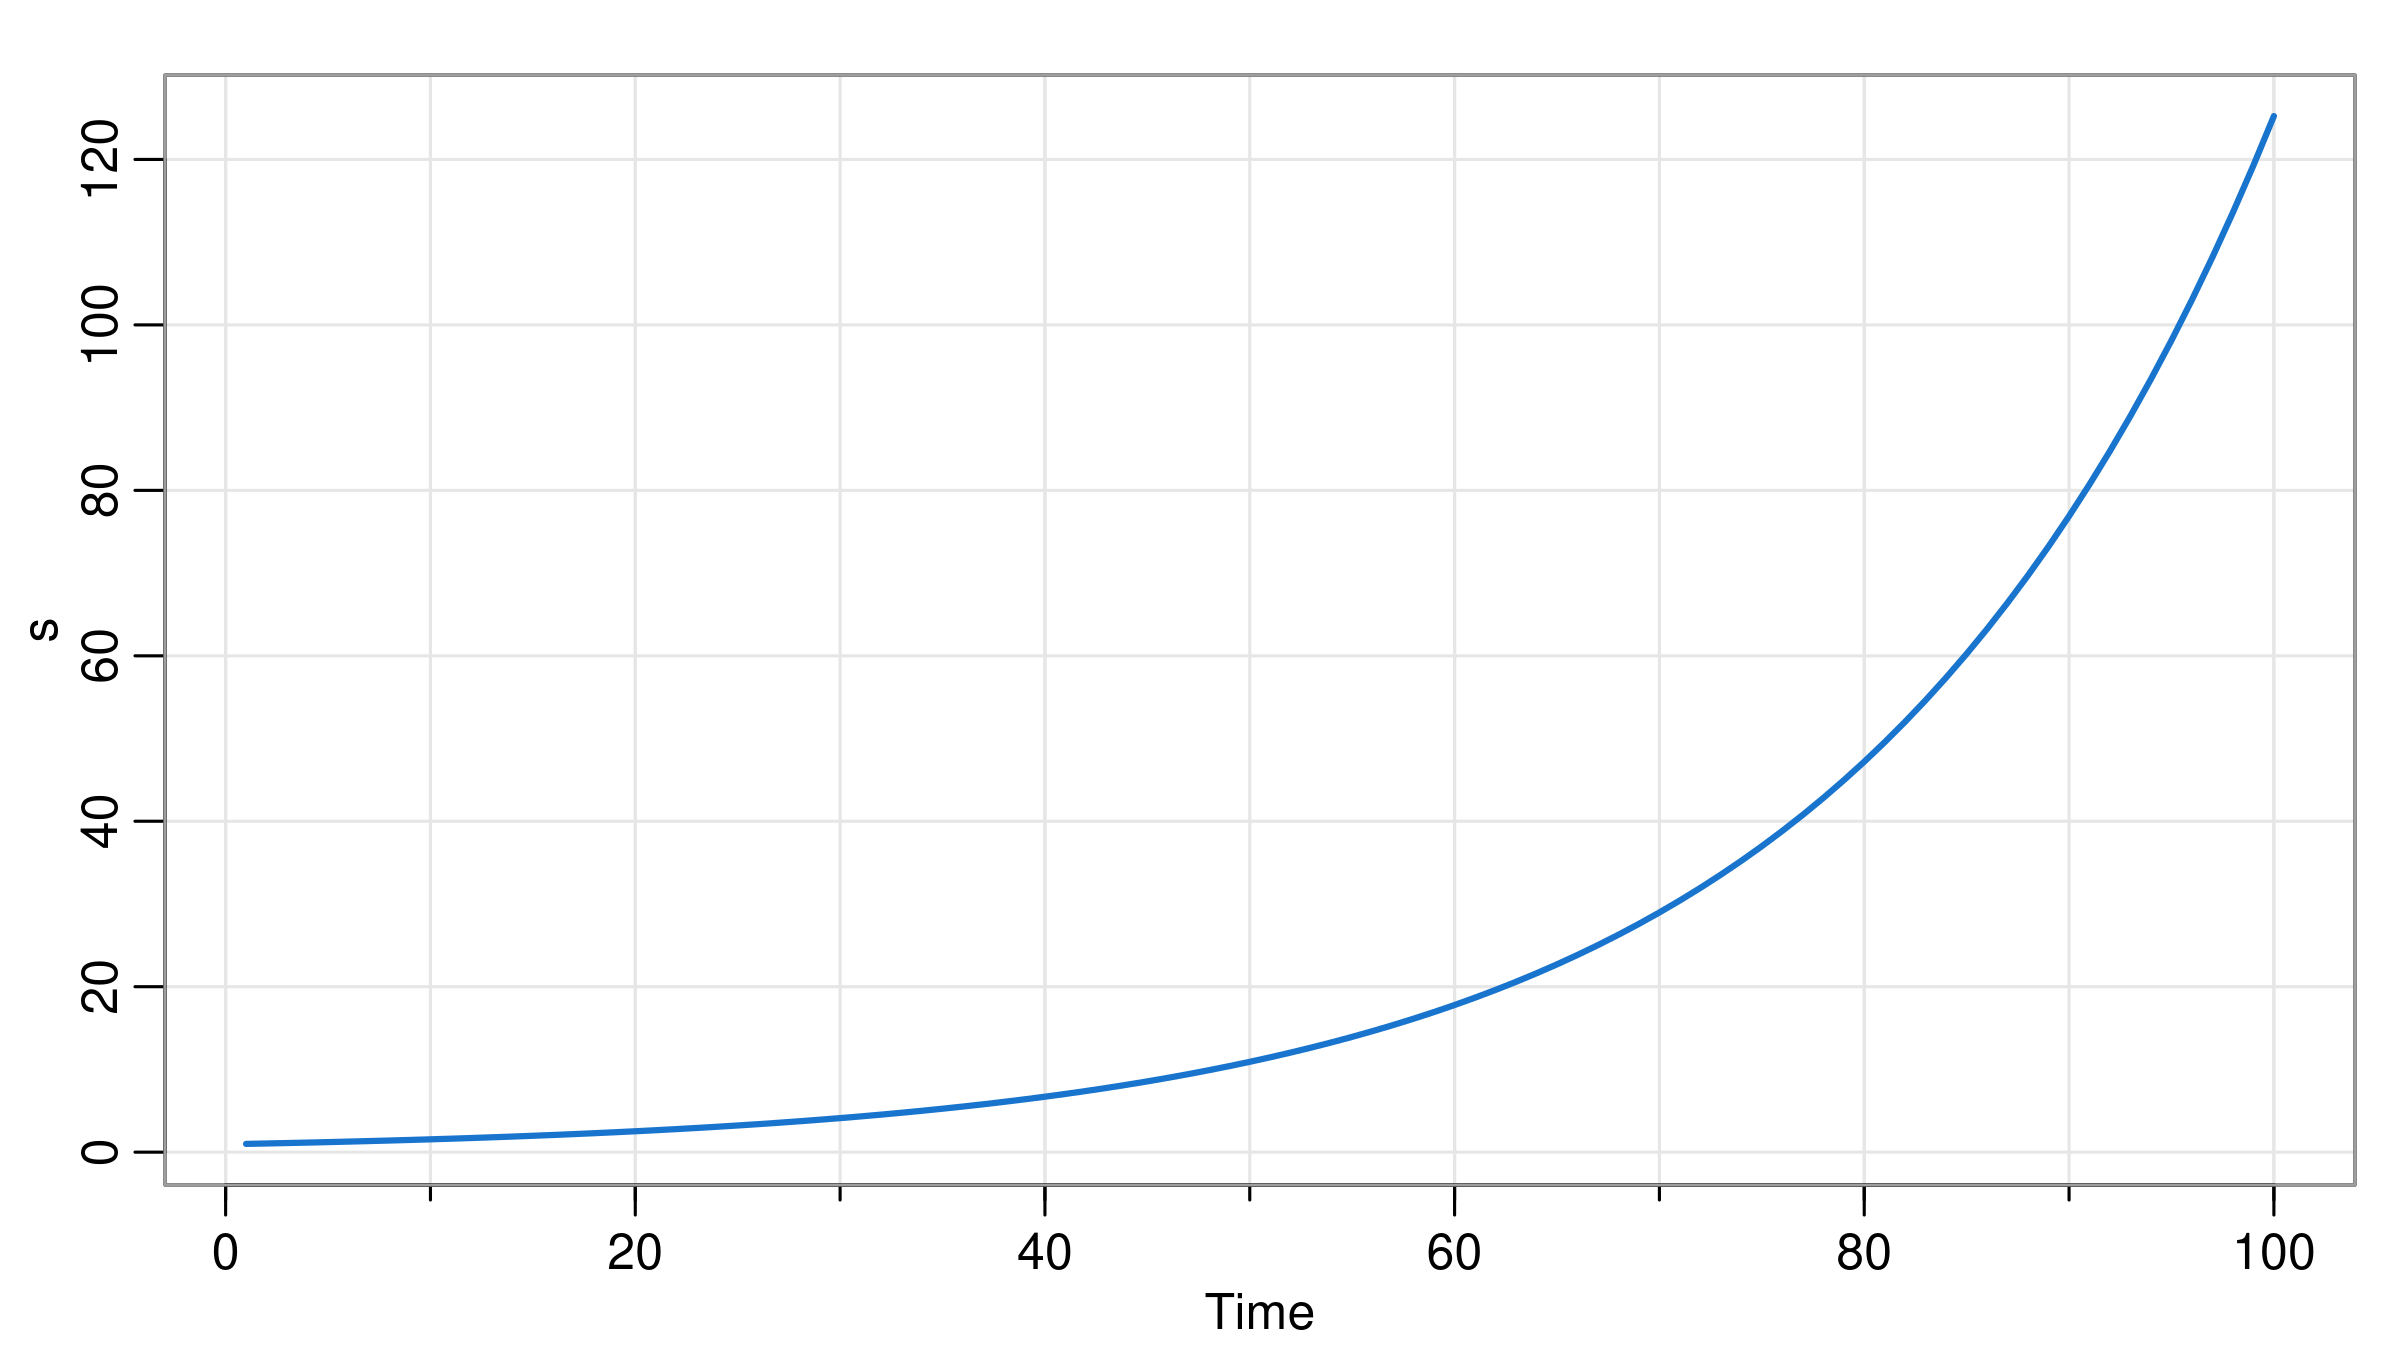

In [22]:
s=1 ##inicializo el primer valor
theta = 0.05
for (i in (2:100)){
    s[i] = (1+theta)*s[i-1]
}

tsplot(s, lwd=2, col=4)

En este caso la transformación $s\mapsto \log(s)$ convierte la tendencia en lineal:

$$s'_t = \log(s_t) = \log((1+\theta)s_{t-1}) = \log(1+\theta) + \log(s_{t-1}) = \log(1+\theta) + s'_{t-1}.$$ 

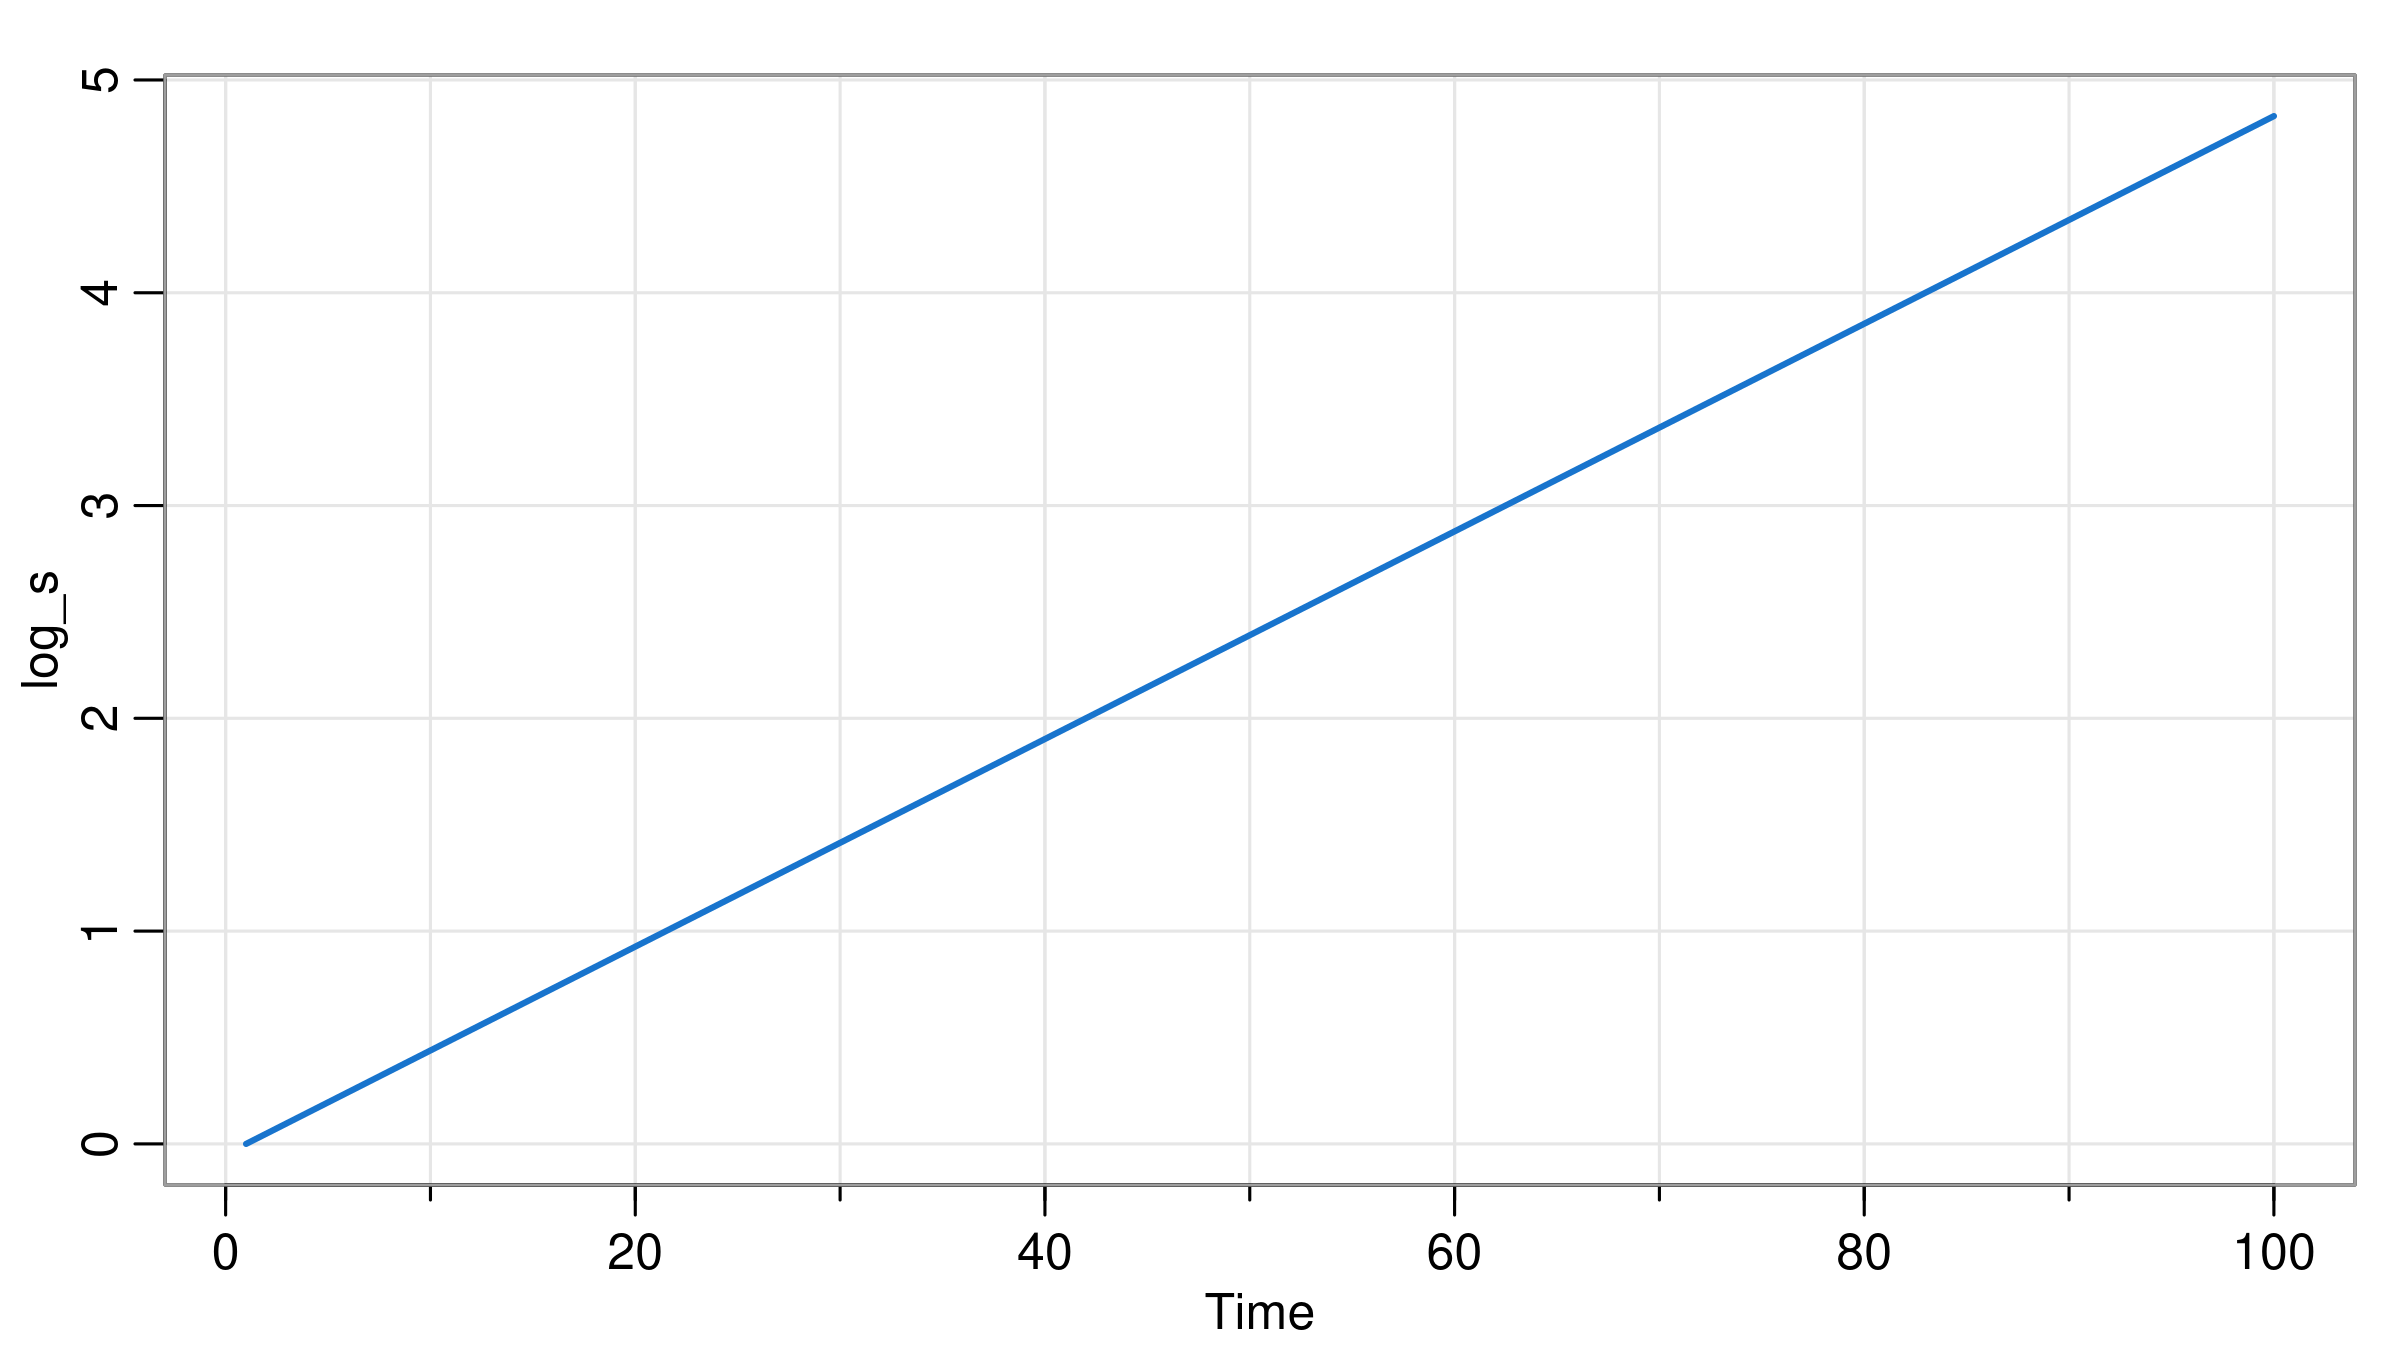

In [23]:
log_s = log(s)
tsplot(log_s, lwd=2, col=4)

Supongamos ahora que podemos asumir que existe ruido en el incremento, es decir:

$$x'_t = \log(x_t) = \log(1+\theta) + x'_{t-1} + w_t.$$

con $w_t$ ruido blanco Gaussiano. ¿Cómo se ve este proceso? ¿Cómo se ve el proceso original?

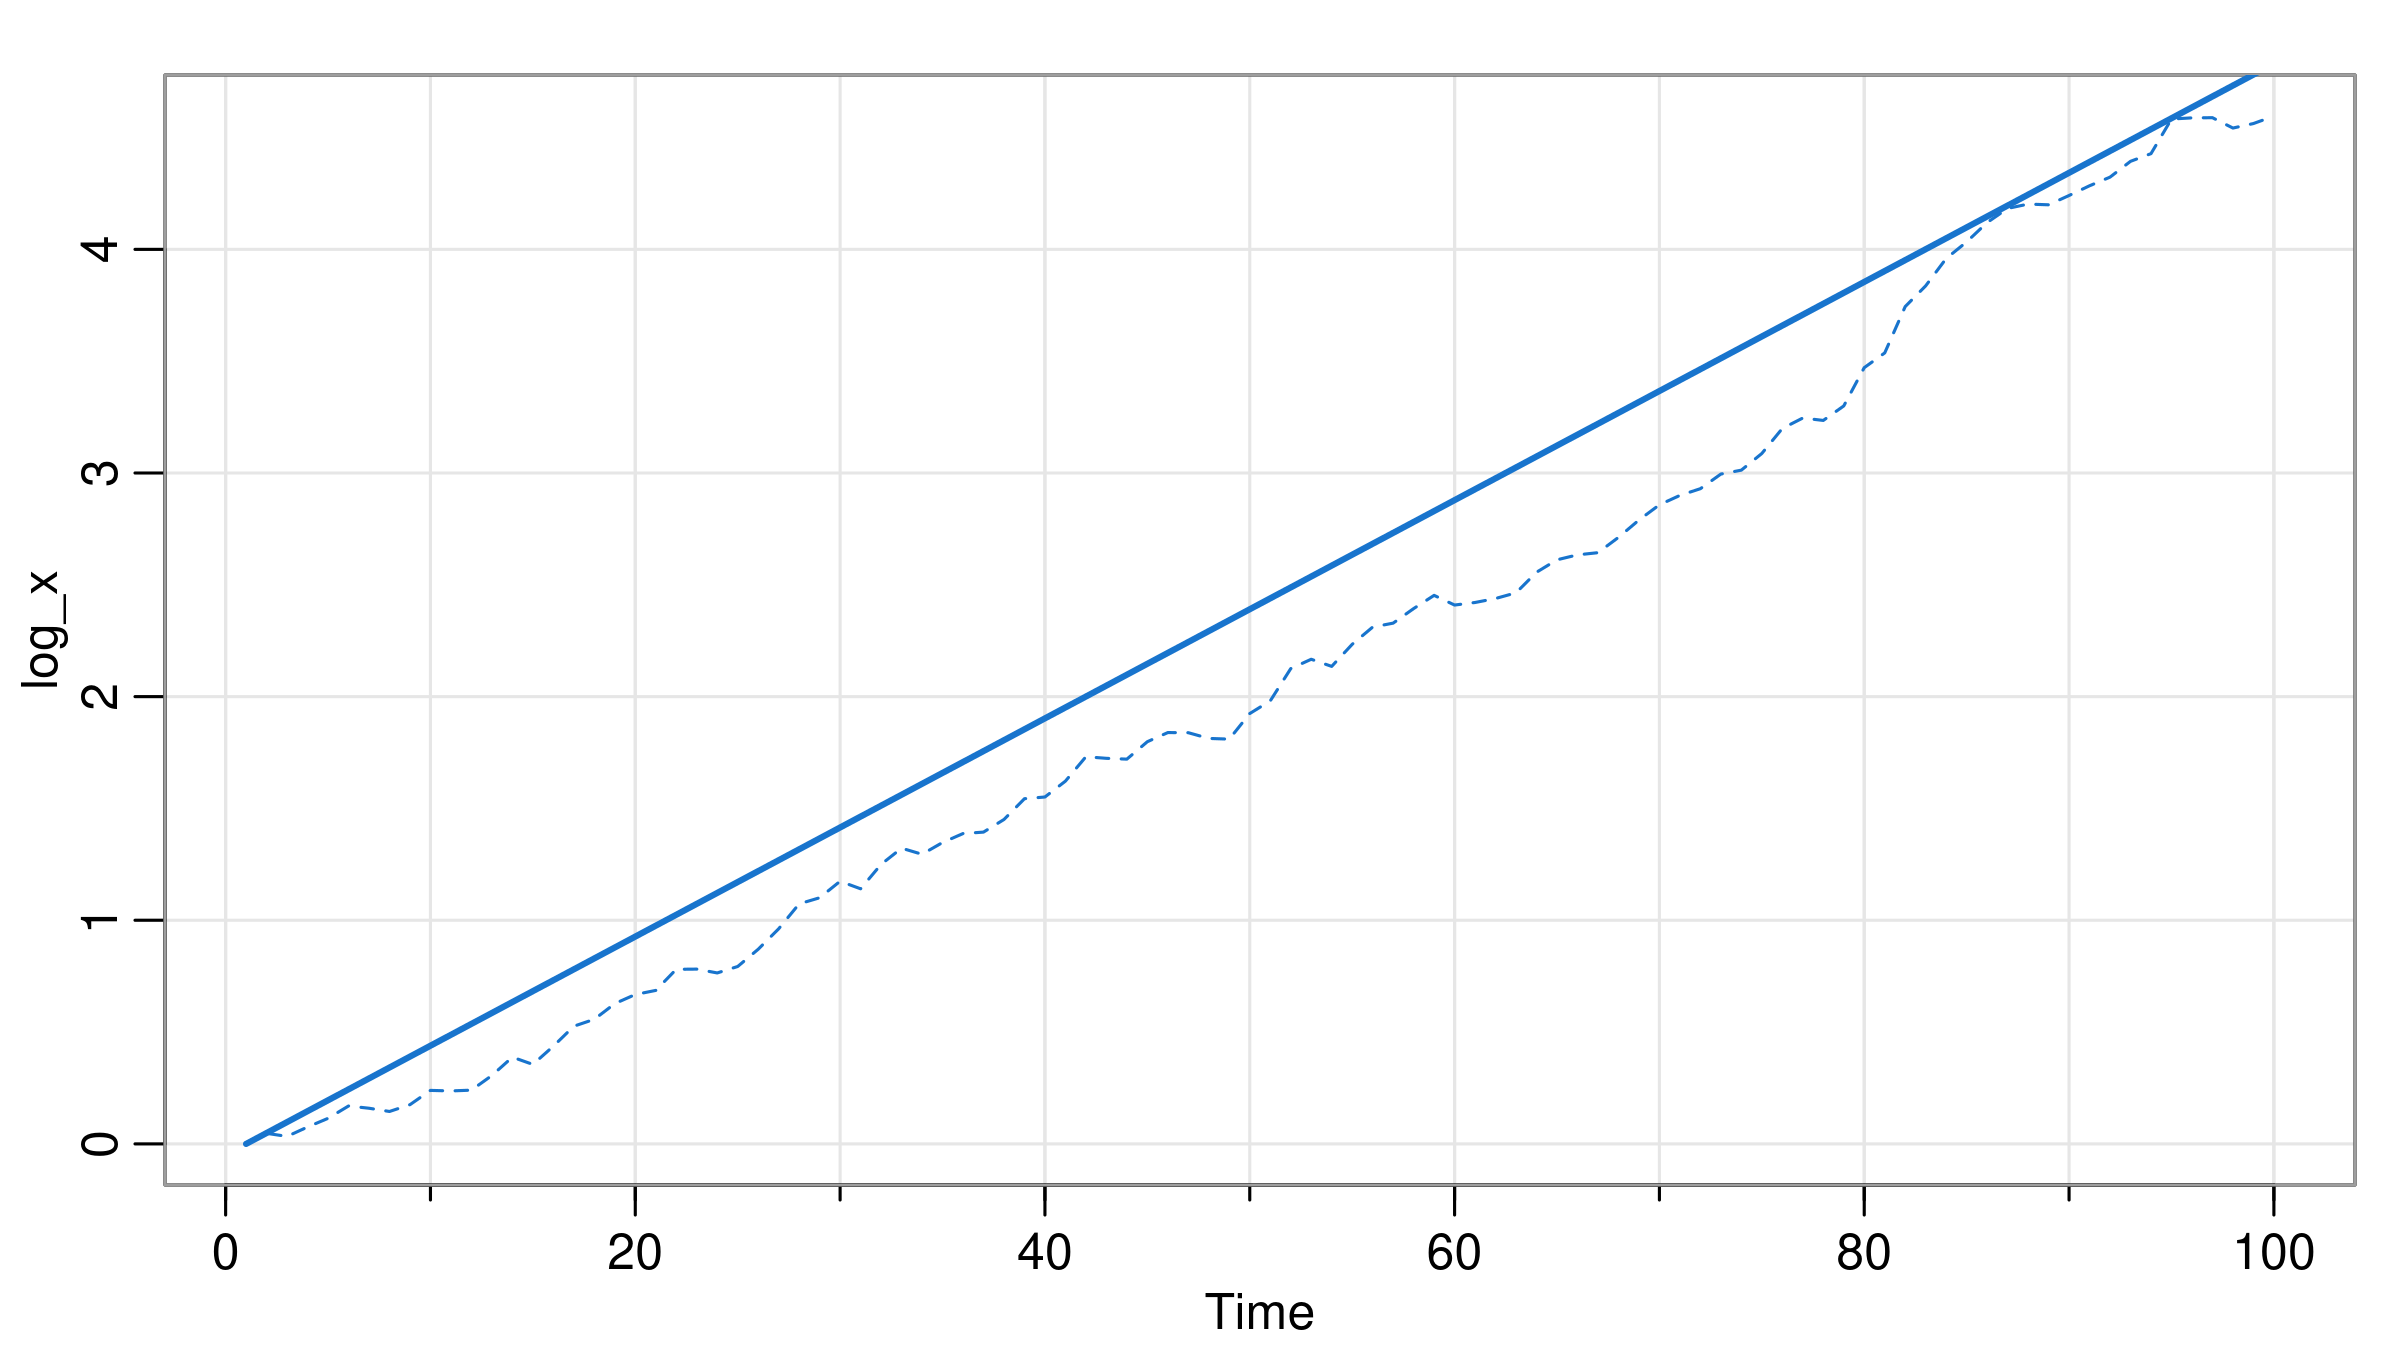

In [24]:
w=rnorm(100,0,1)
log_x = log_s[1]

for (i in (2:100)){
    log_s[i] = log(1+theta) + log_s[i-1]
    log_x[i] = log(1+theta)  + log_x[i-1] + 0.05*w[i]
}

tsplot(log_x, col=4, lty=2)
lines(log_s, col=4, lwd=2)

El proceso en la escala original se recupera haciendo la transformación inversa al logaritmo, es decir, la exponencial.

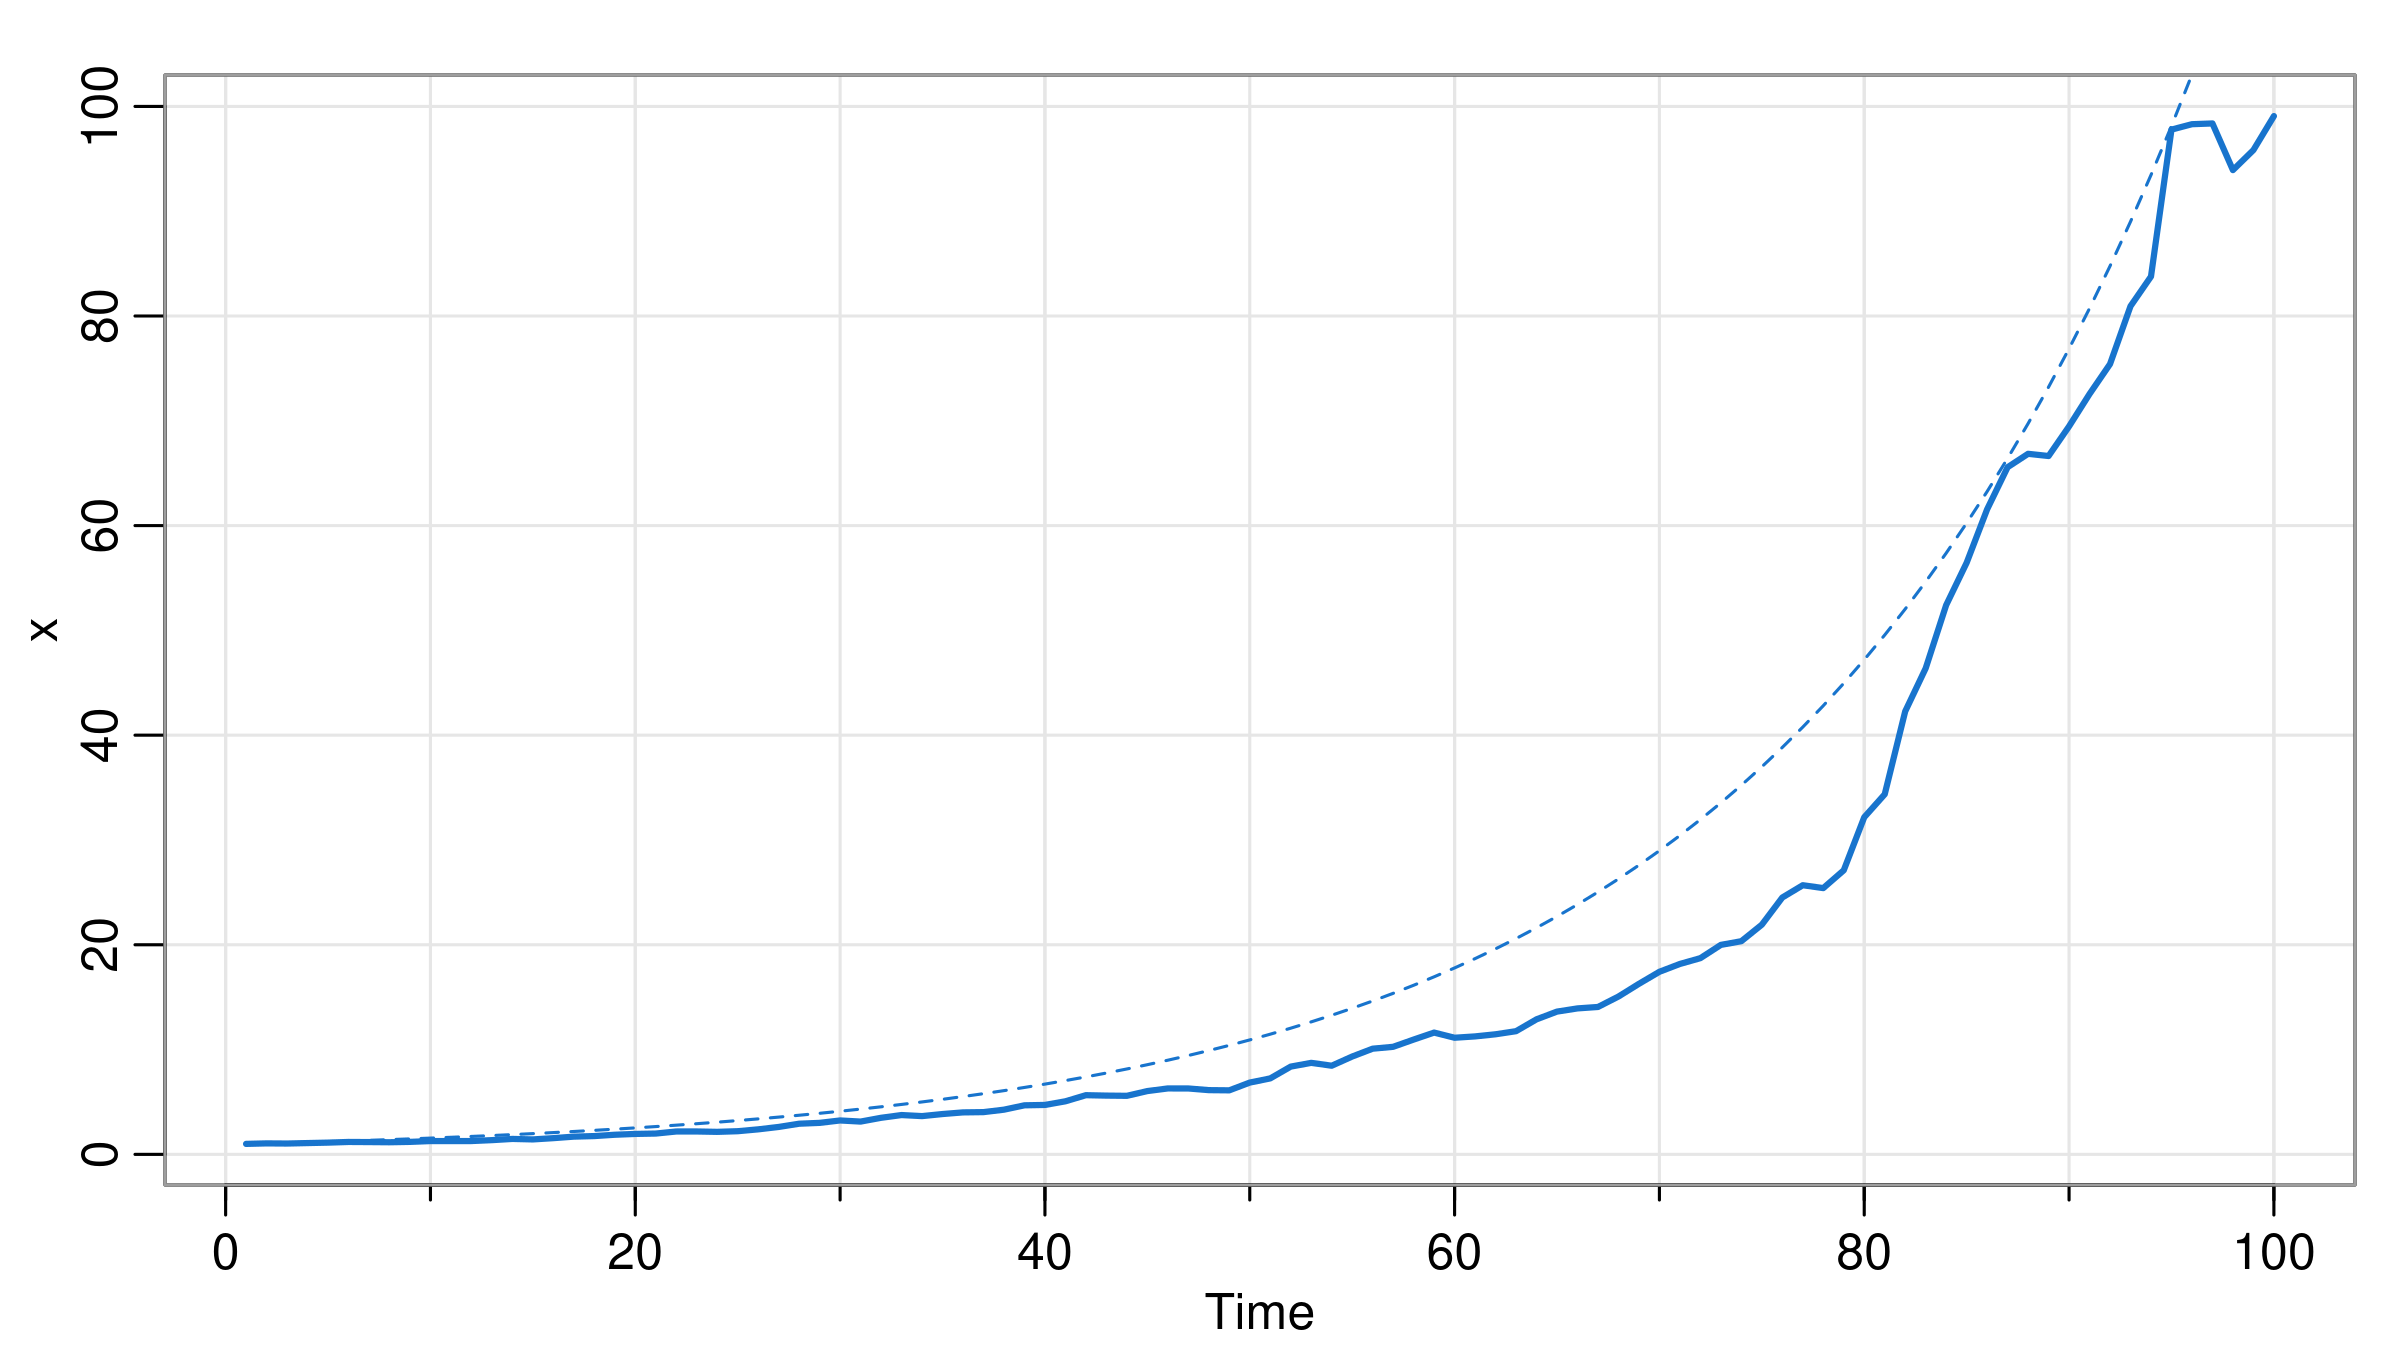

In [25]:
x = exp(log_x)

tsplot(x,col=4,lwd=2)
lines(s,col=4,lty=2)

## Ejercicio

La idea de este ejercicio es explorar la diferencia entre un paseo al azar y un proceso de media móvil.

1. Generar en una misma figura $10$ realizaciones de largo $n=500$ de un paseo al azar sin drift ($\delta=0$) y varianza $\sigma_w^2=2$. (Ver ejemplo más arriba).

2. Generar en una misma figura $10$ realizaciones de largo $n=500$ del proceso de media móvil del Ejemplo 2.

3. ¿Qué ocurre con la media y la varianza a medida que avanza el tiempo?

## Ejercicio

En la serie de datos `gnp` que está en la biblioteca, se guardan los valores del PBI de EE.UU. por trimestres desde 1947 a 2018.

1. Graficar la serie. ¿A cuál de los modelos anteriores se parece?
2. Calcular el crecimiento porcentual como:

$$x_t = \frac{gnp_{t}-gnp_{t-1}}{gnp_{t-1}}$$
y graficar el resultado.

3. Calcular el crecimiento porcentual aproximado como `x=diff(log(gnp))`, es decir haciendo la transformación:

$$x_t = \log(gnp_{t}) - \log(gnp_{t-1})$$

4. Graficar ambos y comparar con los modelos vistos anteriormente.

## Ejercicio

1. Considere la serie de datos `jj` de ganancias de Johnson y Johnson. Aplique a la misma el siguiente filtro de media móvil a la serie $x$:

$$v_t = \frac{1}{4}(x_t + x_{t−1} + x_{t−2} + x_{t−3}).$$

Grafique conjuntamente $x_t$ y $v_t$. Comente el comportamiento de $x$ y $v$ y qué ocurre al aplicar el filtro.


2. Repetir la parte anterior para $x_t=\log(jj)$.

3. Discuta los resultados. ¿Qué logra el filtro de media móvil? ¿Cómo lo aplicaría a los datos de Covid-19 que muestran ciclos semanales debido a los diferentes testeos diarios realizados?